# Курсовая работа. Классическое машинное обучение

## EDA (анализ данных)

In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtale
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import probplot, shapiro, anderson
from scipy.stats import mannwhitneyu
from scipy.stats import gaussian_kde
import warnings
import sys
# Импортируем методы из common_methods.py
sys.path.append('./')
from common_methods import *

warnings.filterwarnings("ignore", category=FutureWarning)

In [435]:
df = pd.read_excel('./data/Данные_для_курсовои_Классическое_МО.xlsx', index_col=0)

In [436]:
# датафрейм не большой, устанавливаем режим отображения целиком
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 1100)
# выводим базовую информацию о датафрейме и его ключевые стат показатели
display(df.info())
print('''
Все столбцы являются числовыми!
Дополнительная обработка нечисловых типов не требуется
''')
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Columns: 213 entries, IC50, mM to fr_urea
dtypes: float64(107), int64(106)
memory usage: 1.6 MB


None


Все столбцы являются числовыми!
Дополнительная обработка нечисловых типов не требуется



IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000   1001.000000        1001.000000   
mean    222.805156   589.110728     72.508823          10.831637   
std     402.169734   642.867508    684.482739           3.307505   
min       0.003517     0.700808      0.011489           2.321942   
25%      12.515396    99.999036      1.433333           9.252350   
50%      46.585183   411.039342      3.846154          12.179236   
75%     224.975928   894.089176     16.566667          13.167843   
max    4128.529377  4538.976189  15620.600000          15.933463   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex          qed  \
count     1001.000000        1001.000000     1001.000000  1001.000000   
mean        10.831637           0.180681       -0.967237     0.580412   
std          3.307505           0.168710        1.588036     0.212230   
min          2.321942           0.000039       -6.992796     0.059567   
25%          9.252350           0.051073       -1.334487     0.442842   
50%         12.179236           0.124606       -0.419485     0.634981   
75%         13.167843           0.291020        0.061754     0.742483   
max         15.933463           1.374614        1.374614     0.947265   

               SPS        MolWt  HeavyAtomMolWt   ExactMolWt  \
count  1001.000000  1001.000000     1001.000000  1001.000000   
mean     29.487989   348.262234      324.469003   347.940606   
std      12.742749   126.946370      121.694134   126.807891   
min       9.416667   110.156000      100.076000   110.073165   
25%      18.486486   264.321000      244.212000   264.136159   
50%      29.290323   315.457000      293.183000   315.219829   
75%      38.750000   409.283000      385.258000   408.166077   
max      60.272727   904.777000      856.393000   904.248467   

       NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
count          1001.000000               1001.0        998.000000   
mean            132.115884                  0.0          0.235749   
std              46.701805                  0.0          0.129429   
min              42.000000                  0.0         -0.016706   
25%             102.000000                  0.0          0.118380   
50%             120.000000                  0.0          0.250661   
75%             152.000000                  0.0          0.335693   
max             350.000000                  0.0          0.572596   

       MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
count        998.000000           998.000000           998.000000   
mean          -0.407436             0.415741             0.227534   
std            0.075974             0.071951             0.119641   
min           -0.744036             0.085007             0.002020   
25%           -0.477880             0.361390             0.116849   
50%           -0.393567             0.426056             0.250661   
75%           -0.354484             0.477880             0.330890   
max           -0.085007             0.744036             0.507387   

       FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
count       1001.000000       1001.000000       1001.000000   998.000000   
mean           1.143163          1.824615          2.418738    23.196621   
std            0.241080          0.320613          0.396290    14.529014   
min            0.222222          0.377778          0.577778    14.513946   
25%            1.000000          1.634146          2.243902    16.366967   
50%            1.153846          1.880000          2.500000    16.564091   
75%            1.333333          2.050000          2.689655    32.092047   
max            1.750000          2.625000          3.266667   126.912704   

       BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  \
count    998.000000    998.000000    998.000000     998.000000   
mean       9.792567      2.472204     -2.347064       2.473116   
std        0.461284      0.162113  

In [437]:
# отображаем отображаем информацию по колонкам, (тип, пропуски, уникальность)
display(pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100,
    'nunique': df.nunique()
}))

dtype  missing_count  missing_percent  nunique
IC50, mM                  float64              0           0.0000      953
CC50, mM                  float64              0           0.0000      888
SI                        float64              0           0.0000      768
MaxAbsEStateIndex         float64              0           0.0000      793
MaxEStateIndex            float64              0           0.0000      793
MinAbsEStateIndex         float64              0           0.0000      790
MinEStateIndex            float64              0           0.0000      796
qed                       float64              0           0.0000      758
SPS                       float64              0           0.0000      597
MolWt                     float64              0           0.0000      712
HeavyAtomMolWt            float64              0           0.0000      605
ExactMolWt                float64              0           0.0000      693
NumValenceElectrons         int64              0           0.0000      112
NumRadicalElectrons         int64              0           0.0000        1
MaxPartialCharge          float64              3           0.2997      722
MinPartialCharge          float64              3           0.2997      654
MaxAbsPartialCharge       float64              3           0.2997      662
MinAbsPartialCharge       float64              3           0.2997      719
FpDensityMorgan1          float64              0           0.0000      278
FpDensityMorgan2          float64              0           0.0000      332
FpDensityMorgan3          float64              0           0.0000      353
BCUT2D_MWHI               float64              3           0.2997      802
BCUT2D_MWLOW              float64              3           0.2997      802
BCUT2D_CHGHI              float64              3           0.2997      802
BCUT2D_CHGLO              float64              3           0.2997      802
BCUT2D_LOGPHI             float64              3           0.2997      802
BCUT2D_LOGPLOW            float64              3           0.2997      802
BCUT2D_MRHI               float64              3           0.2997      802
BCUT2D_MRLOW              float64              3           0.2997      802
AvgIpc                    float64              0           0.0000      643
BalabanJ                  float64              0           0.0000      684
BertzCT                   float64              0           0.0000      732
Chi0                      float64              0           0.0000      477
Chi0n                     float64              0           0.0000      680
Chi0v                     float64              0           0.0000      733
Chi1                      float64              0           0.0000      609
Chi1n                     float64              0           0.0000      730
Chi1v                     float64              0           0.0000      780
Chi2n                     float64              0           0.0000      750
Chi2v                     float64              0           0.0000      799
Chi3n                     float64              0           0.0000      755
Chi3v                     float64              0           0.0000      804
Chi4n                     float64              0           0.0000      754
Chi4v                     float64              0           0.0000      804
HallKierAlpha             float64              0           0.0000      357
Ipc                       float64              0           0.0000      643
Kappa1                    float64              0           0.0000      664
Kappa2                    float64              0           0.0000      705
Kappa3                    float64              0           0.0000      747
LabuteASA                 float64              0           0.0000      733
PEOE_VSA1                 float64              0           0.0000      140
PEOE_VSA10                float64              0           0.0000      169
PEOE_VSA11                float64              0     

In [438]:
# считаем количество полных дубликатов и убираем их
dup_qtty = df.duplicated().sum()
df = df.drop_duplicates()
print(f'''
Количество полных дубликатов: {dup_qtty}
Размерность после удаления дубликатов: {df.shape}
''')
# Предварительно обрабатываем бесконечные значения
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Заполнение пустые значения медианым значением
df = df.fillna(df.median())
# Переименуем столбцы с неудобными именами
df = df.rename(columns={'IC50, mM': 'IC50', 'CC50, mM': 'CC50'})
# отображаем отображаем информацию по колонкам, (тип, пропуски, уникальность)
display(pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100,
    'nunique': df.nunique()
}))


Количество полных дубликатов: 32
Размерность после удаления дубликатов: (969, 213)



dtype  missing_count  missing_percent  nunique
IC50                      float64              0              0.0      953
CC50                      float64              0              0.0      888
SI                        float64              0              0.0      768
MaxAbsEStateIndex         float64              0              0.0      793
MaxEStateIndex            float64              0              0.0      793
MinAbsEStateIndex         float64              0              0.0      790
MinEStateIndex            float64              0              0.0      796
qed                       float64              0              0.0      758
SPS                       float64              0              0.0      597
MolWt                     float64              0              0.0      712
HeavyAtomMolWt            float64              0              0.0      605
ExactMolWt                float64              0              0.0      693
NumValenceElectrons         int64              0              0.0      112
NumRadicalElectrons         int64              0              0.0        1
MaxPartialCharge          float64              0              0.0      723
MinPartialCharge          float64              0              0.0      654
MaxAbsPartialCharge       float64              0              0.0      663
MinAbsPartialCharge       float64              0              0.0      720
FpDensityMorgan1          float64              0              0.0      278
FpDensityMorgan2          float64              0              0.0      332
FpDensityMorgan3          float64              0              0.0      353
BCUT2D_MWHI               float64              0              0.0      803
BCUT2D_MWLOW              float64              0              0.0      803
BCUT2D_CHGHI              float64              0              0.0      803
BCUT2D_CHGLO              float64              0              0.0      803
BCUT2D_LOGPHI             float64              0              0.0      803
BCUT2D_LOGPLOW            float64              0              0.0      803
BCUT2D_MRHI               float64              0              0.0      803
BCUT2D_MRLOW              float64              0              0.0      803
AvgIpc                    float64              0              0.0      643
BalabanJ                  float64              0              0.0      684
BertzCT                   float64              0              0.0      732
Chi0                      float64              0              0.0      477
Chi0n                     float64              0              0.0      680
Chi0v                     float64              0              0.0      733
Chi1                      float64              0              0.0      609
Chi1n                     float64              0              0.0      730
Chi1v                     float64              0              0.0      780
Chi2n                     float64              0              0.0      750
Chi2v                     float64              0              0.0      799
Chi3n                     float64              0              0.0      755
Chi3v                     float64              0              0.0      804
Chi4n                     float64              0              0.0      754
Chi4v                     float64              0              0.0      804
HallKierAlpha             float64              0              0.0      357
Ipc                       float64              0              0.0      643
Kappa1                    float64              0              0.0      664
Kappa2                    float64              0              0.0      705
Kappa3                    float64              0              0.0      747
LabuteASA                 float64              0              0.0      733
PEOE_VSA1                 float64              0              0.0      140
PEOE_VSA10                float64              0              0.0      169
PEOE_VSA11                float64              0     

In [449]:
# просмотрим датафрейм
df.head(20)

IC50         CC50         SI  MaxAbsEStateIndex  MaxEStateIndex  \
0     6.239374   175.482382  28.125000           5.094096        5.094096   
1     0.771831     5.402819   7.000000           3.961417        3.961417   
2   223.808778   161.142320   0.720000           2.627117        2.627117   
3     1.705624   107.855654  63.235294           5.097360        5.097360   
4   107.131532   139.270991   1.300000           5.150510        5.150510   
5    15.037911    30.075821   2.000000           5.758408        5.758408   
6    18.908167    14.559288   0.770000           2.584472        2.584472   
7    28.773087    23.593931   0.820000          13.821880       13.821880   
8    50.057068   153.709268   3.070681          14.171614       14.171614   
9     6.400847   400.906360  62.633333           6.135893        6.135893   
10    4.185789    32.888344   7.857143           5.856558        5.856558   
11   43.522458    72.435979   1.664336           2.589342        2.589342   
12  208.368590   634.625148   3.045685           6.177277        6.177277   
13    1.128847     5.769660   5.111111          13.400899       13.400899   
14   10.636446    79.048135   7.431818          13.516829       13.516829   
15  110.140615   110.140615   1.000000           2.741289        2.741289   
16    3.228105    10.429264   3.230769           3.963175        3.963175   
17   40.393066  1160.720297  28.735632           2.742324        2.742324   
18  751.968277   751.968277   1.000000          12.215264       12.215264   
19   64.130535   283.628863   4.422680           6.320833        6.320833   

    MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  \
0            0.387225        0.387225  0.417362  42.928571  384.652   
1            0.533868        0.533868  0.462473  45.214286  388.684   
2            0.543231        0.543231  0.260923  42.187500  446.808   
3            0.390603        0.390603  0.377846  41.862069  398.679   
4            0.270476        0.270476  0.429038  36.514286  466.713   
5            0.278083        0.278083  0.711012  28.600000  332.491   
6            0.429649        0.429649  0.328539  36.564103  528.869   
7            0.079845       -0.301260  0.217332  31.333333  695.089   
8            0.019123       -0.411828  0.187781  29.157895  763.123   
9            0.239226        0.239226  0.439915  36.400000  468.685   
10           0.246833        0.246833  0.701837  28.440000  334.463   
11           0.380221        0.380221  0.640283  33.250000  328.564   
12           0.382774        0.382774  0.440789  38.000000  472.717   
13           0.117366       -0.259257  0.677698  28.896552  398.635   
14           0.115920       -0.260674  0.593976  28.733333  413.670   
15           0.541351        0.541351  0.379591  43.400000  416.738   
16           0.535939        0.535939  0.405038  44.068966  402.711   
17           0.543543        0.543543  0.337233  42.387097  430.765   
18           0.009695       -3.865747  0.739703  31.384615  398.952   
19           0.300347        0.300347  0.562066  60.272727  151.253   

    HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  NumRadicalElectrons  \
0          340.300  384.350449                  158                    0   
1          340.300  388.381750                  162                    0   
2          388.344  446.458903                  186                    0   
3          352.311  398.366099                  164                    0   
4          424.377  466.334799                  184                    0   
5          304.267  332.225249                  130                    0   
6          472.421  528.443253                  212                    0   
7          624.529  694.543729                  280                    0   
8          696.595  762.512429                  300                    0   
9          428.365  468.314064                  184                    0   
10         308.255  334.204513                  130             

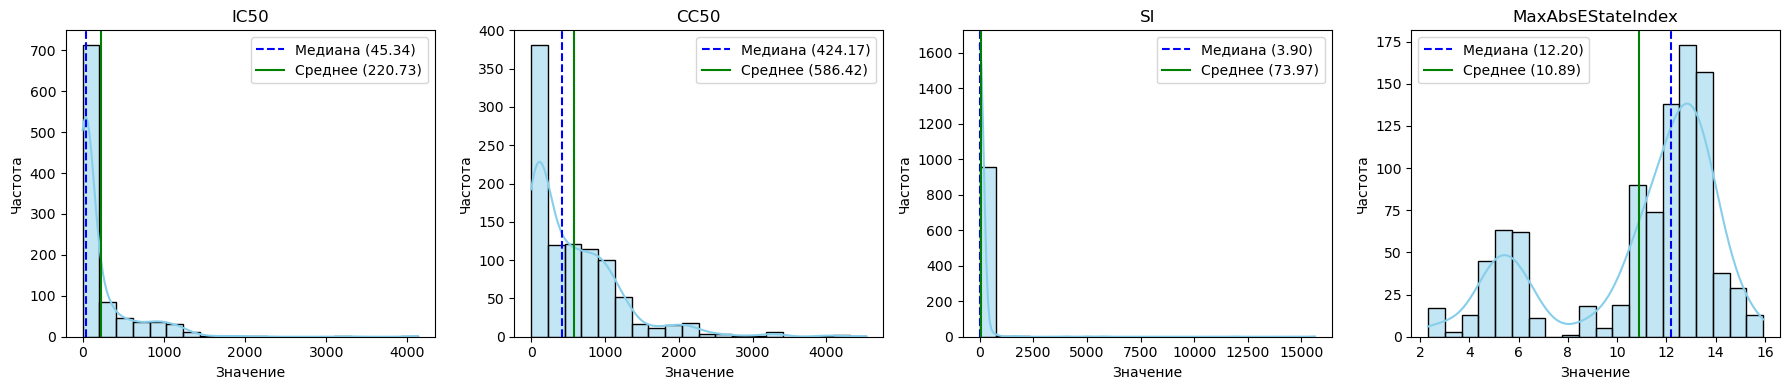

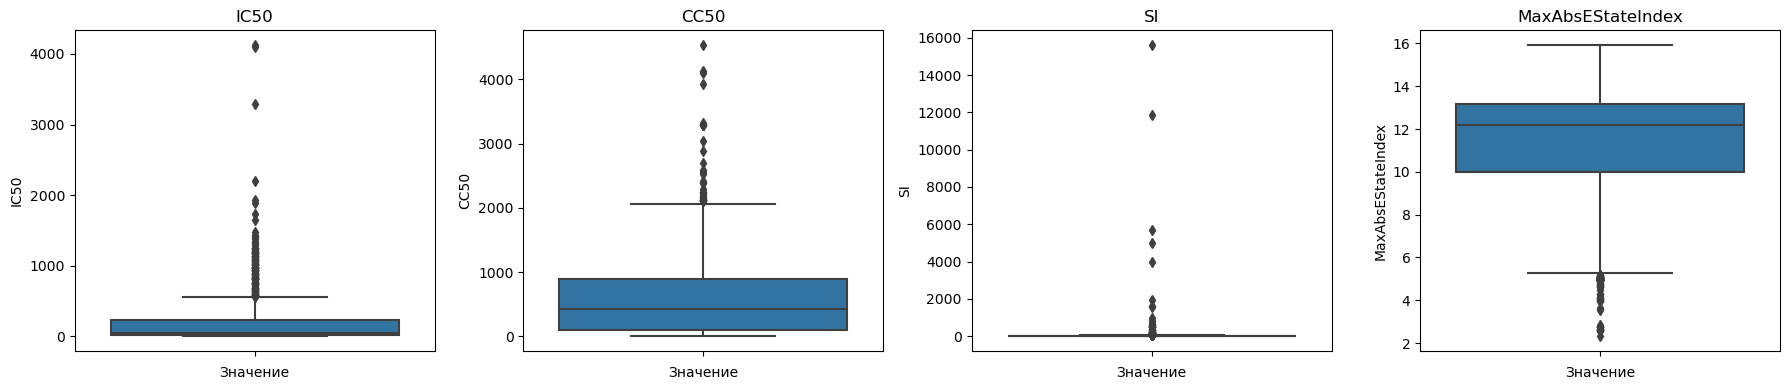

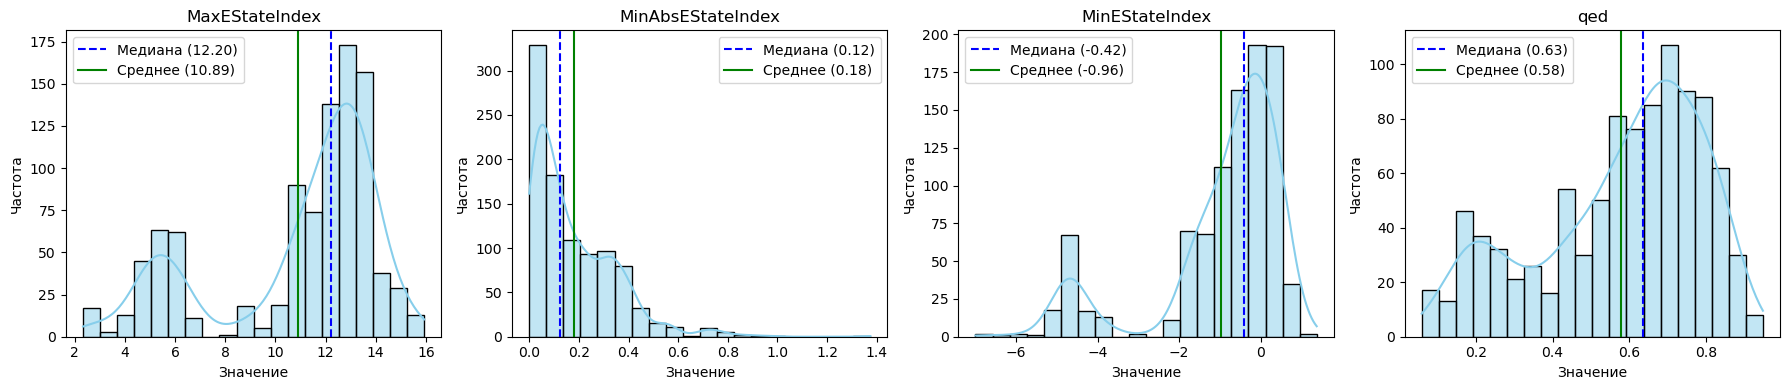

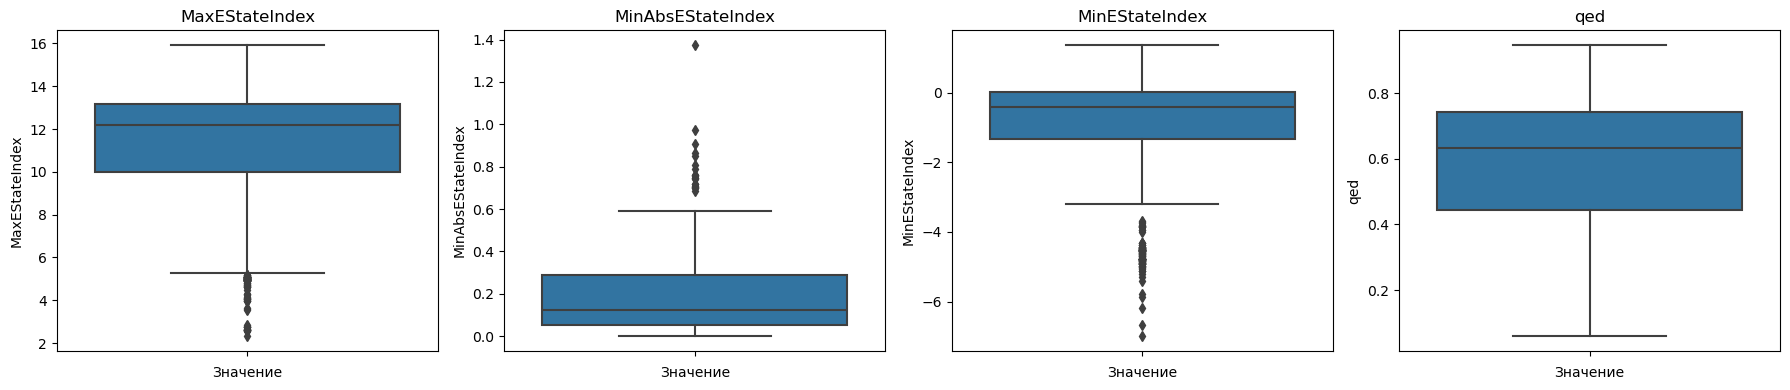

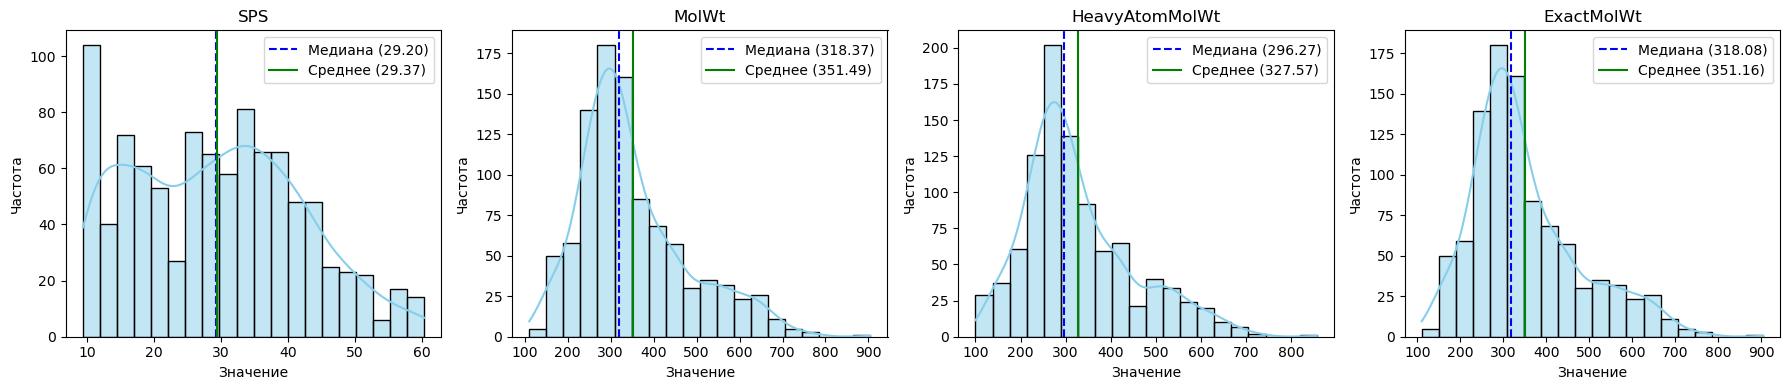

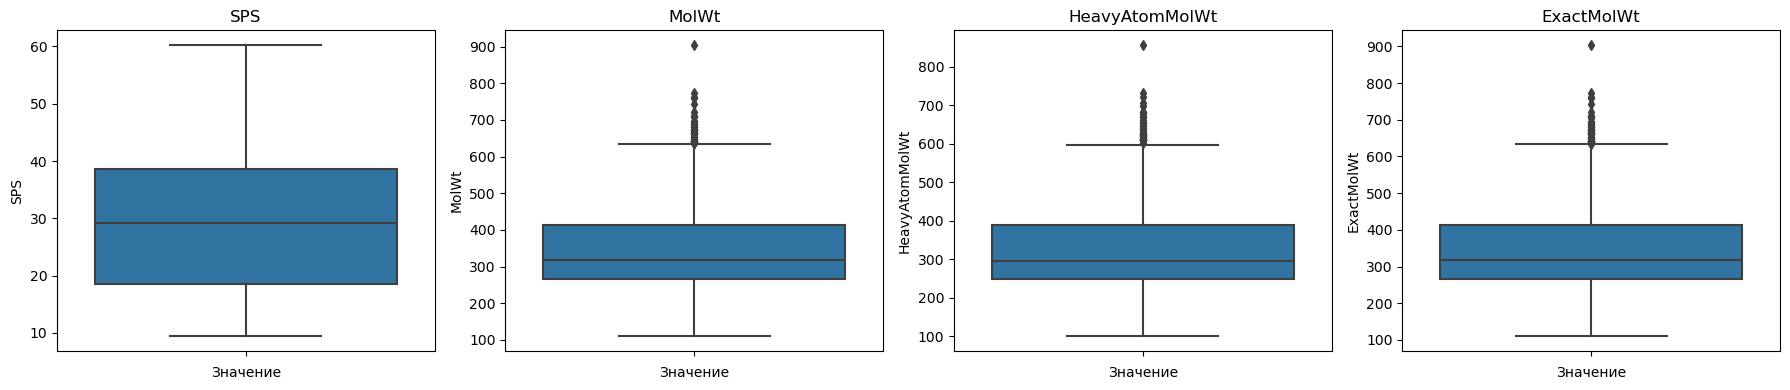

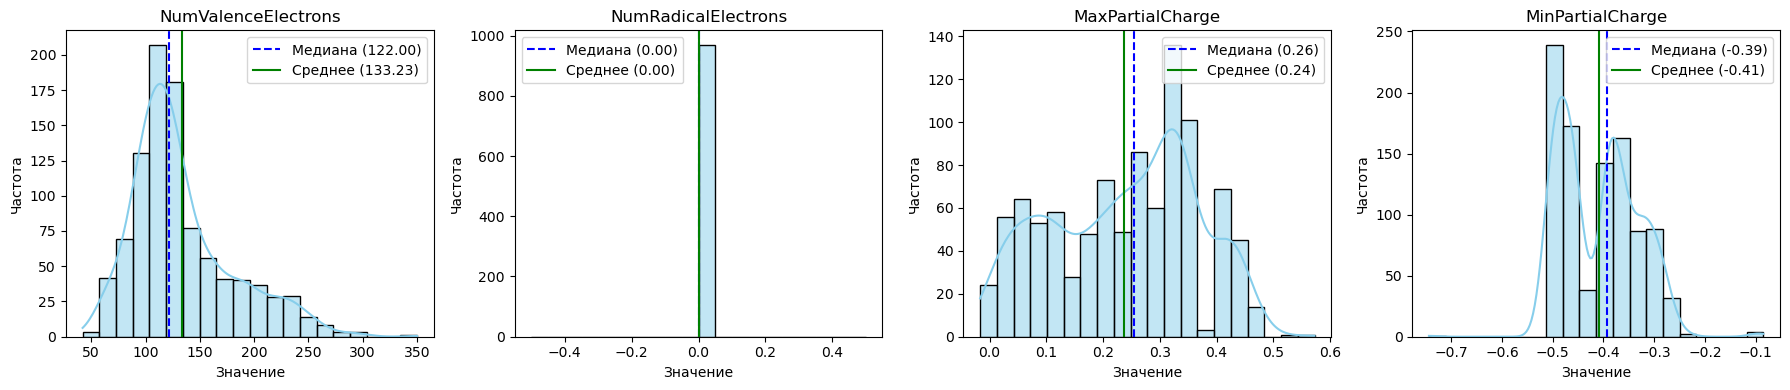

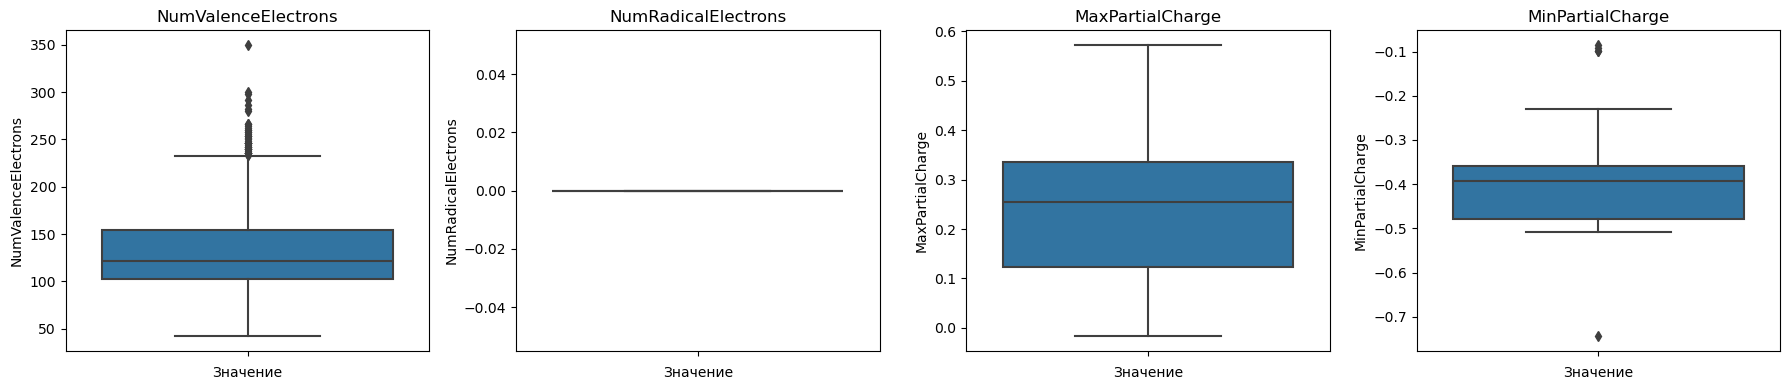

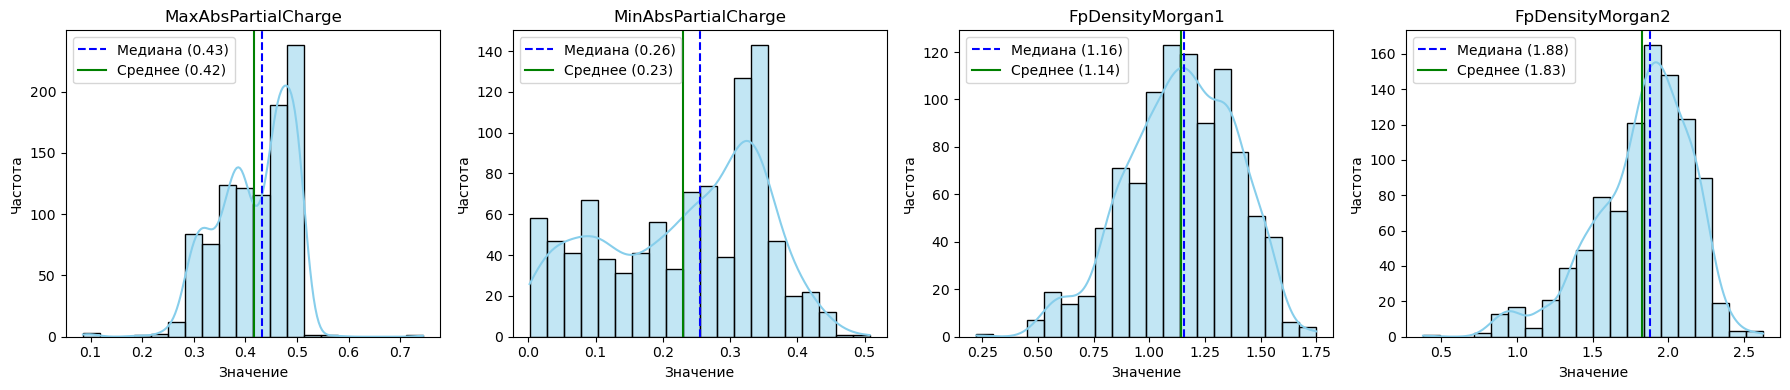

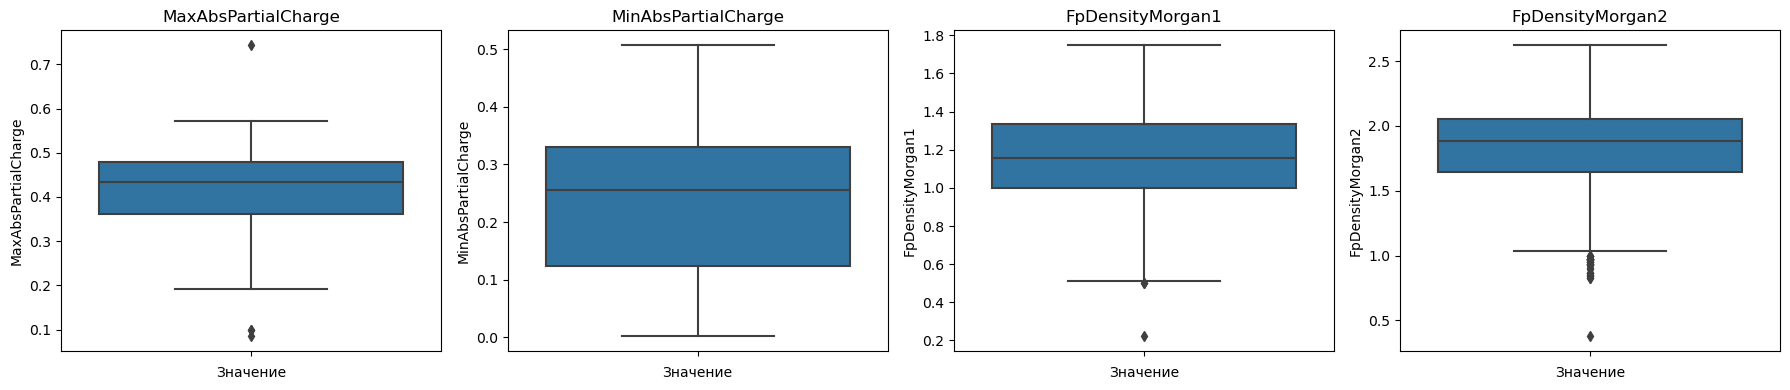

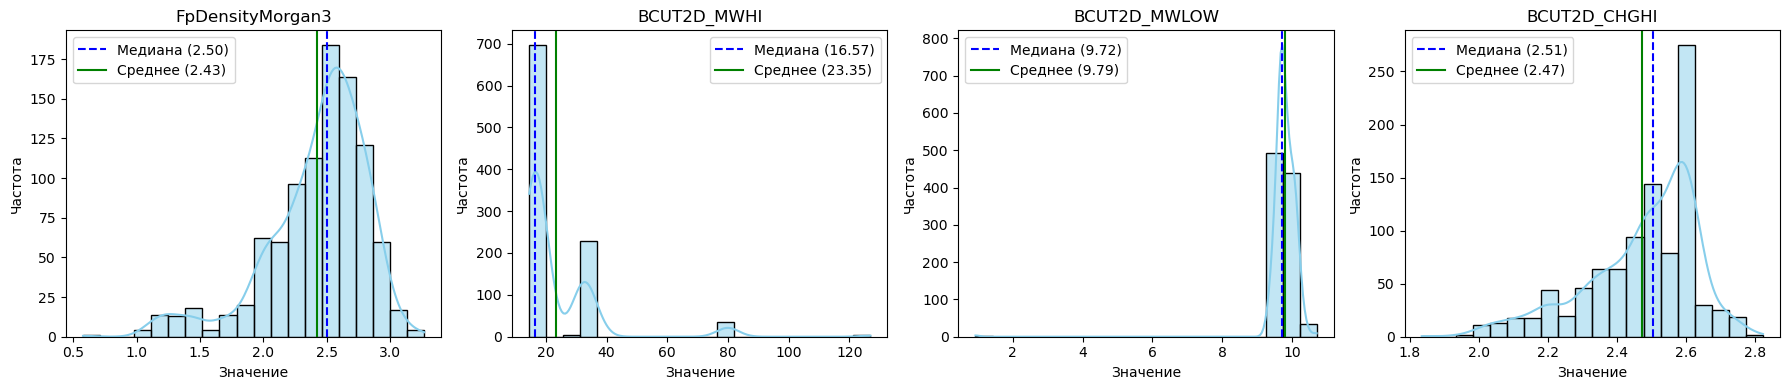

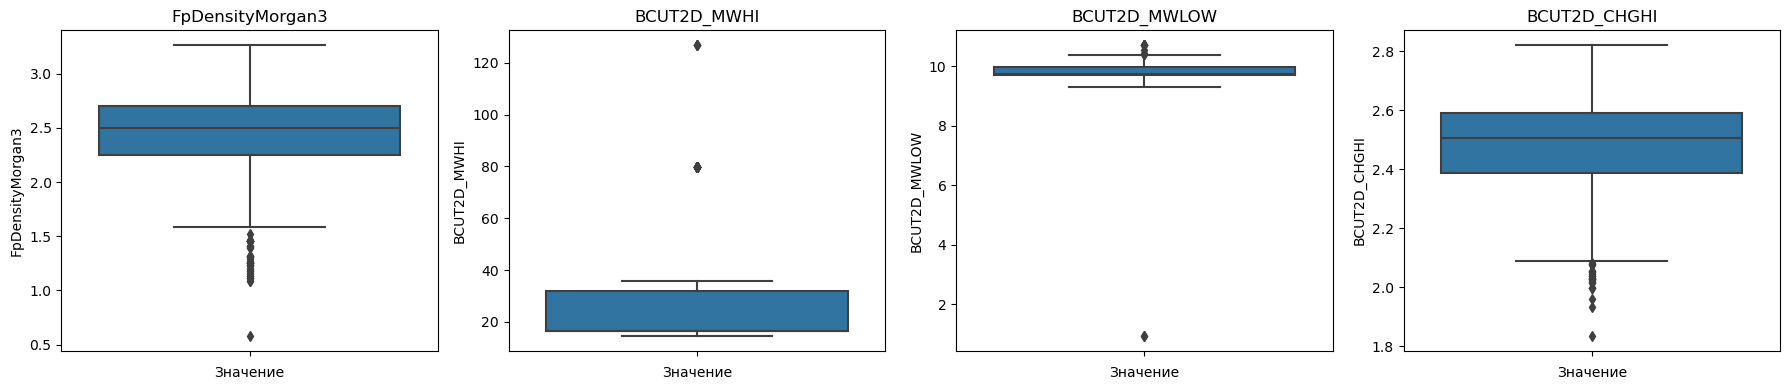

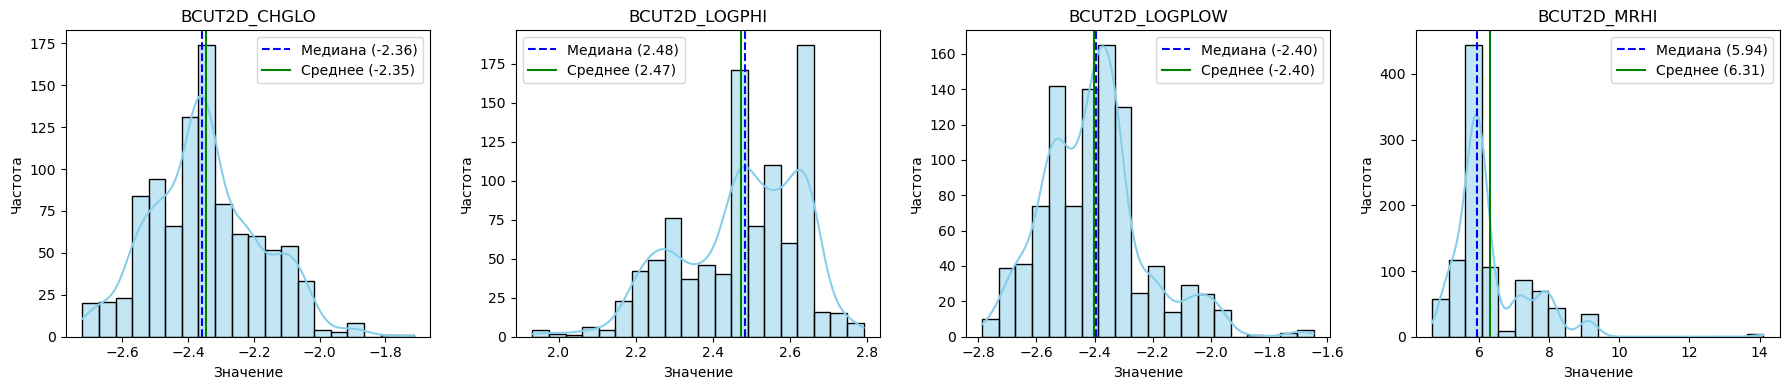

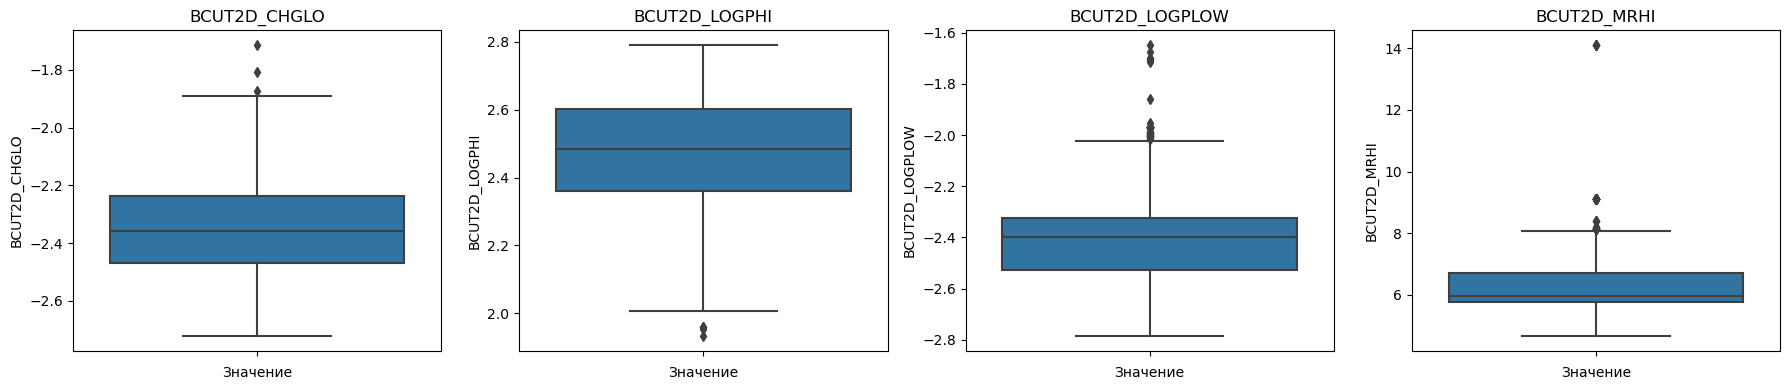

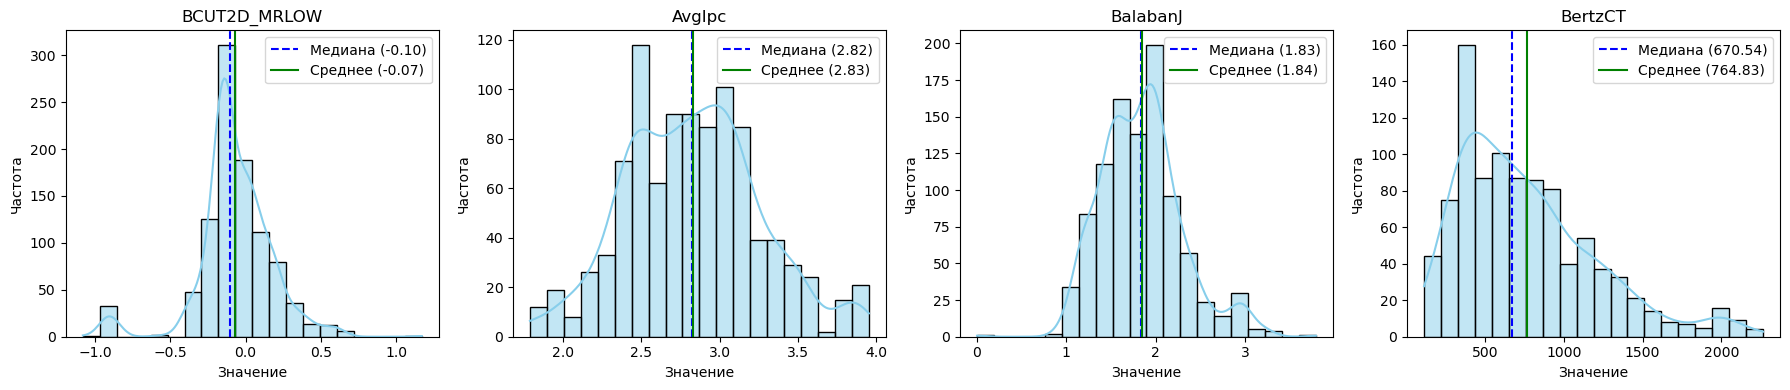

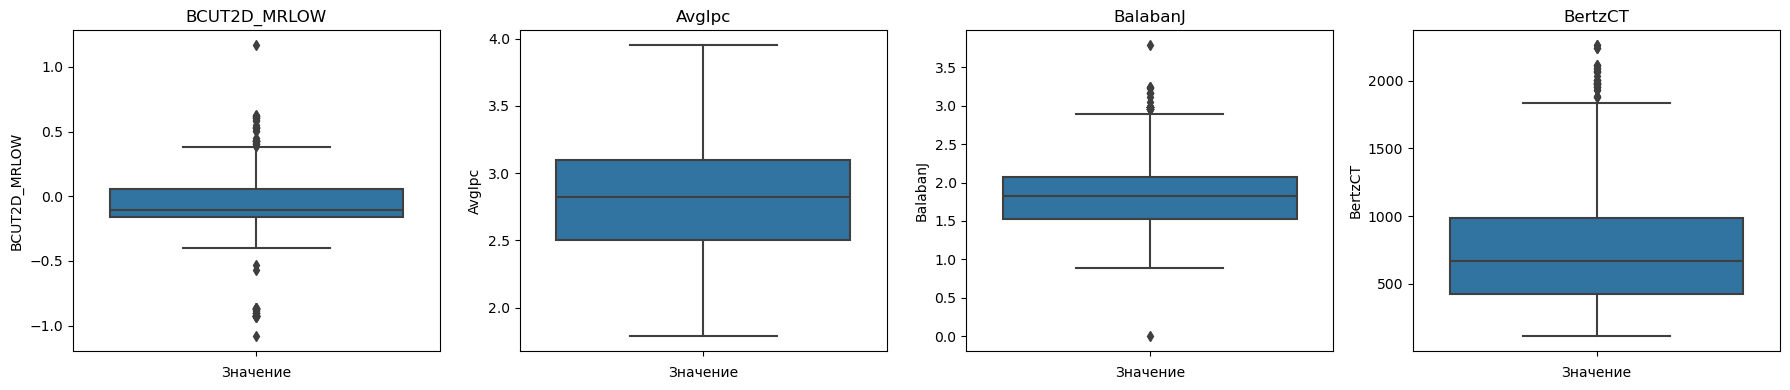

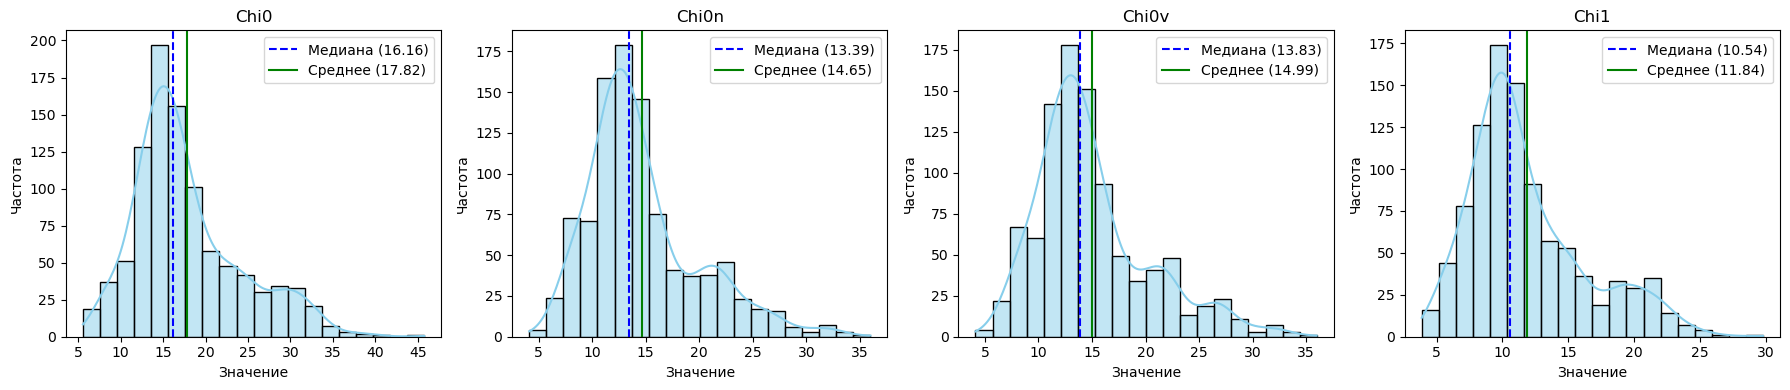

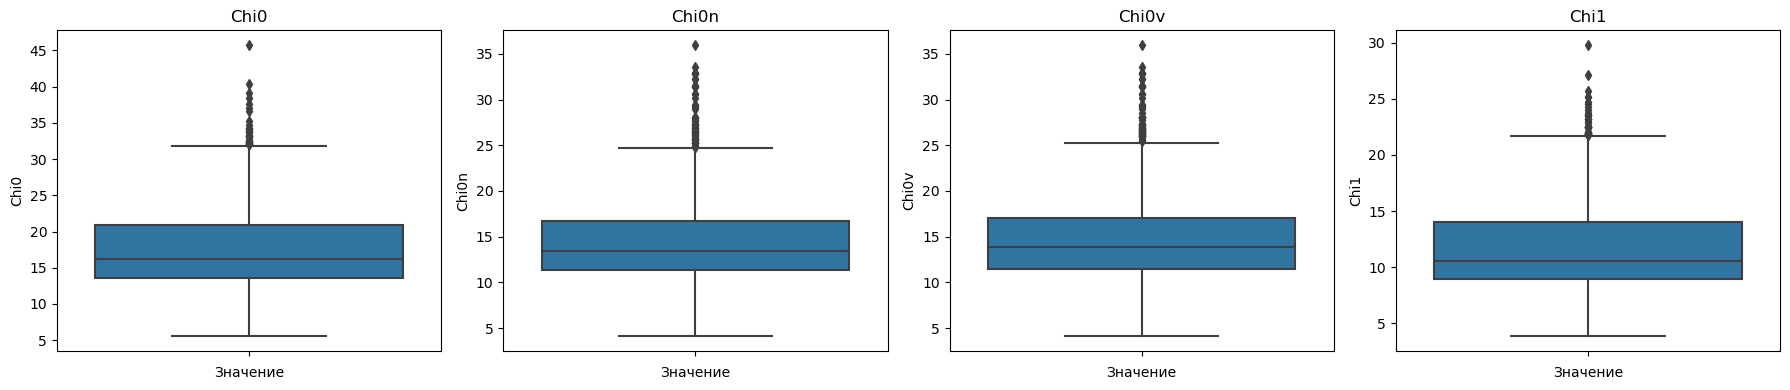

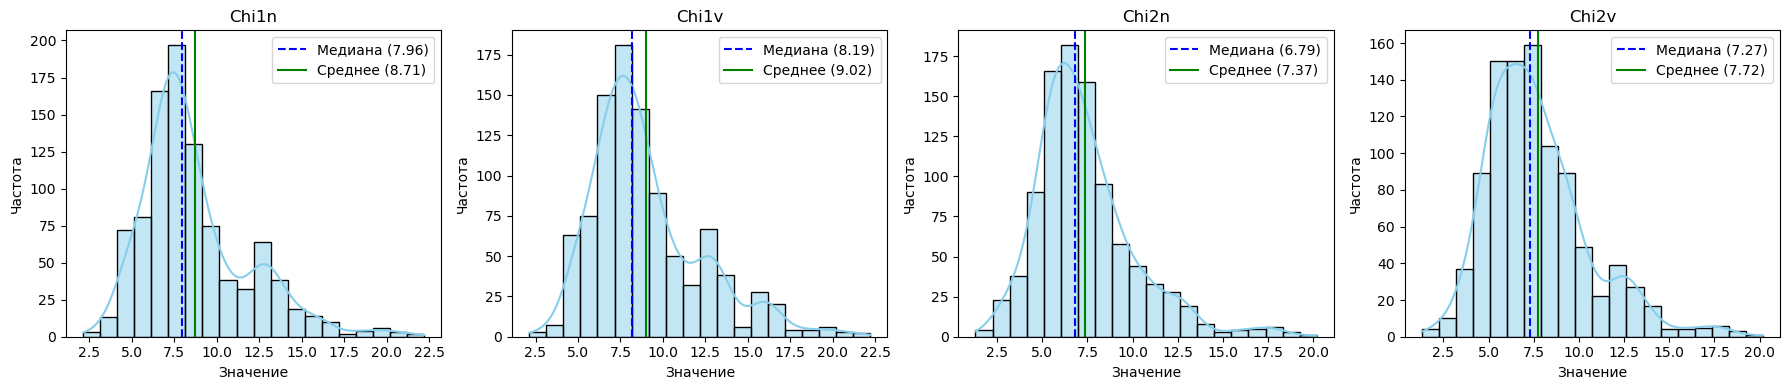

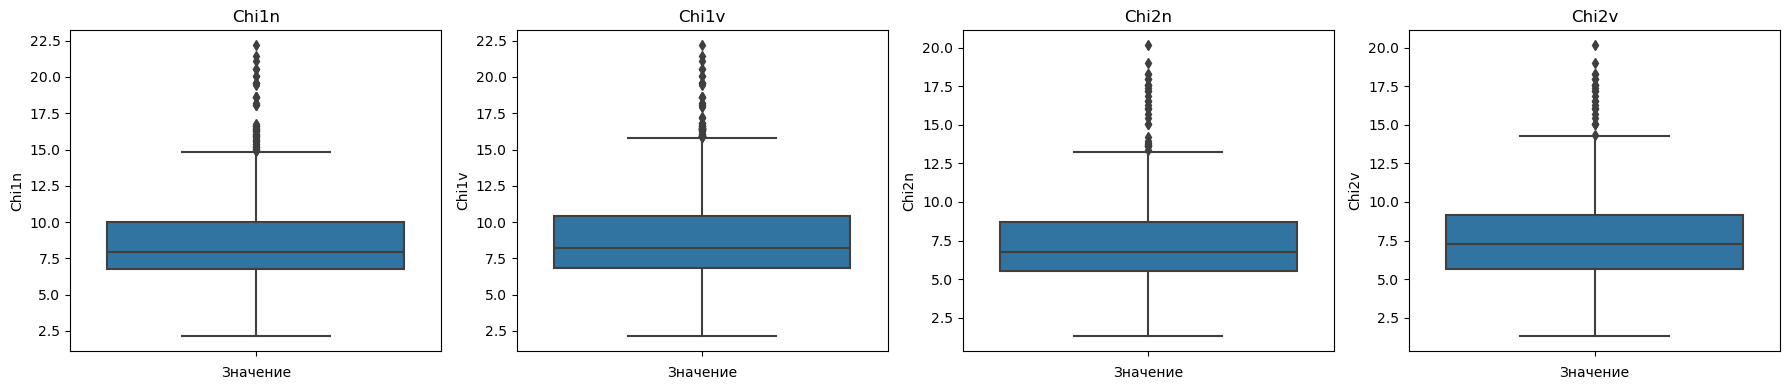

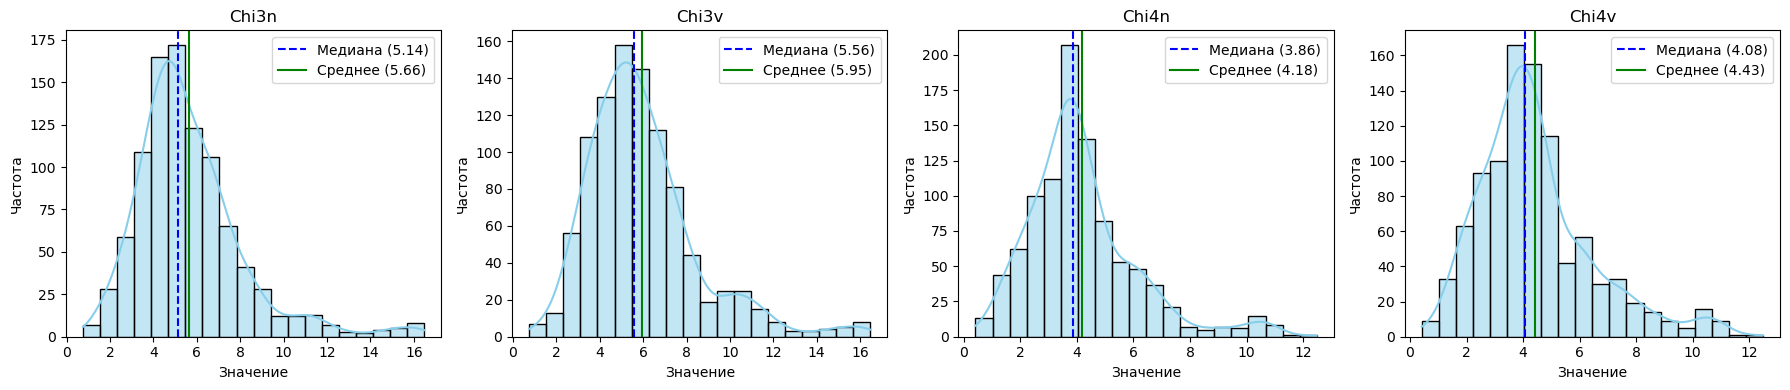

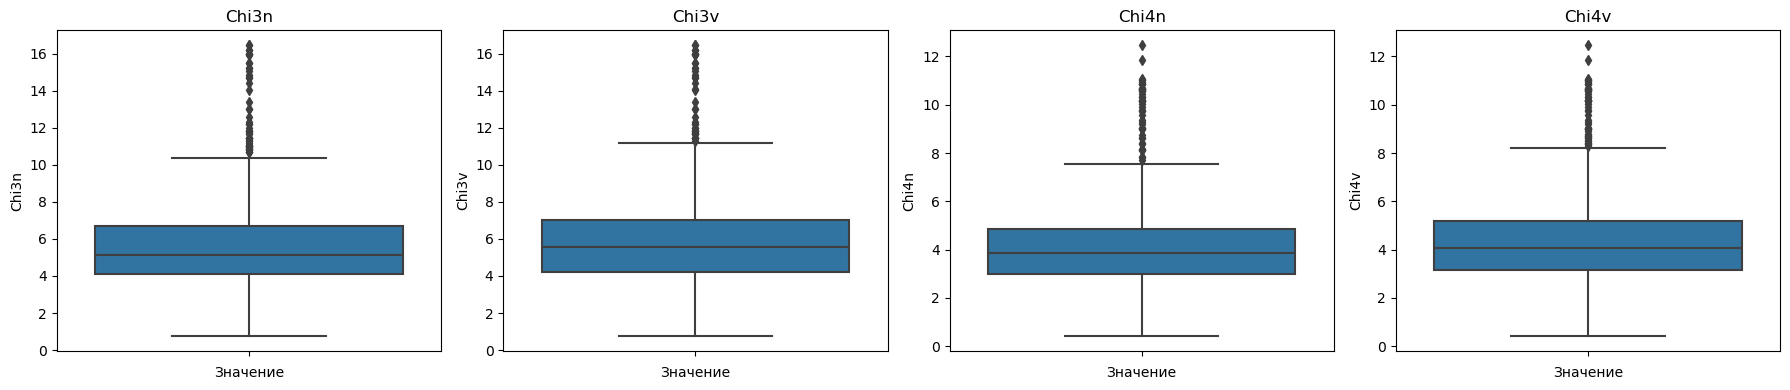

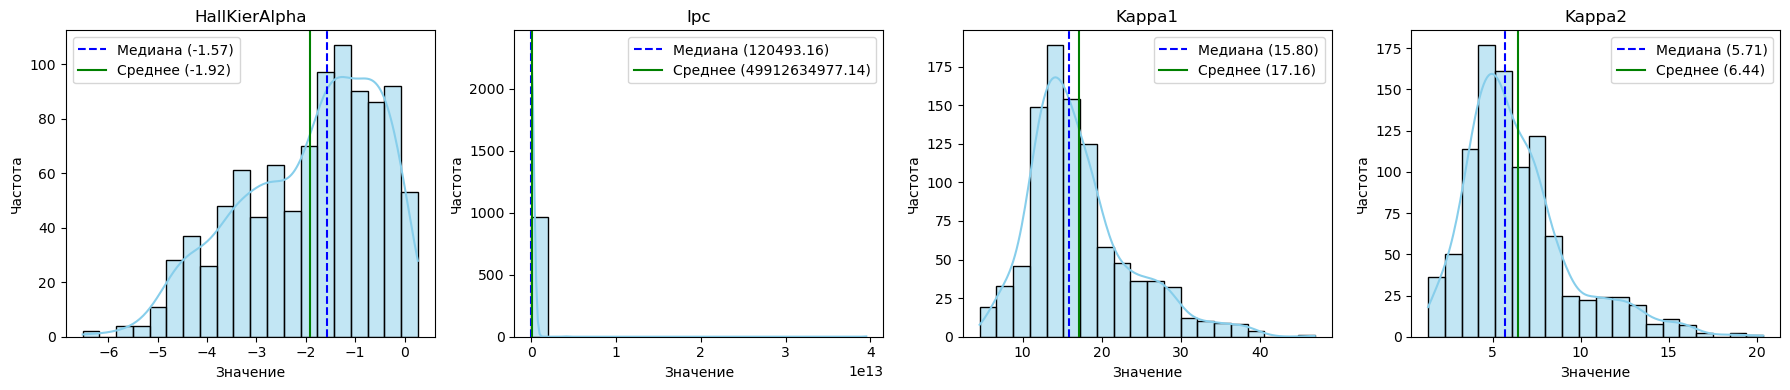

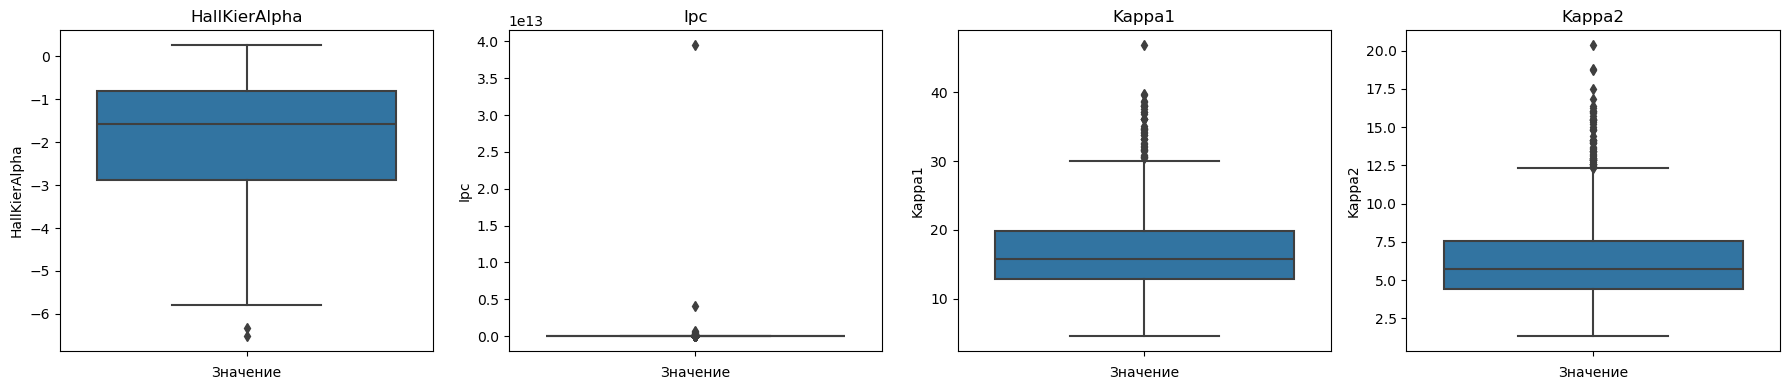

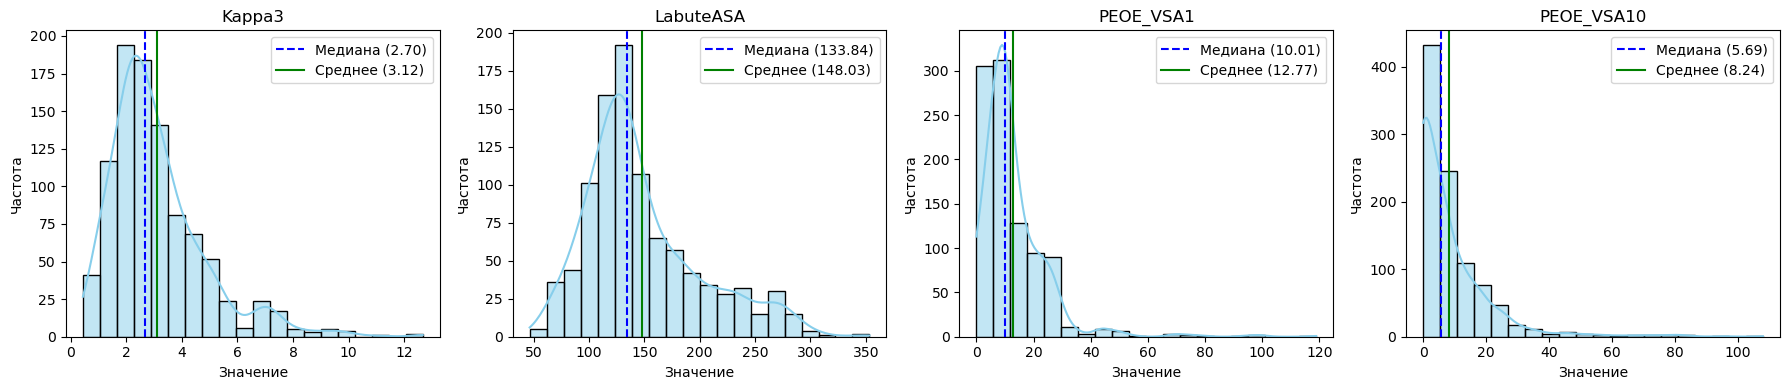

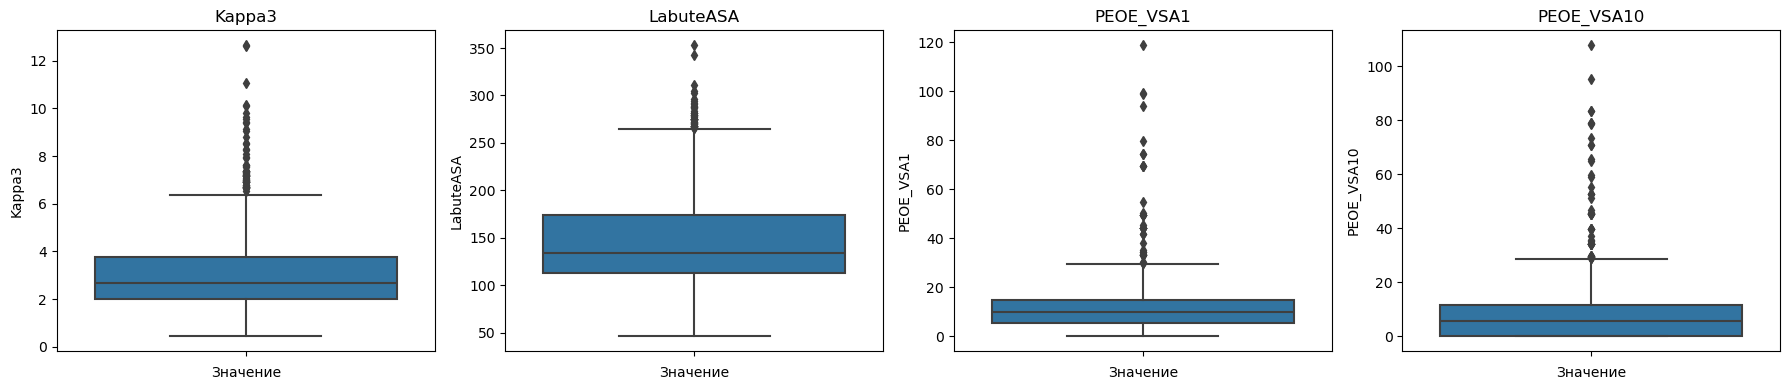

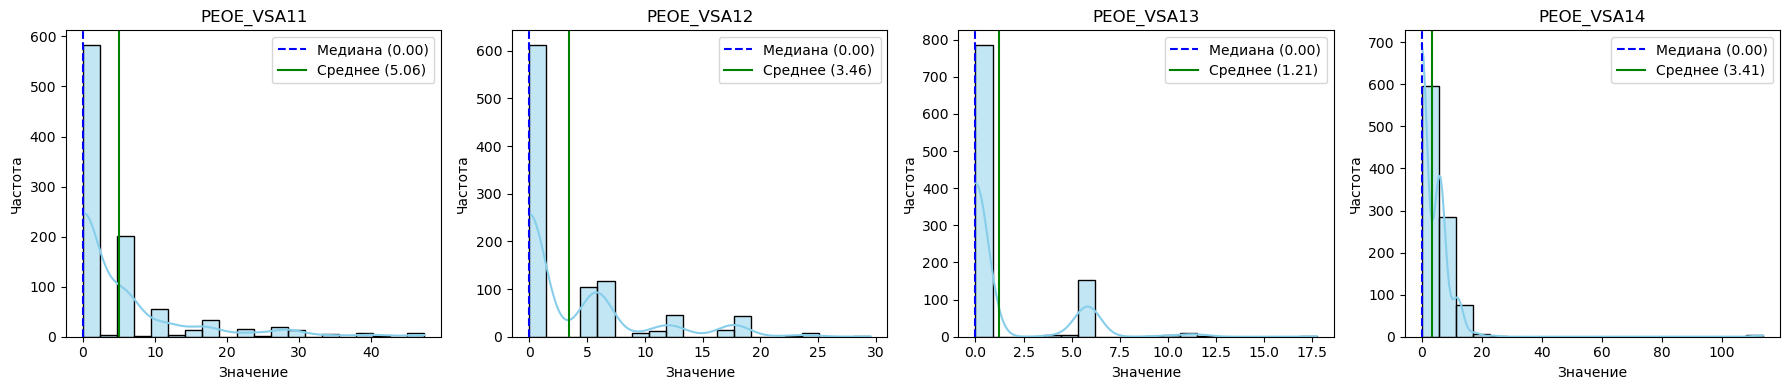

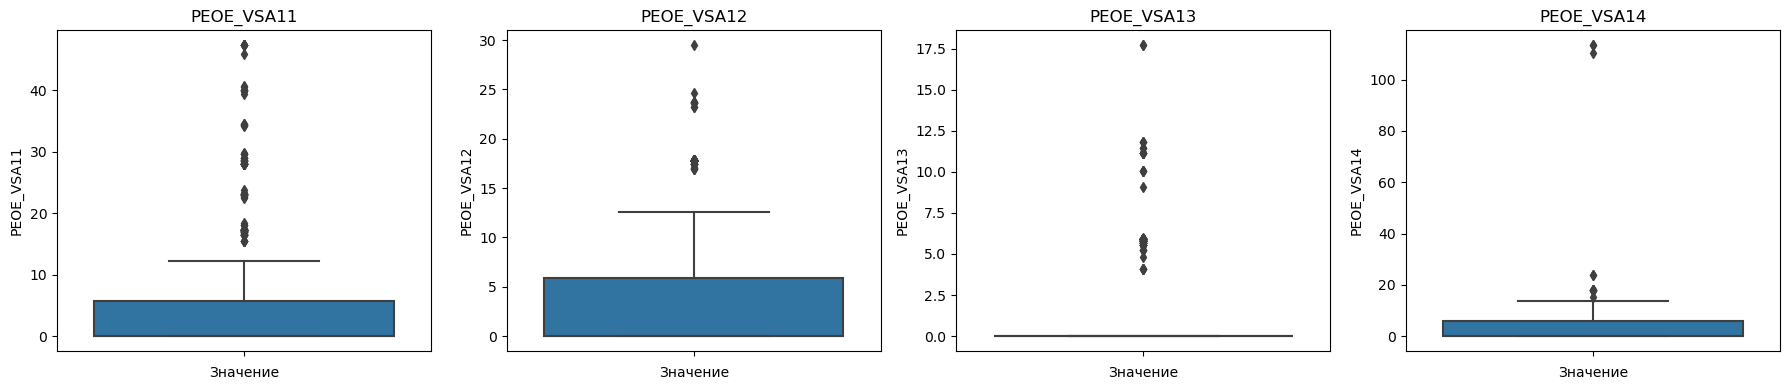

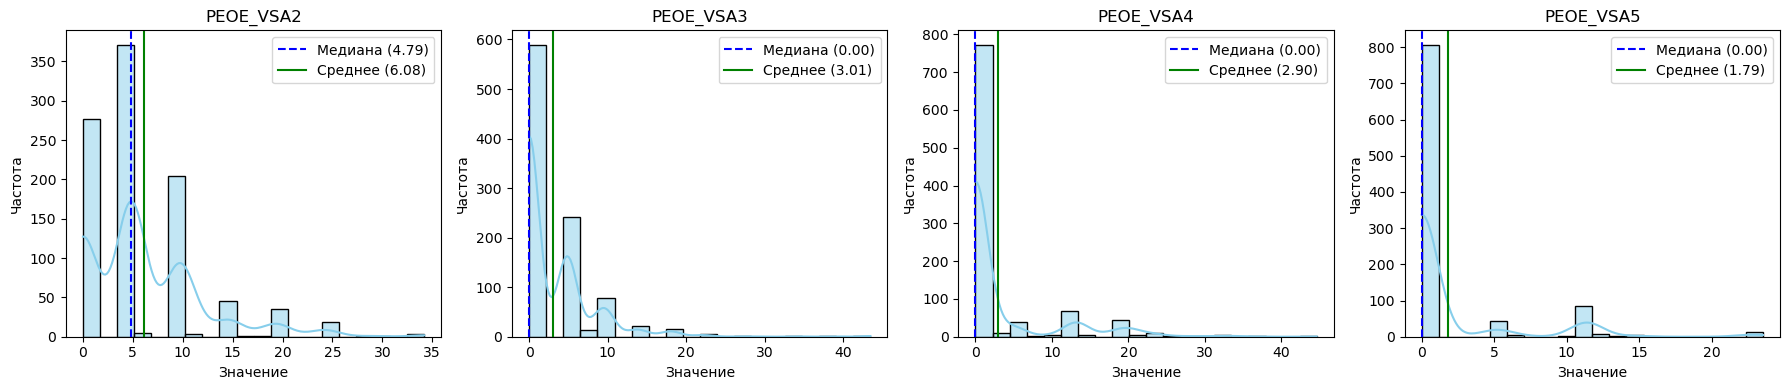

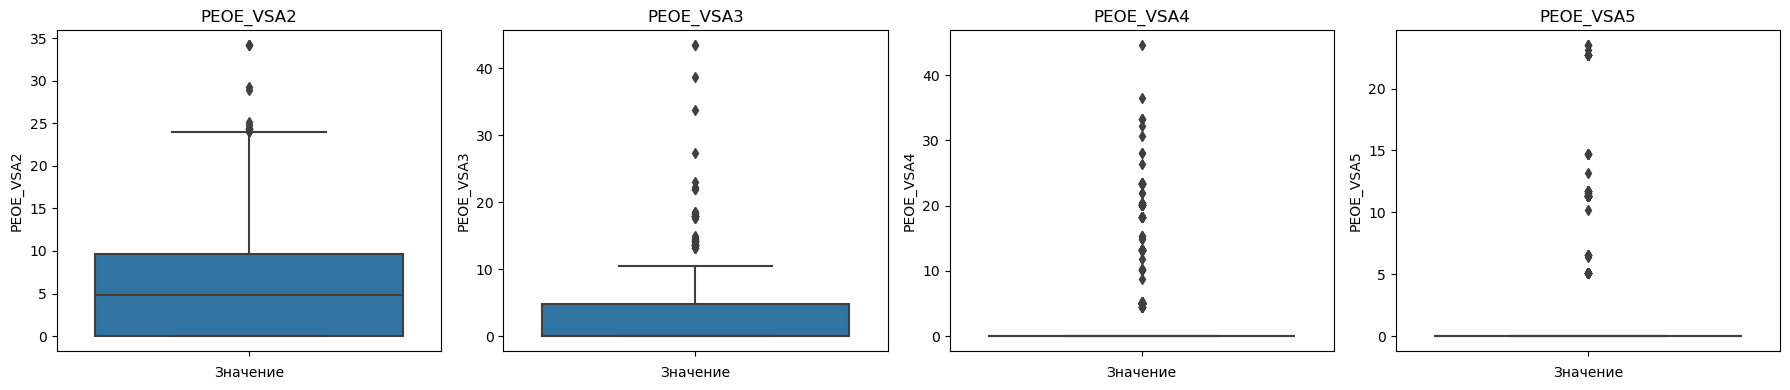

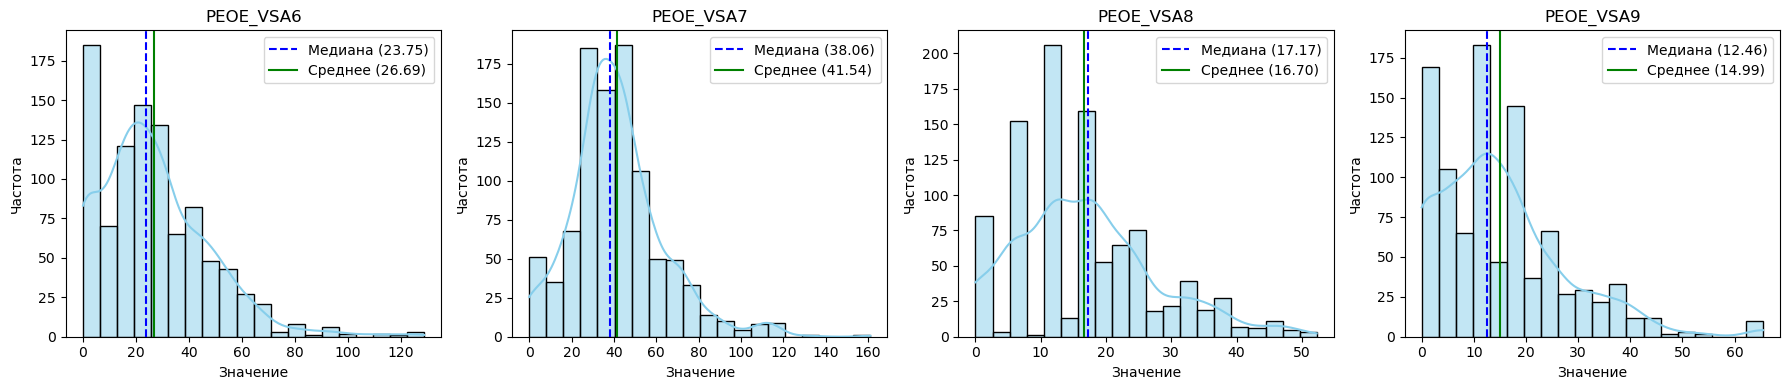

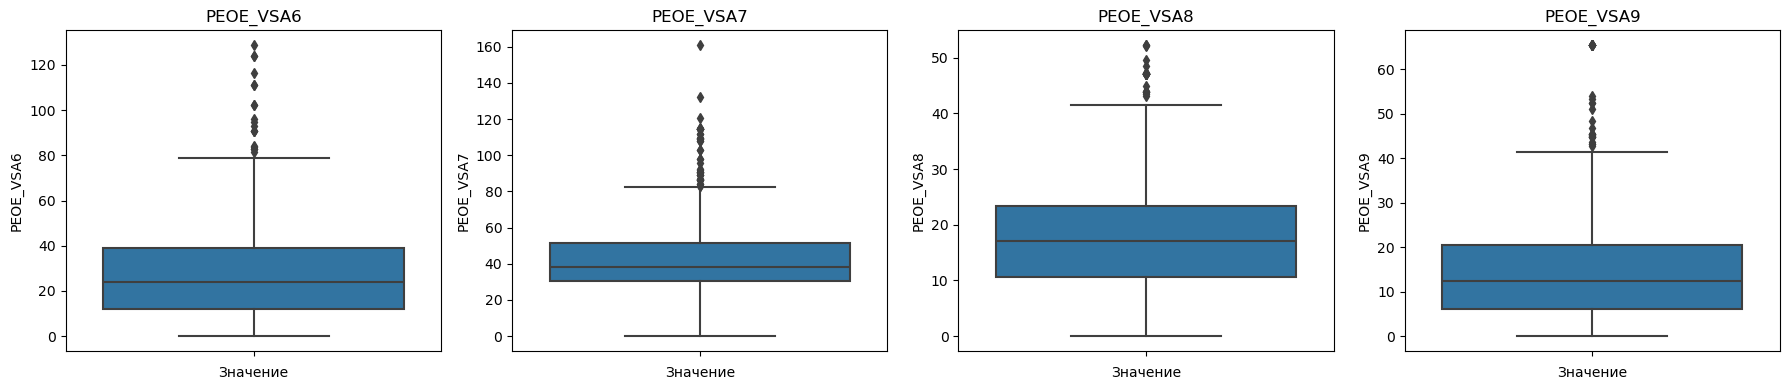

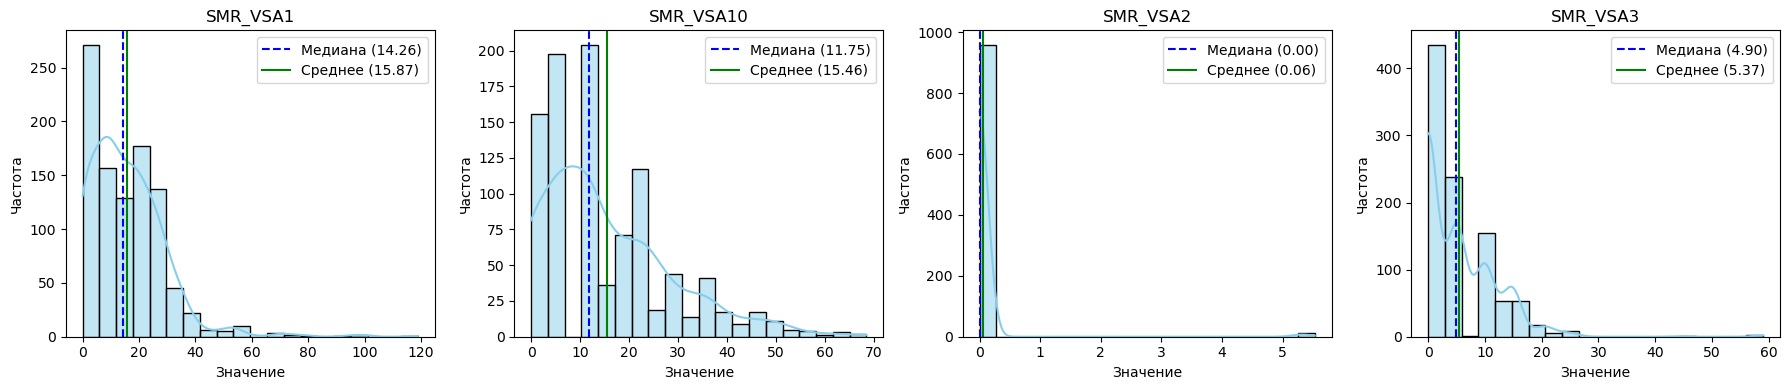

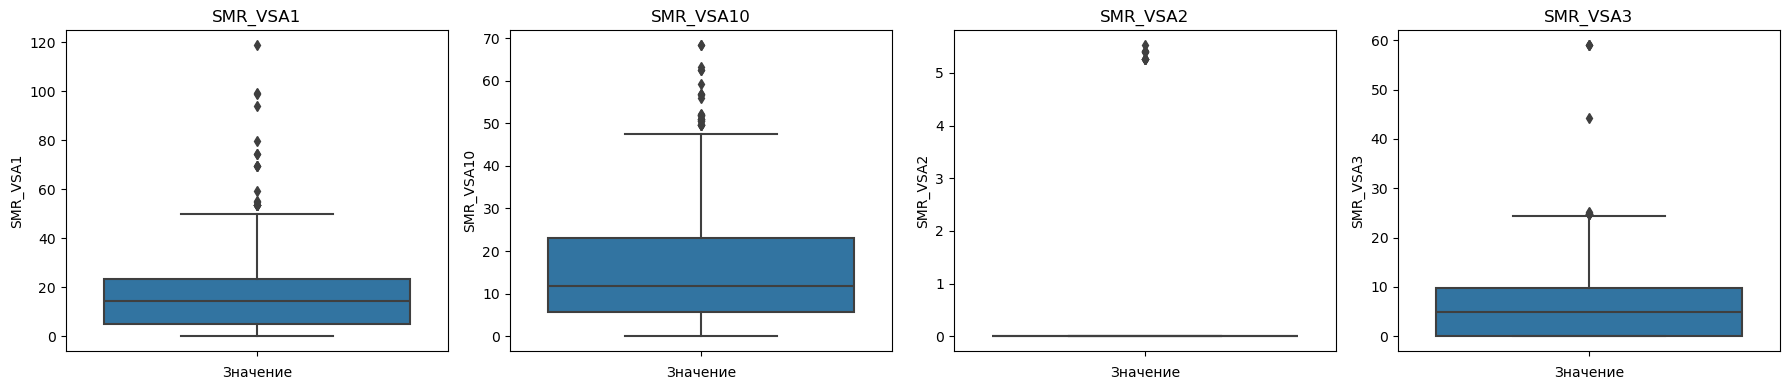

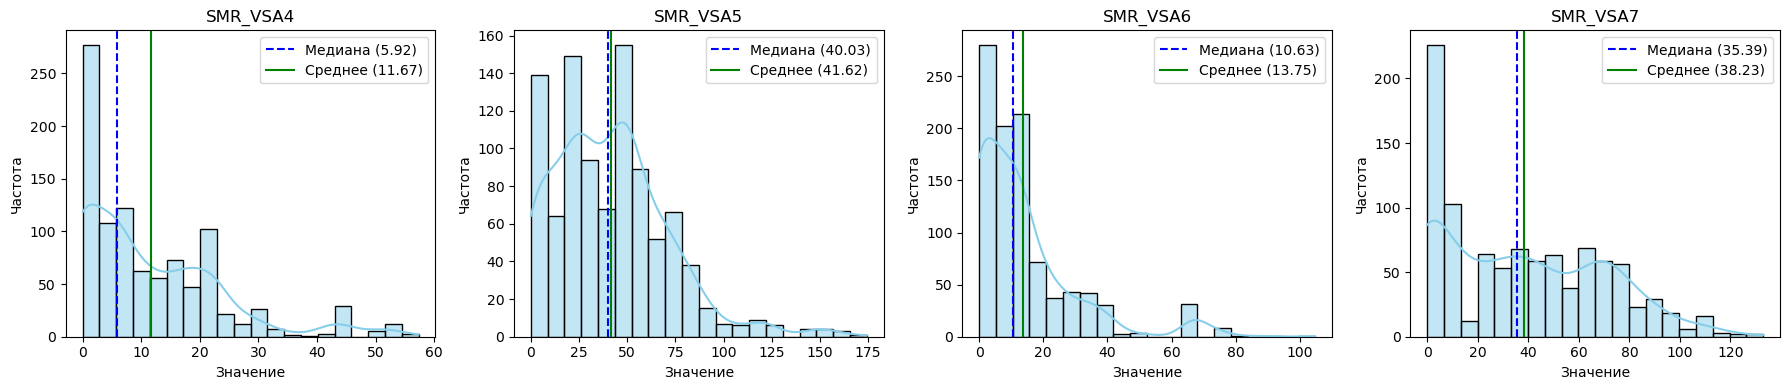

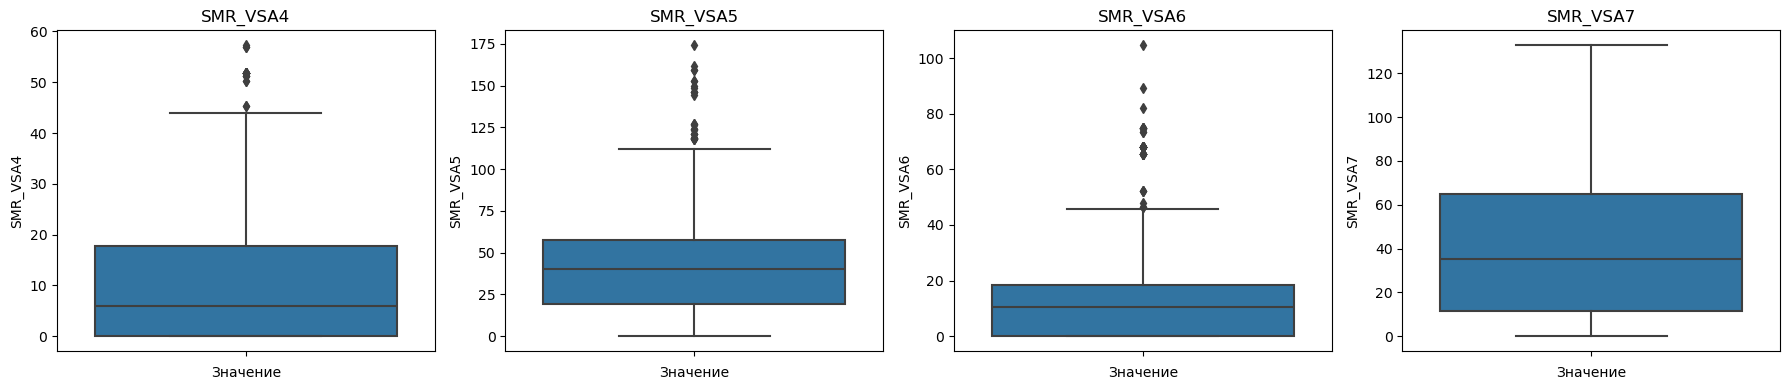

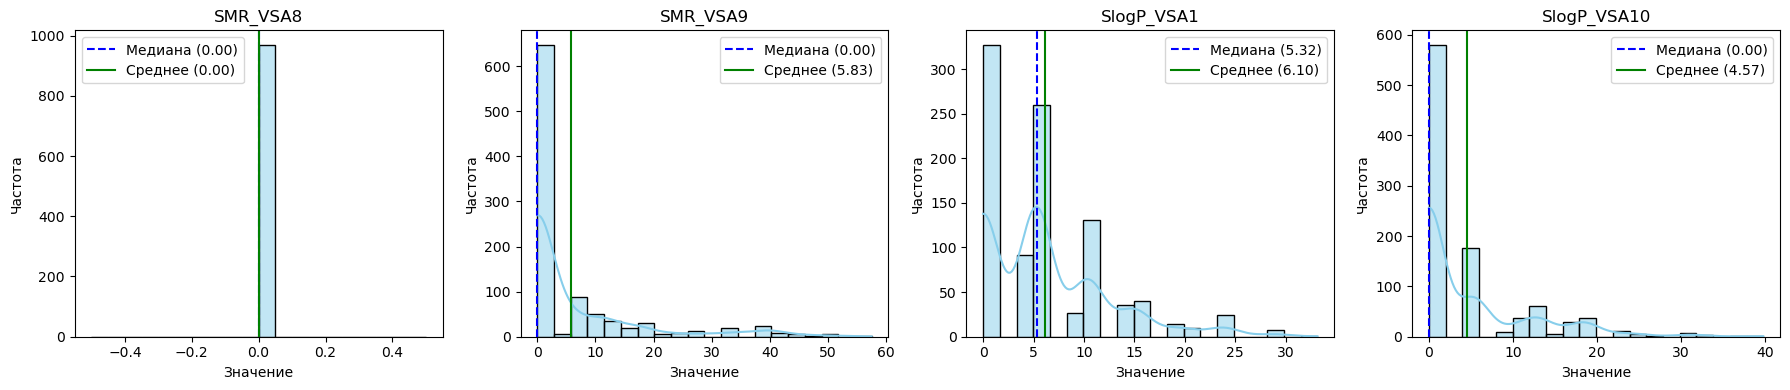

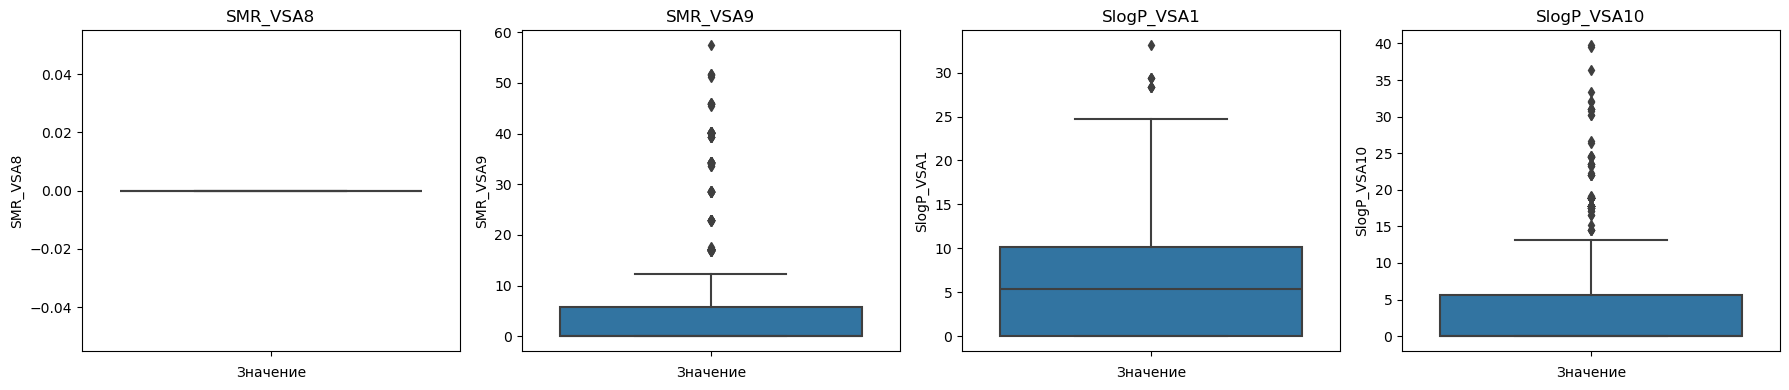

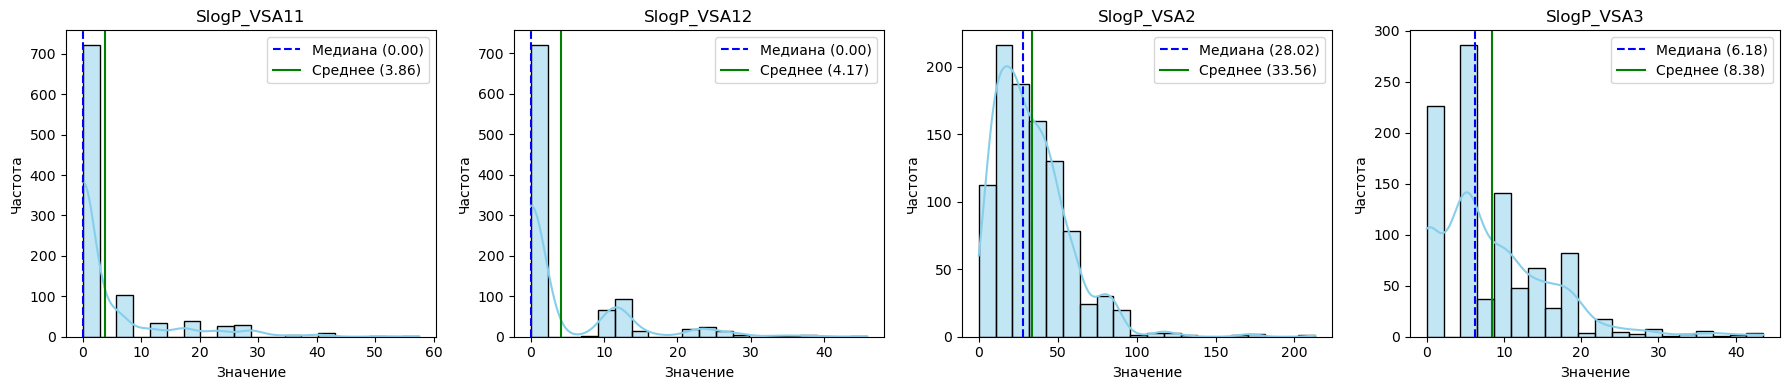

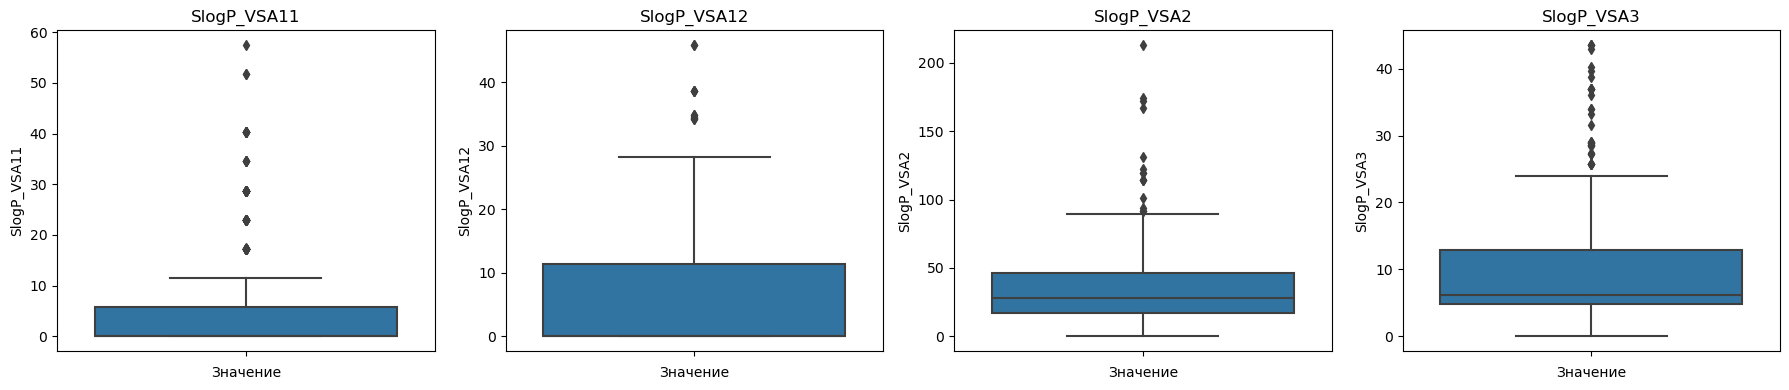

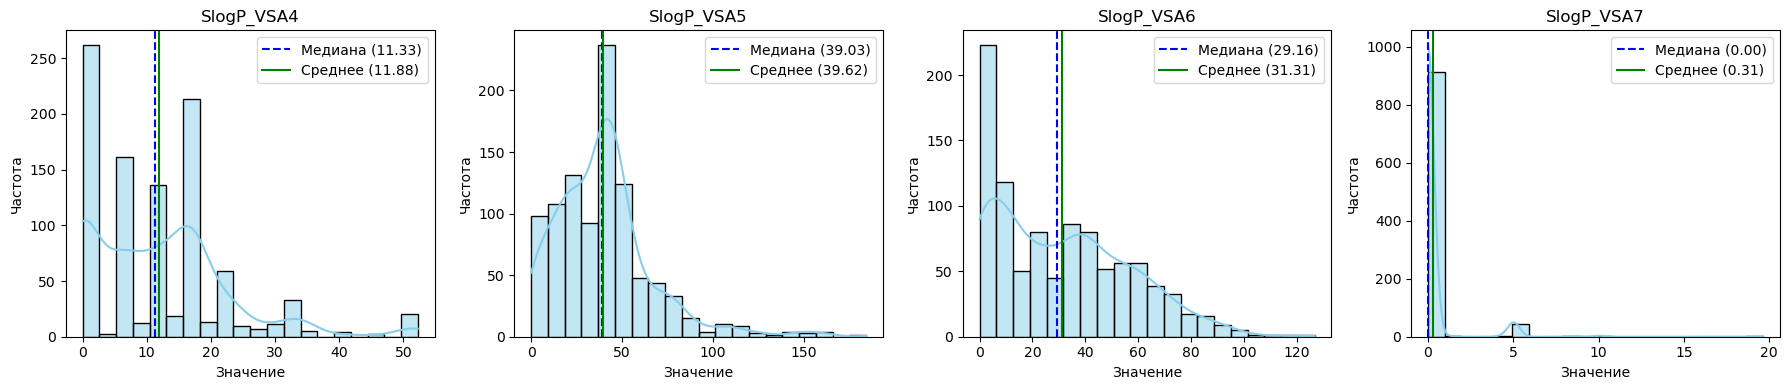

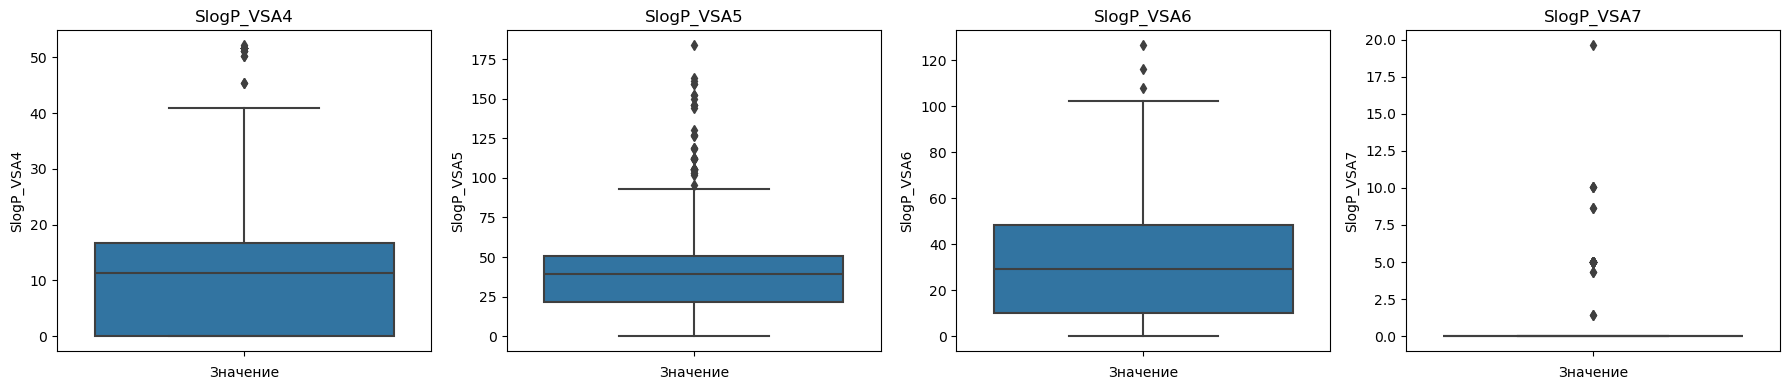

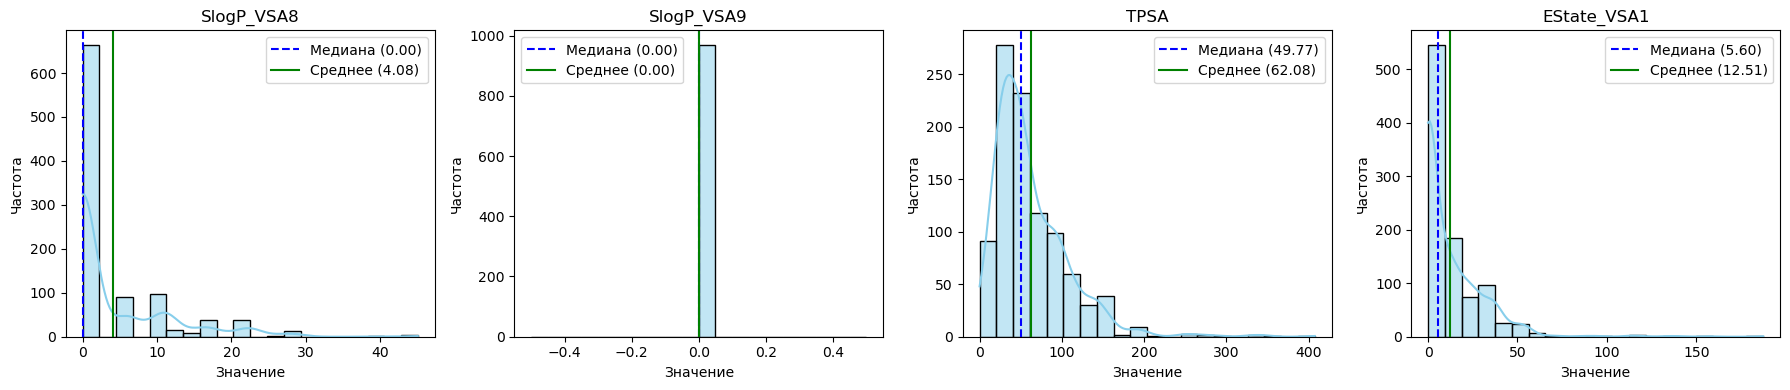

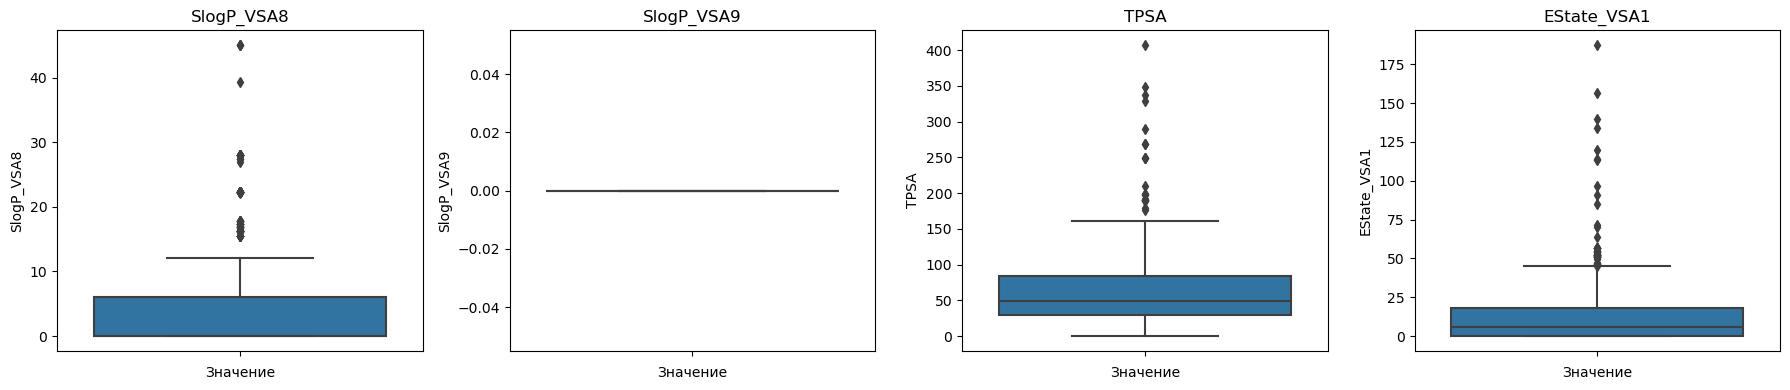

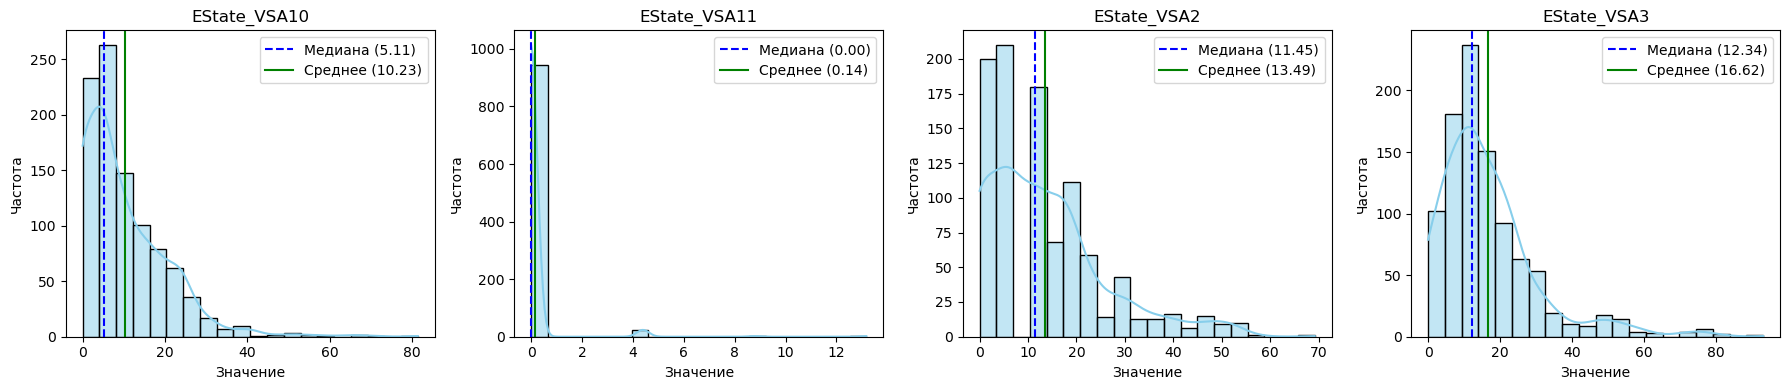

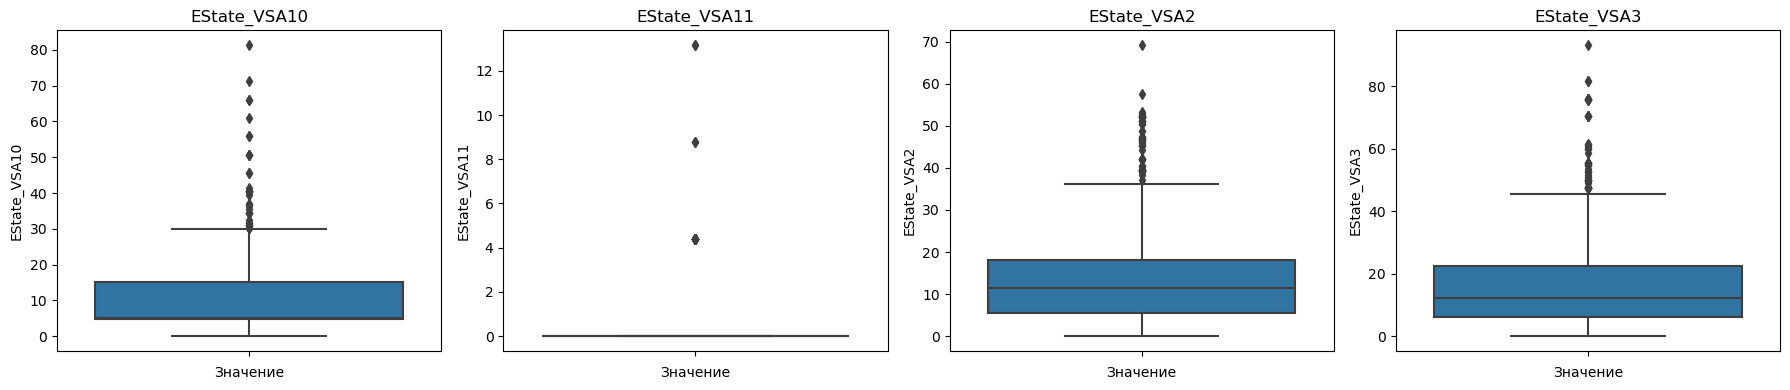

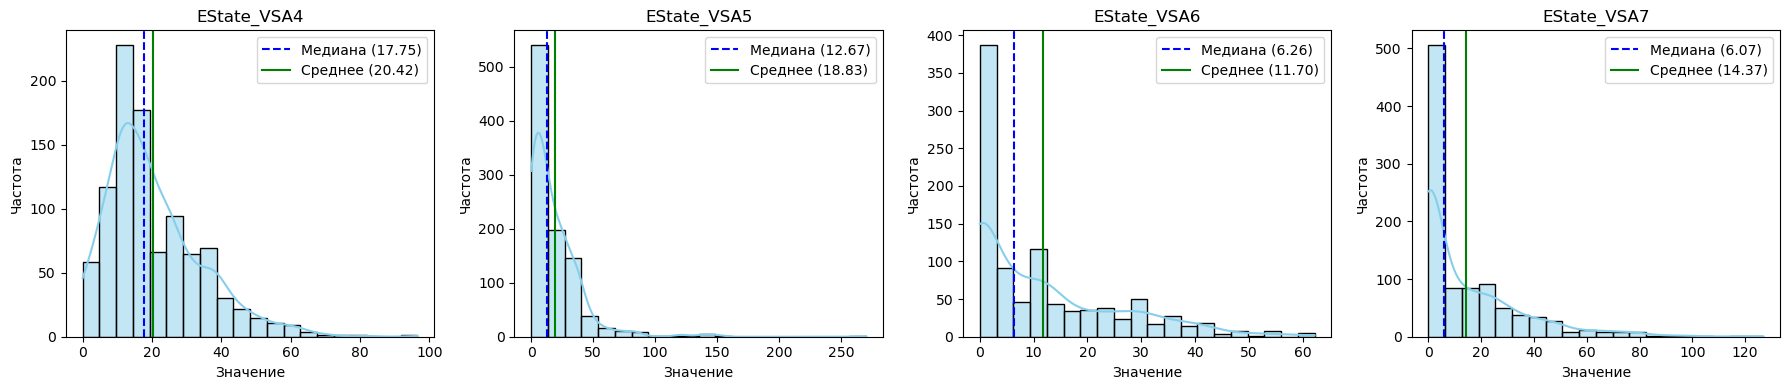

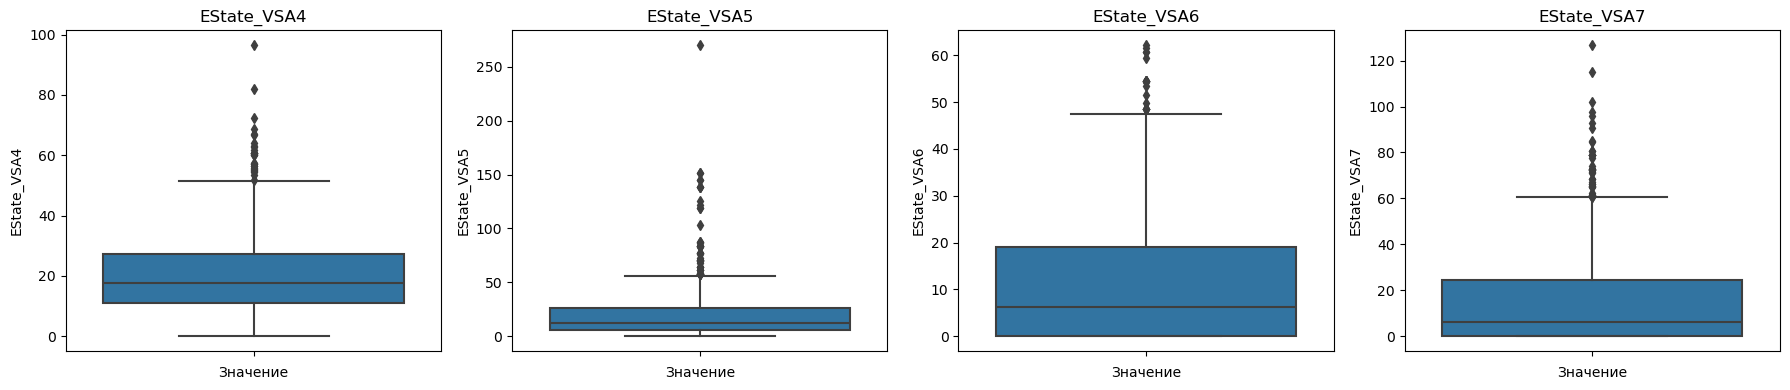

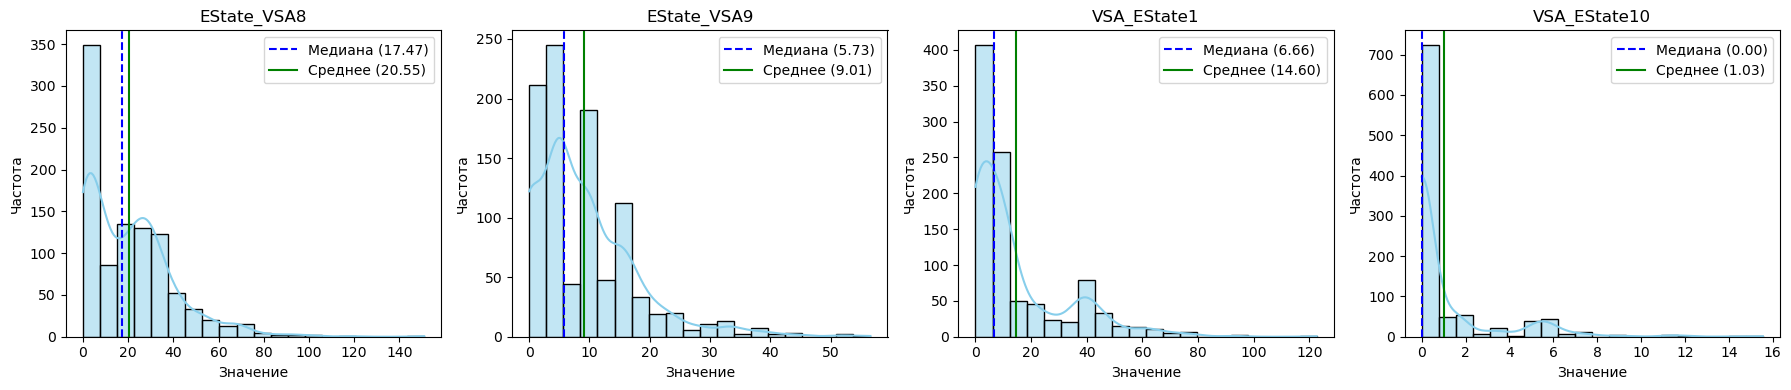

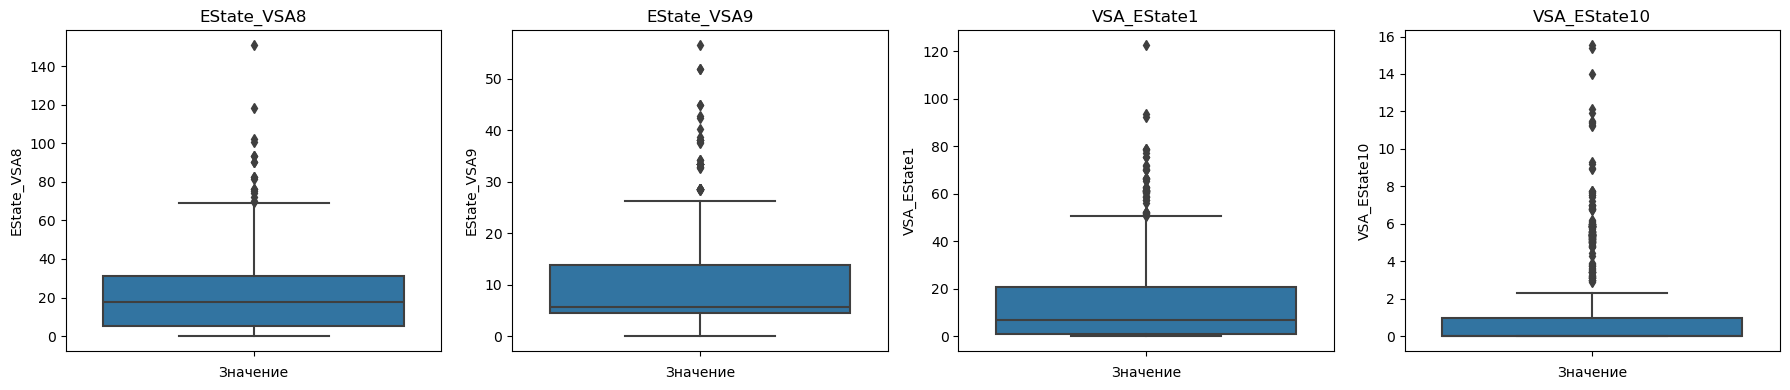

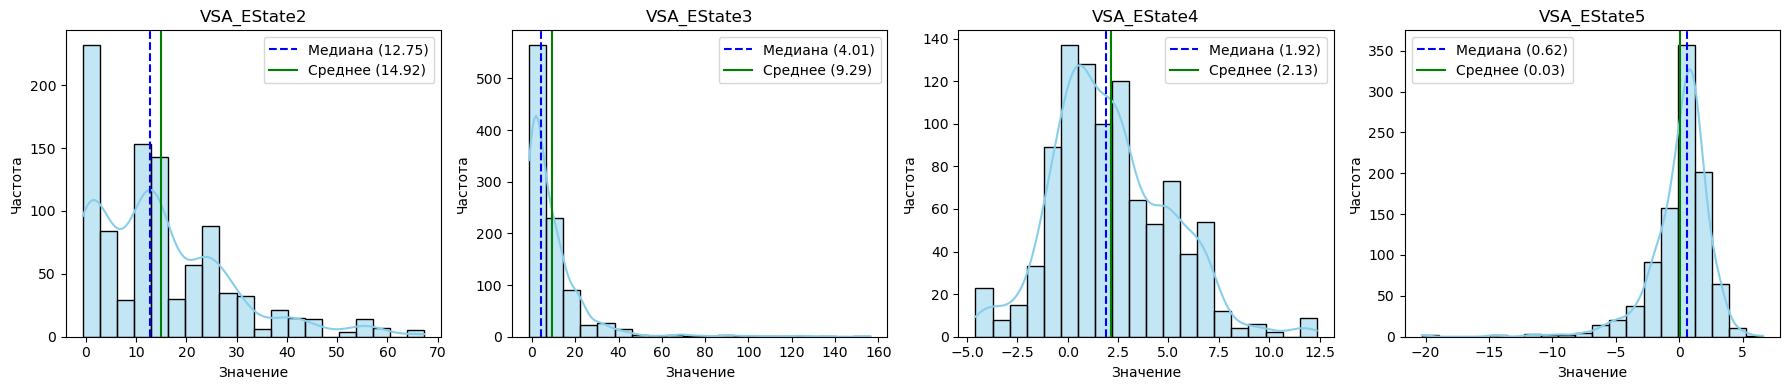

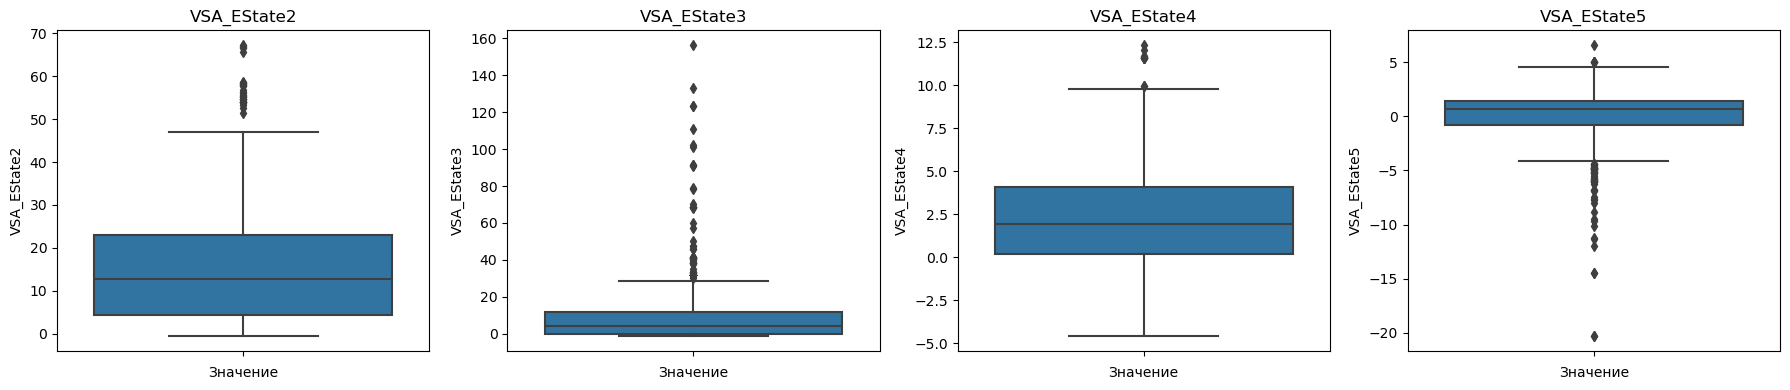

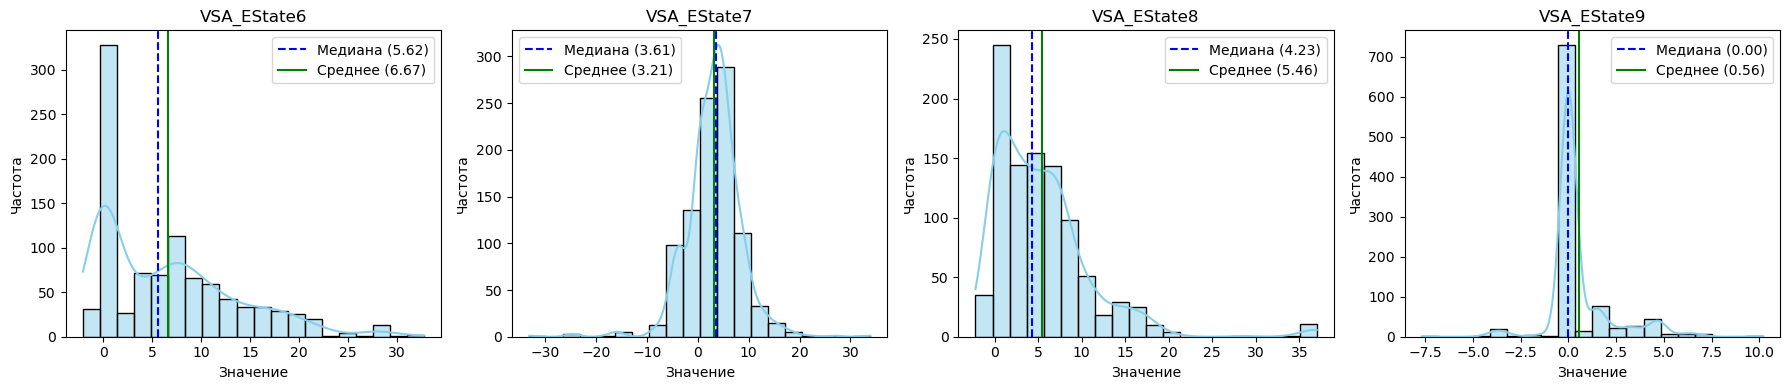

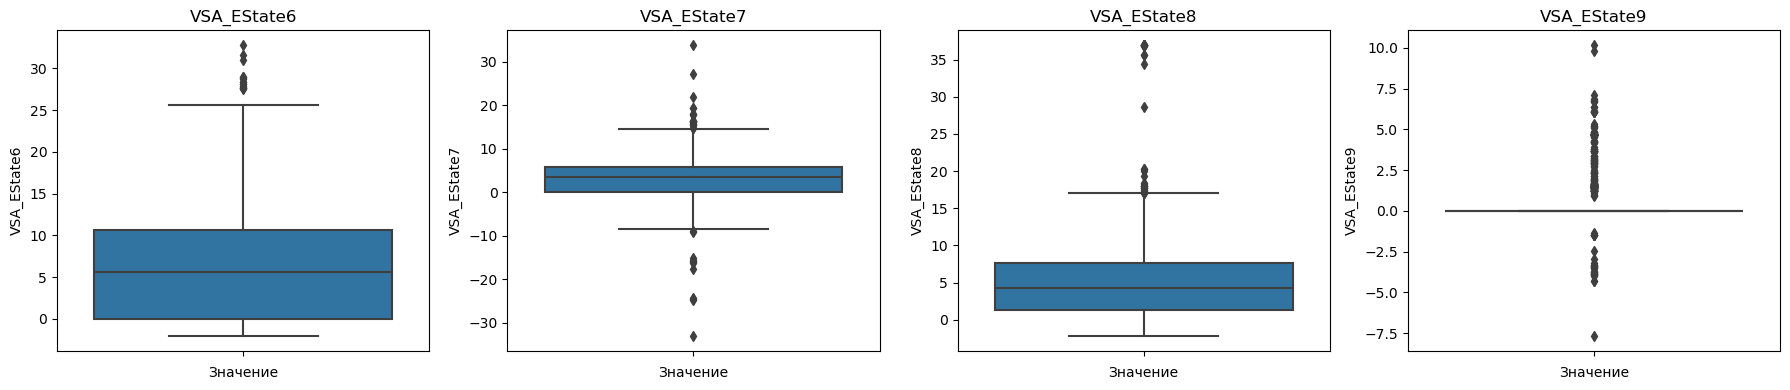

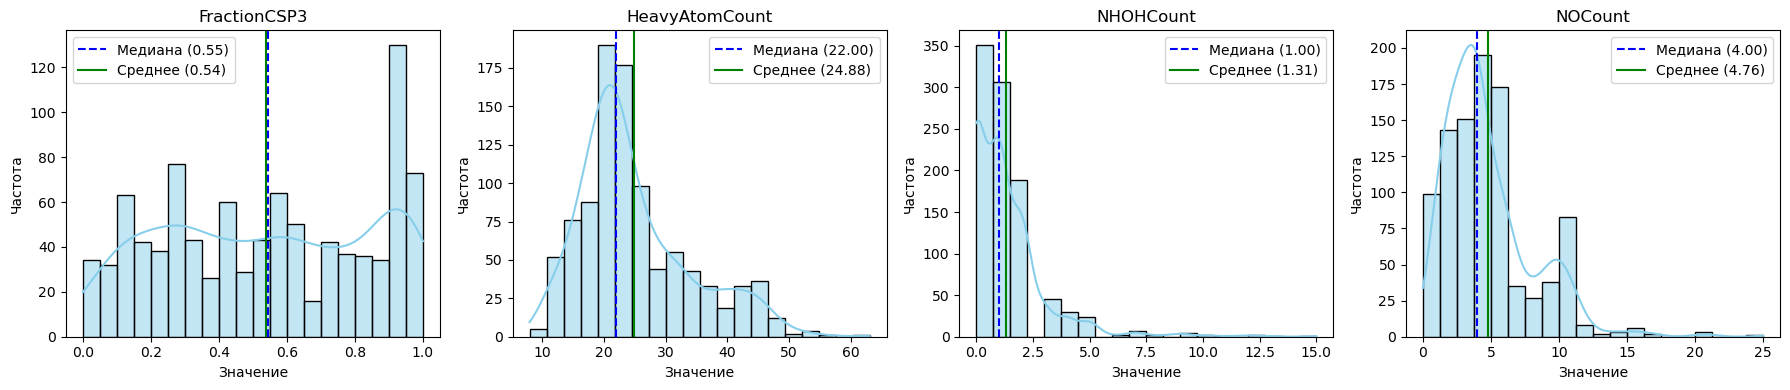

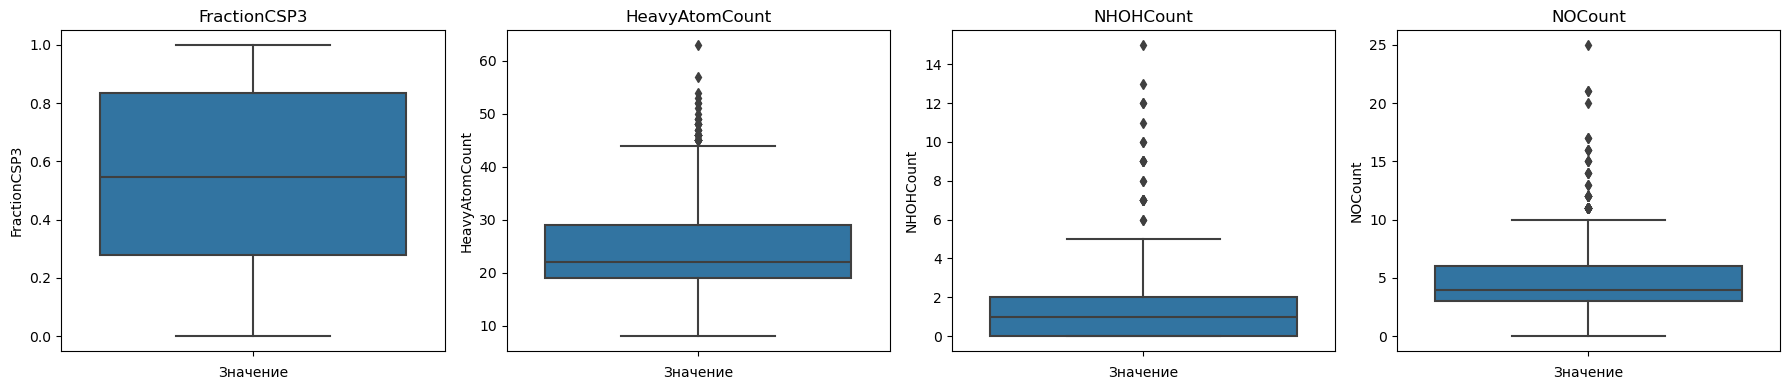

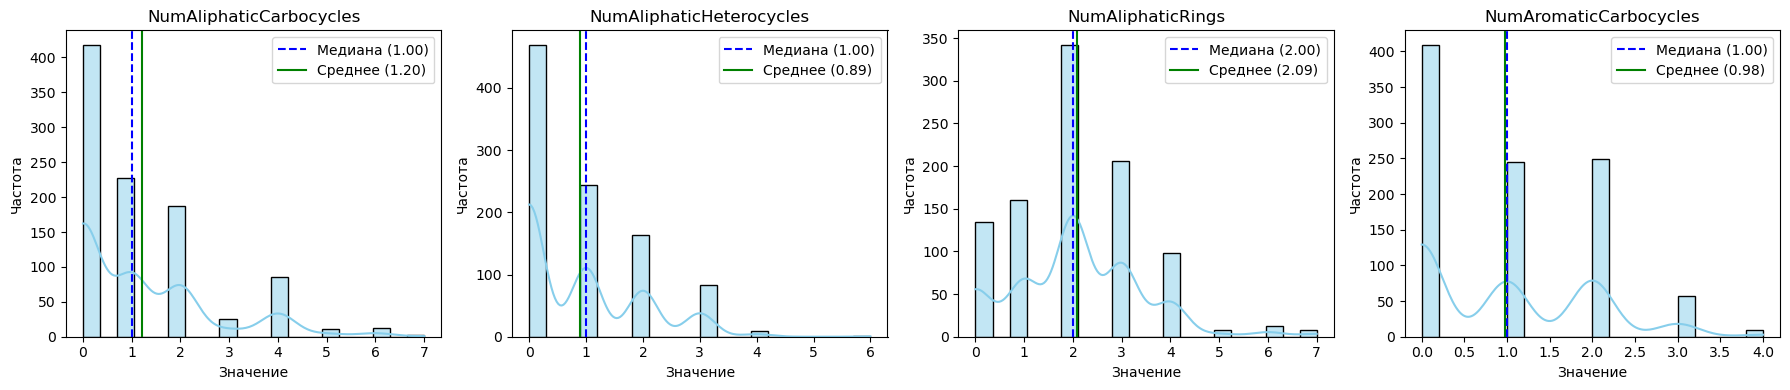

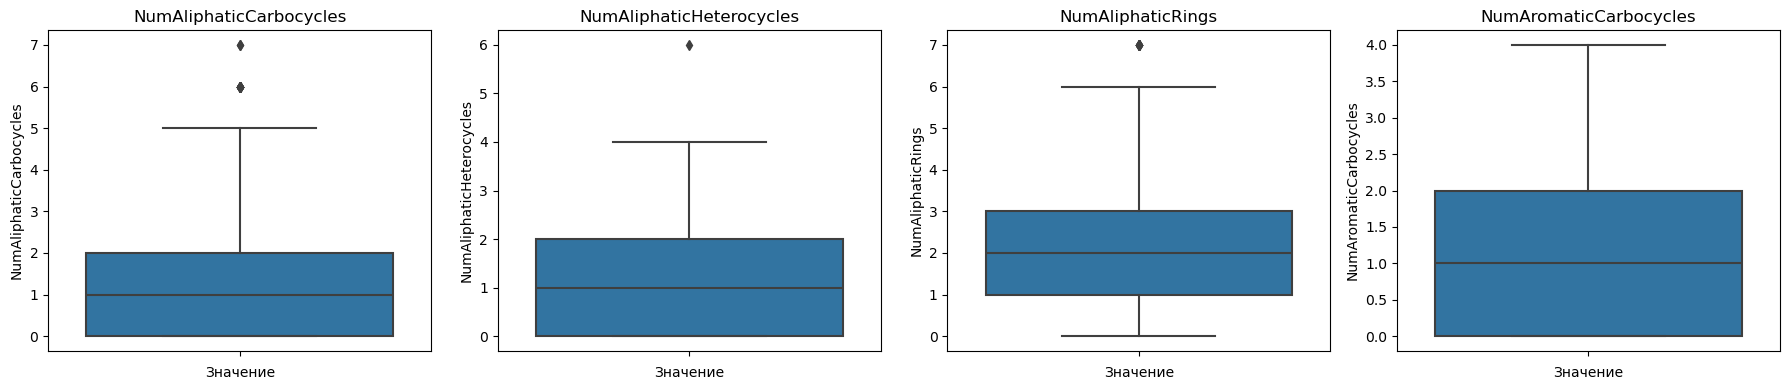

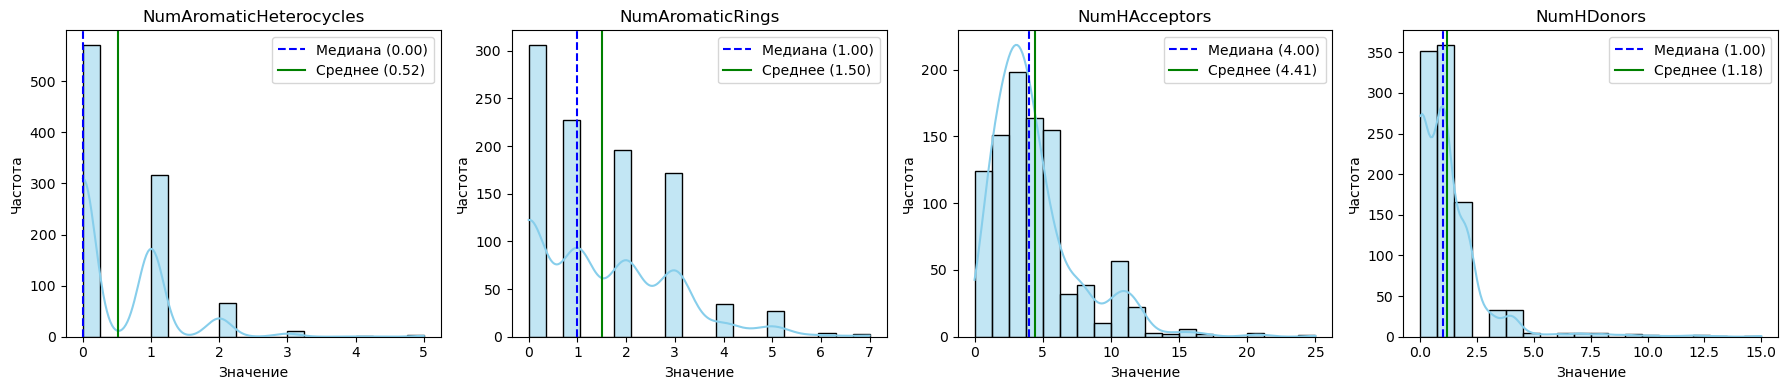

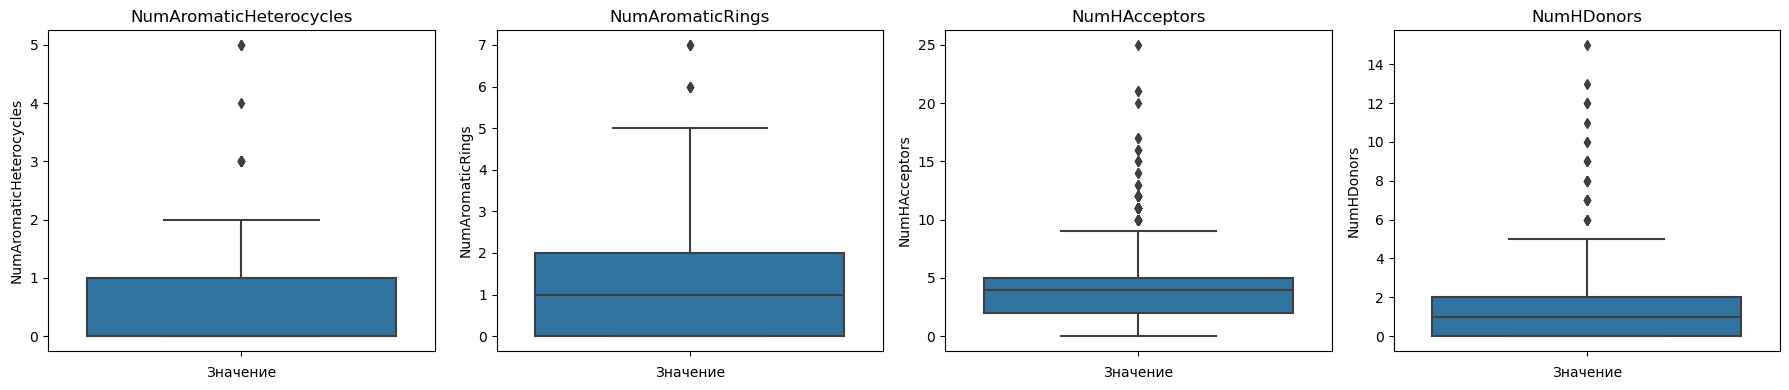

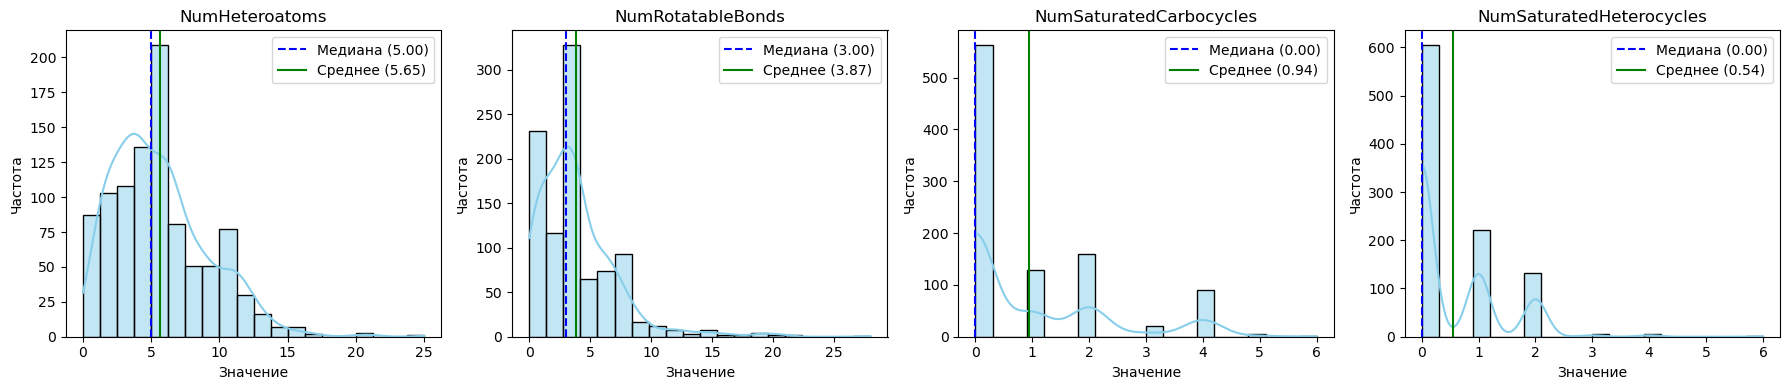

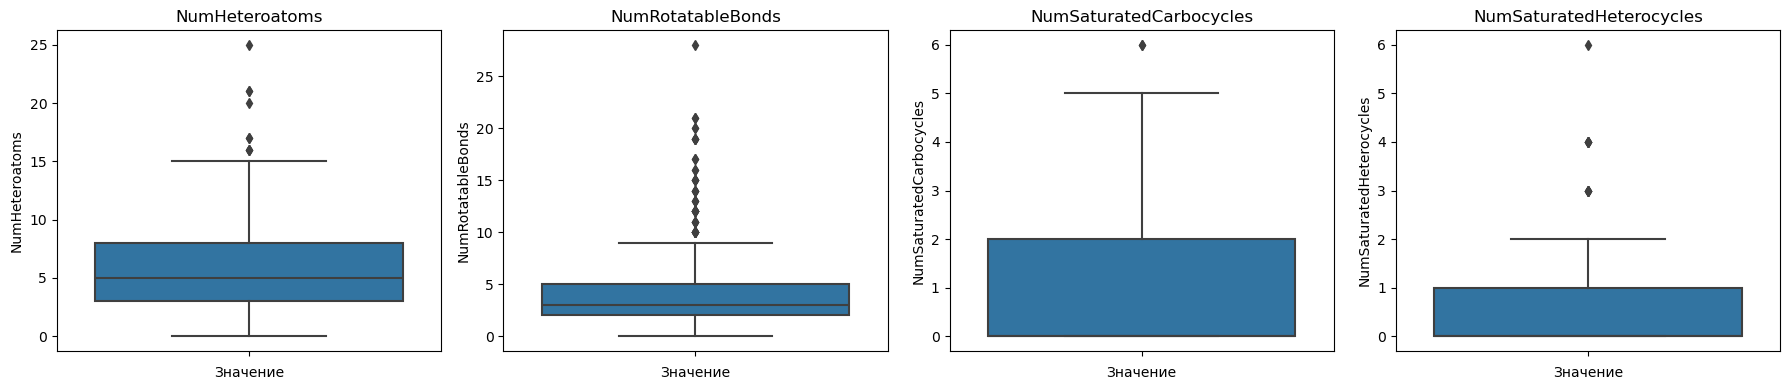

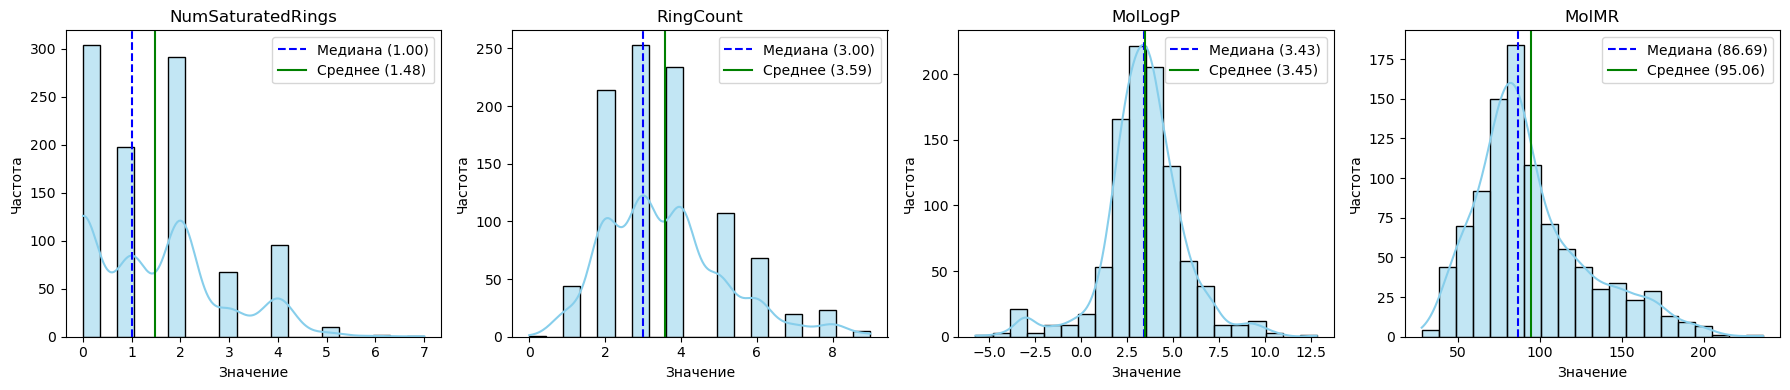

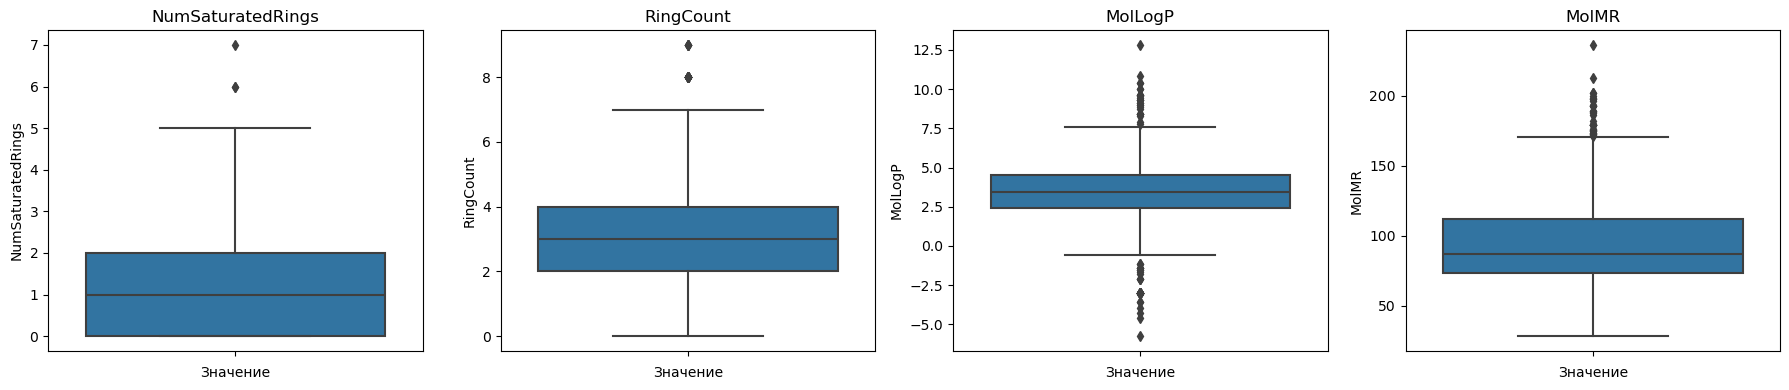

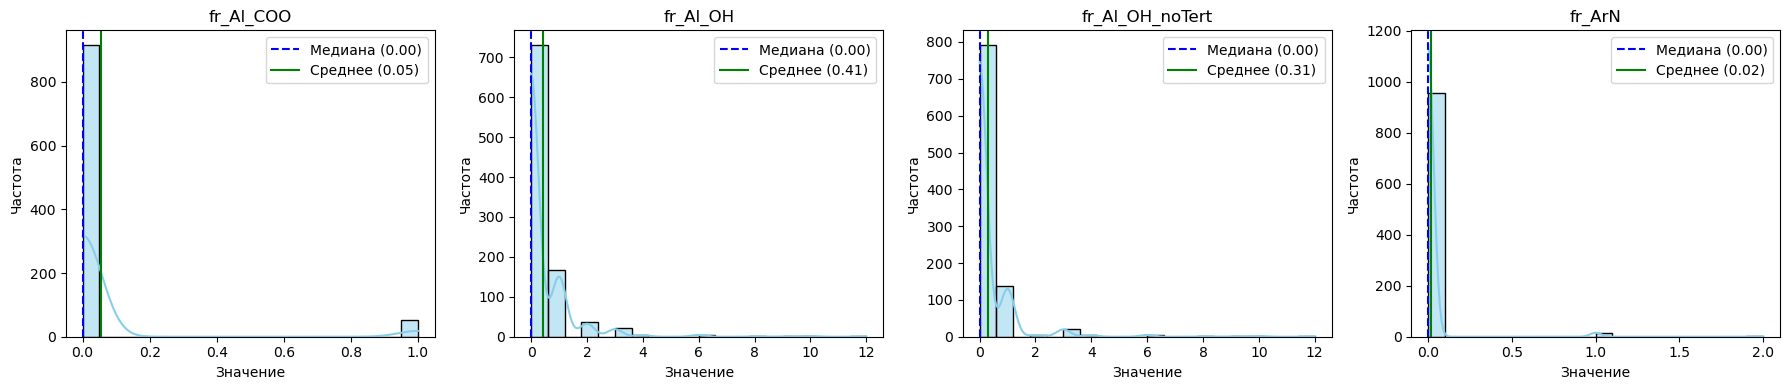

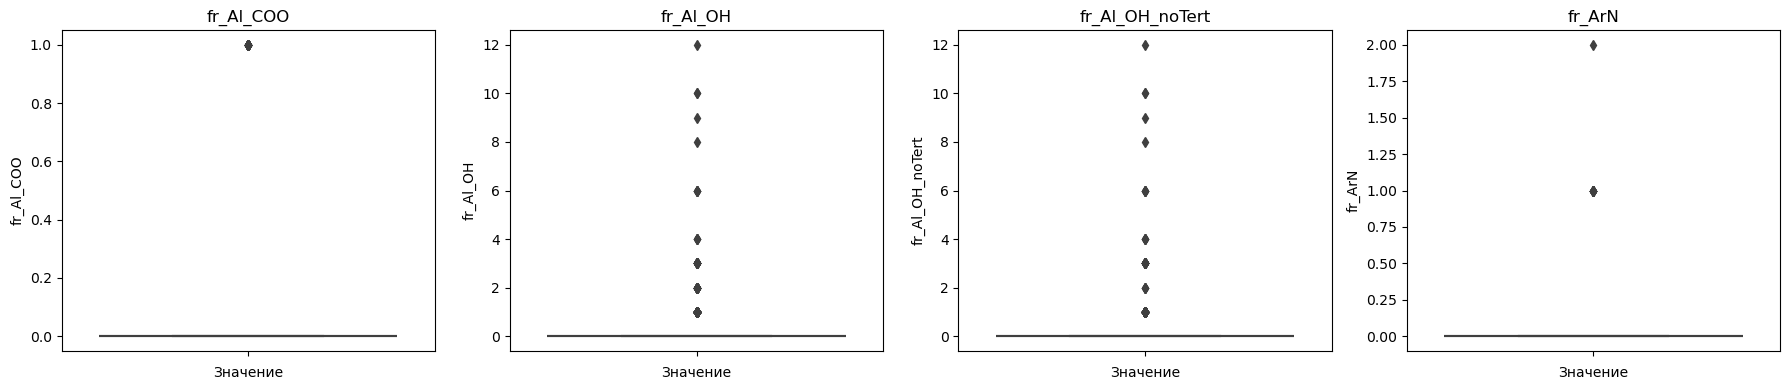

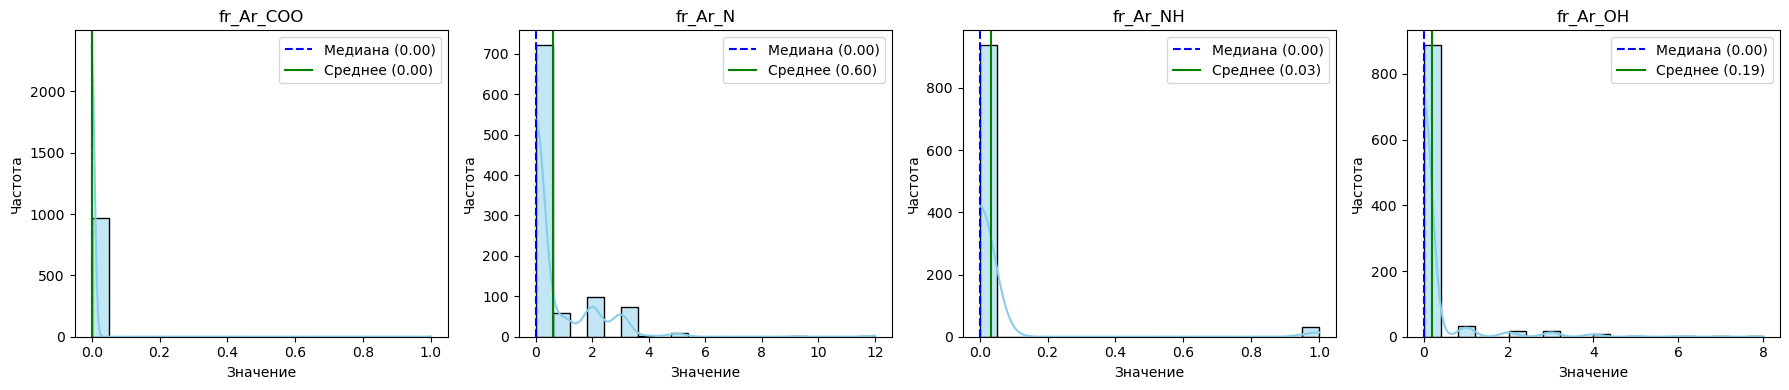

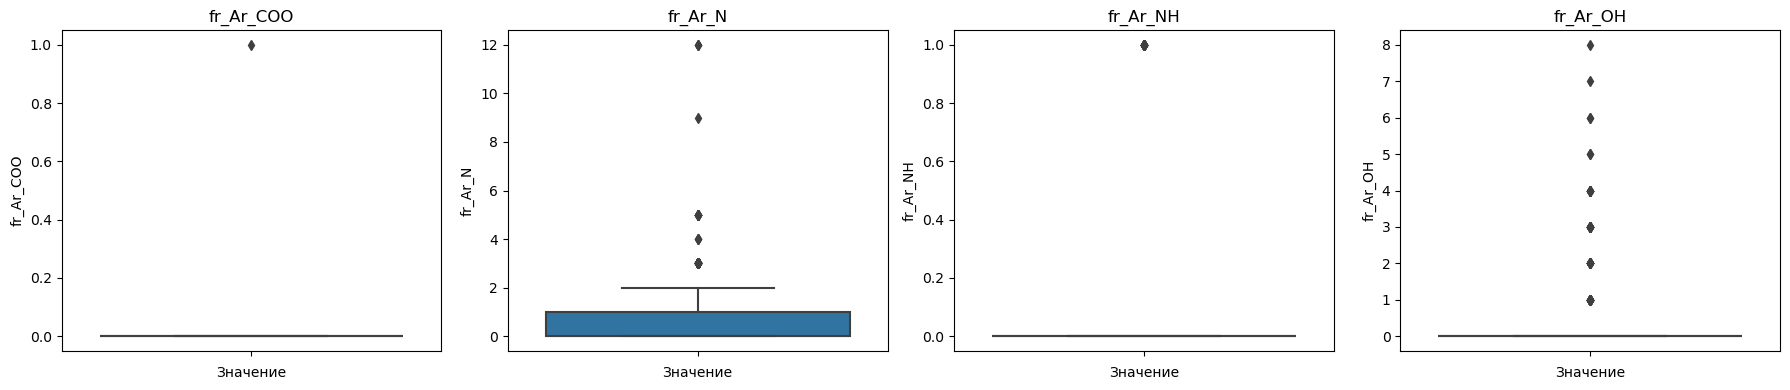

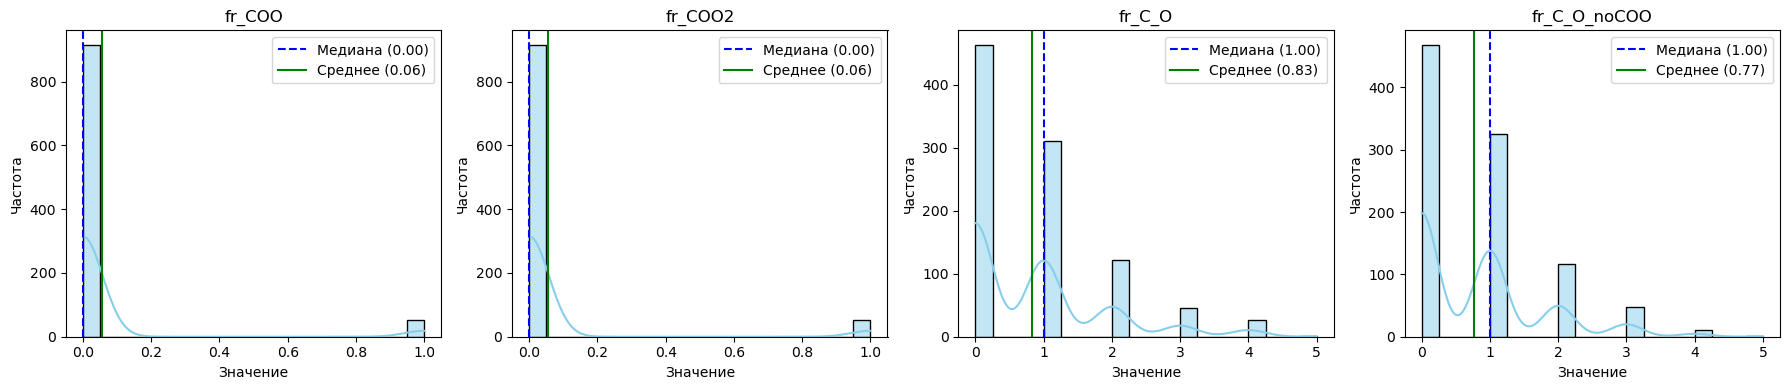

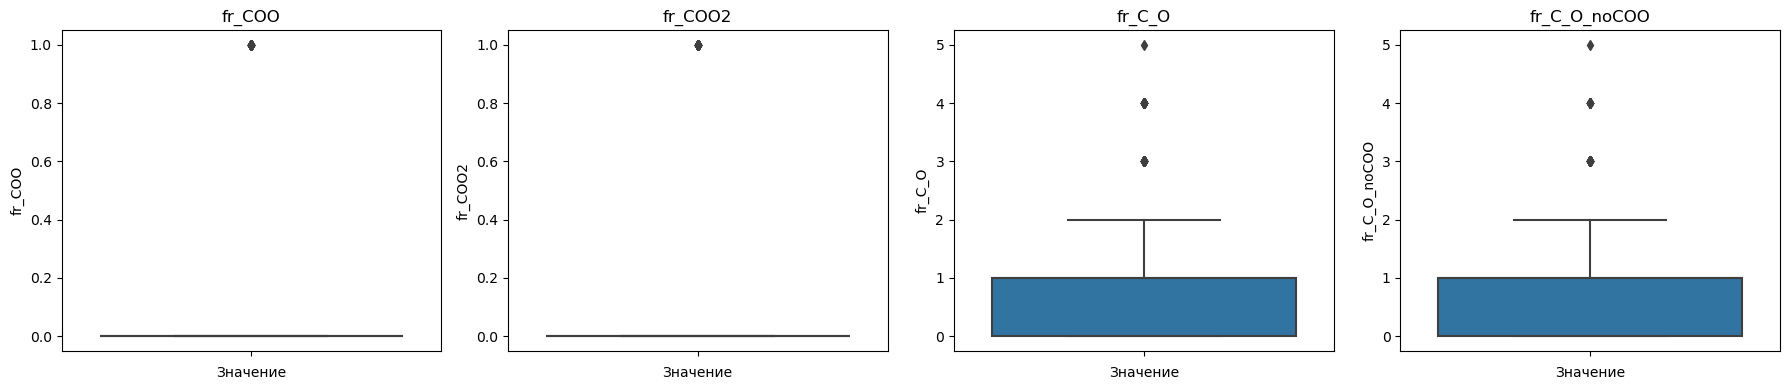

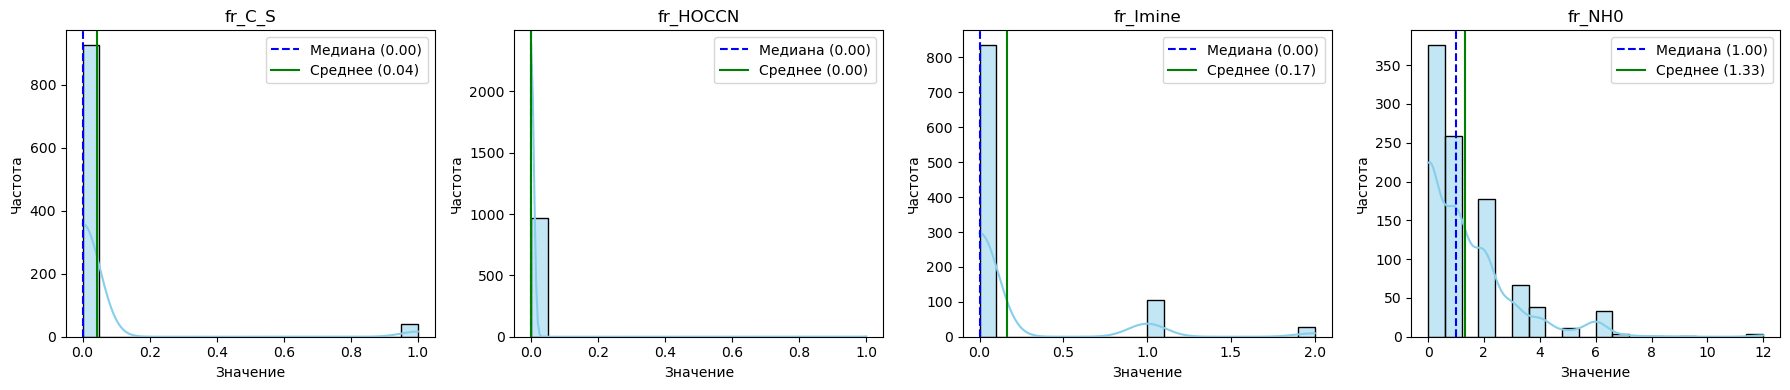

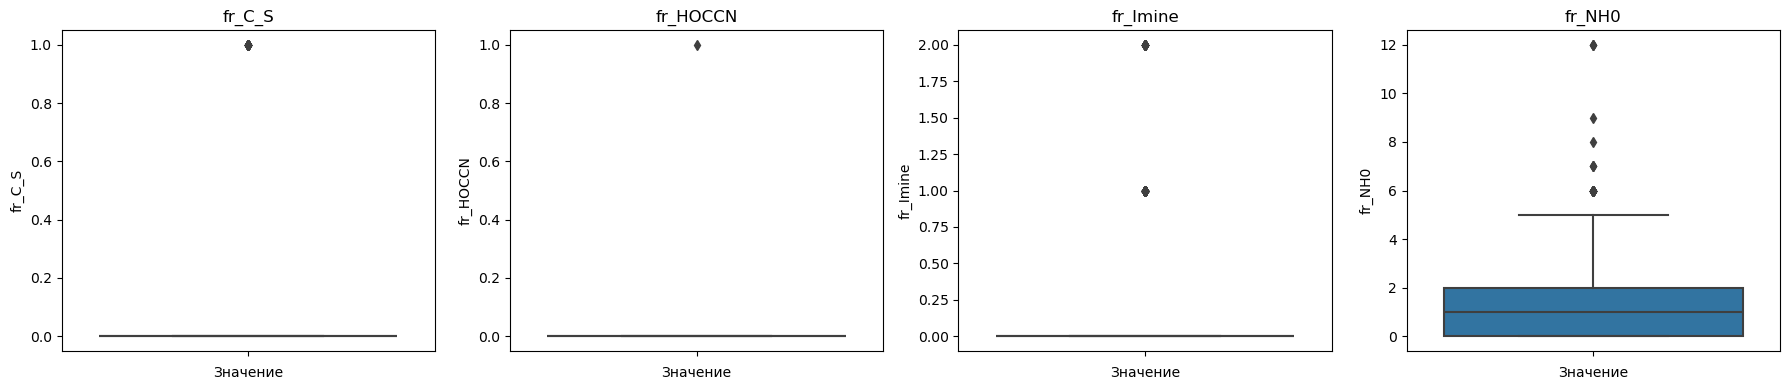

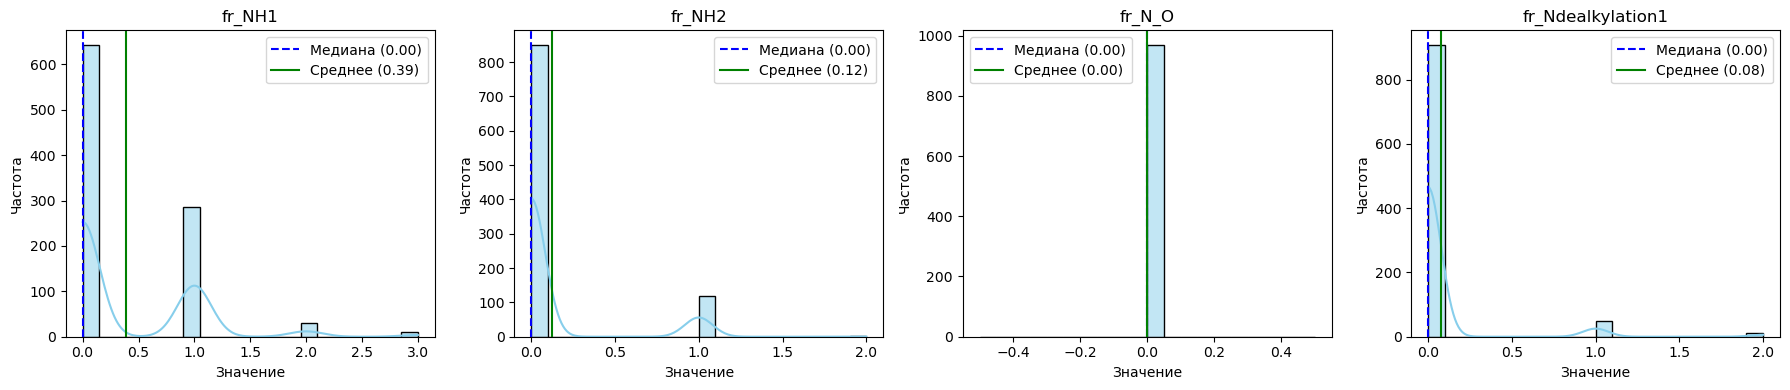

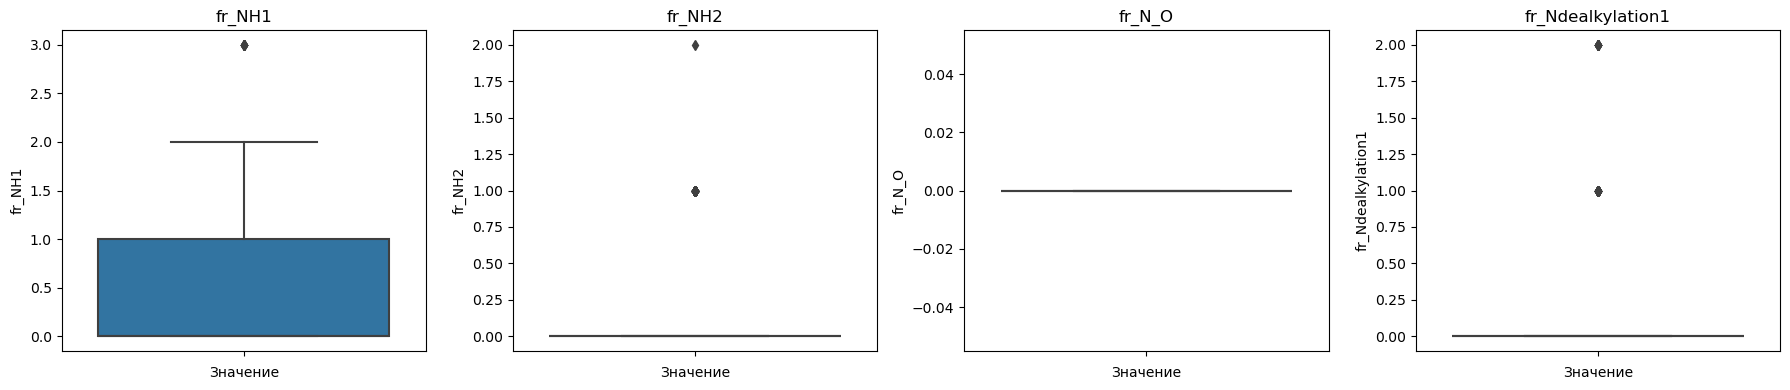

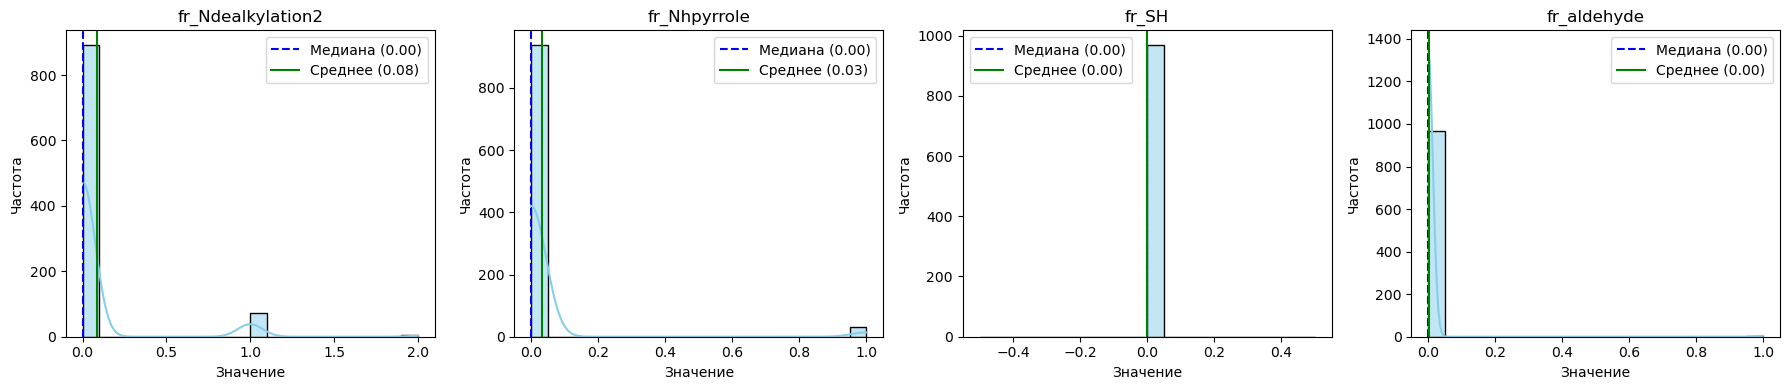

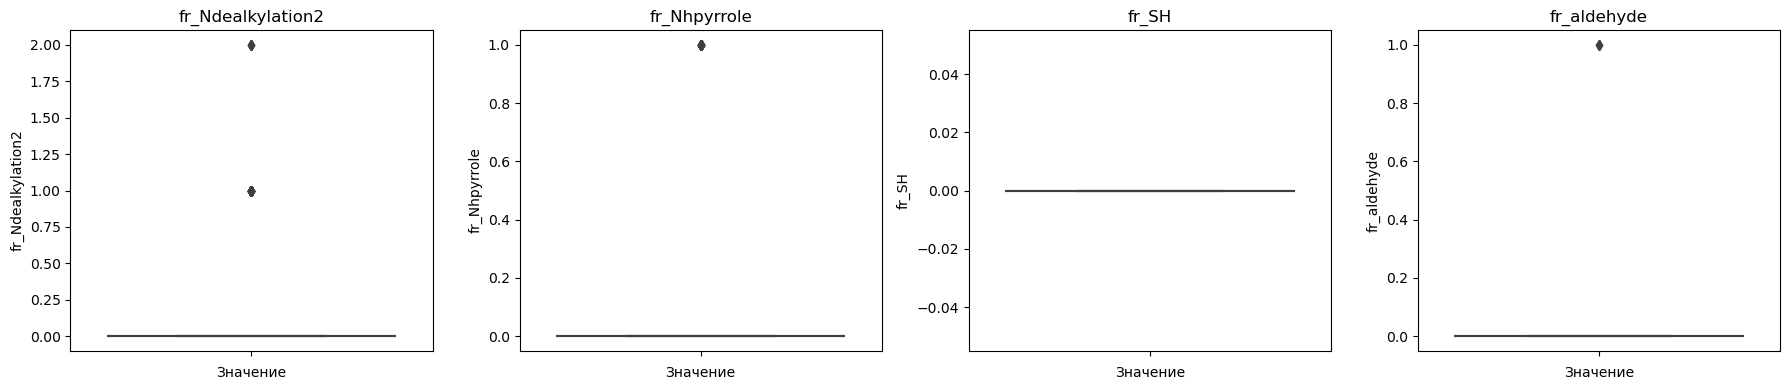

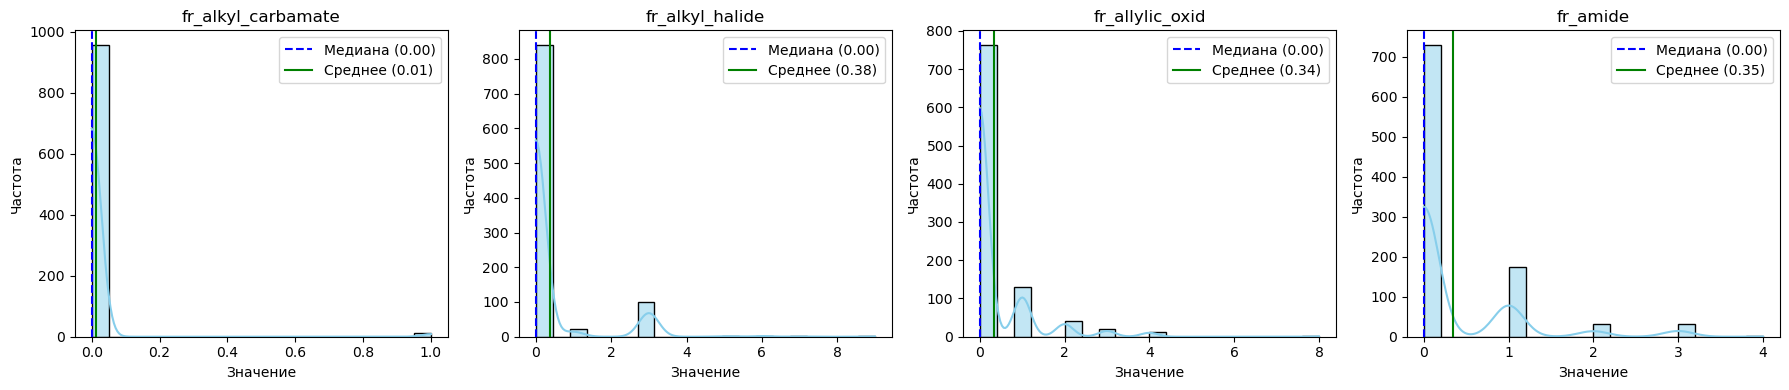

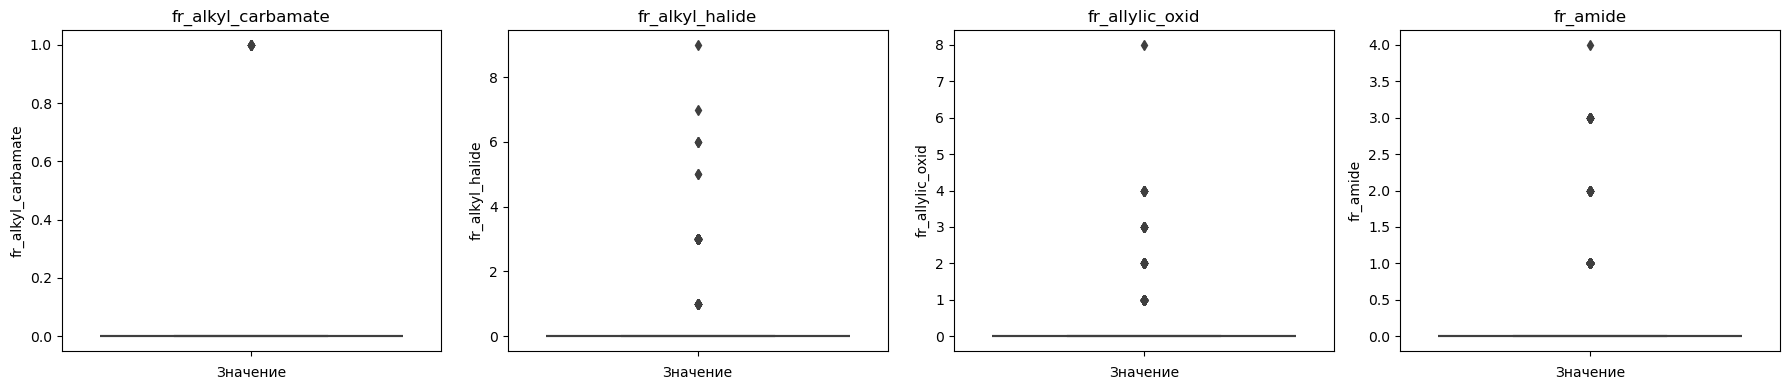

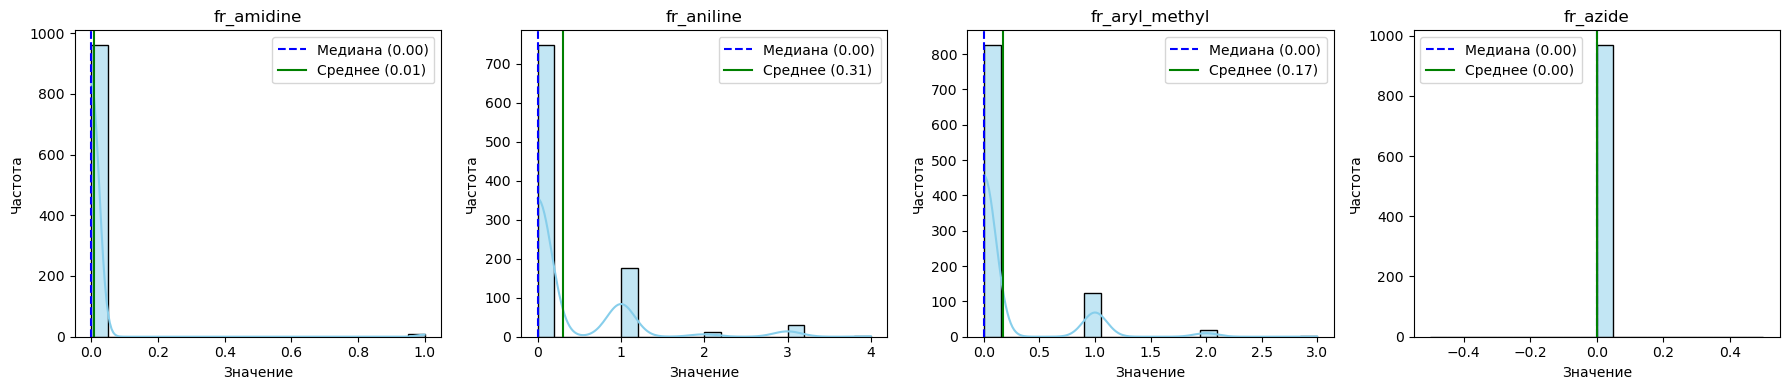

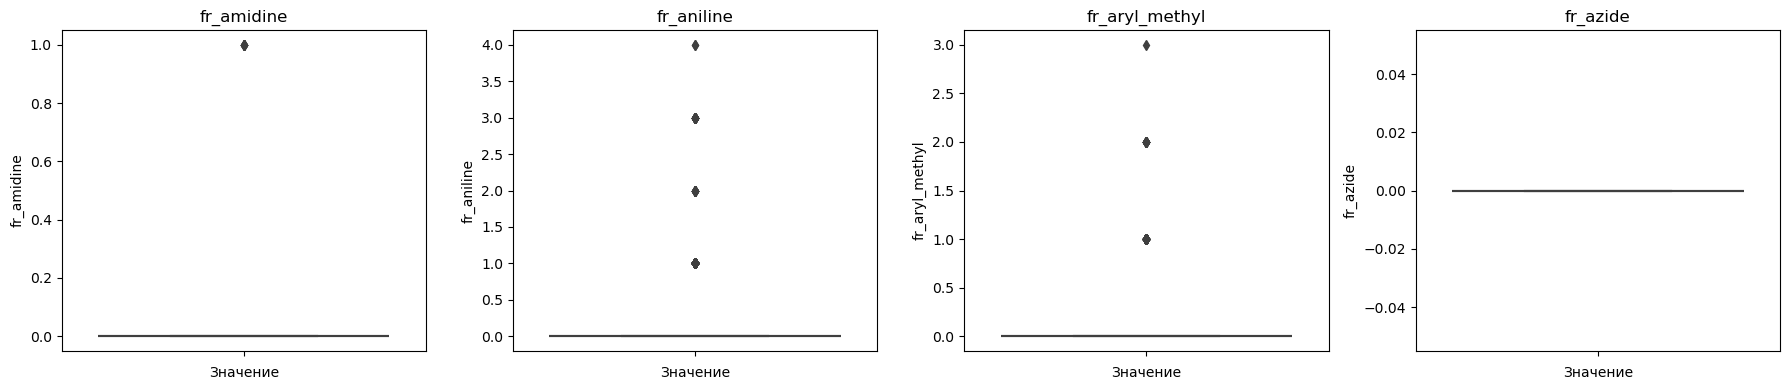

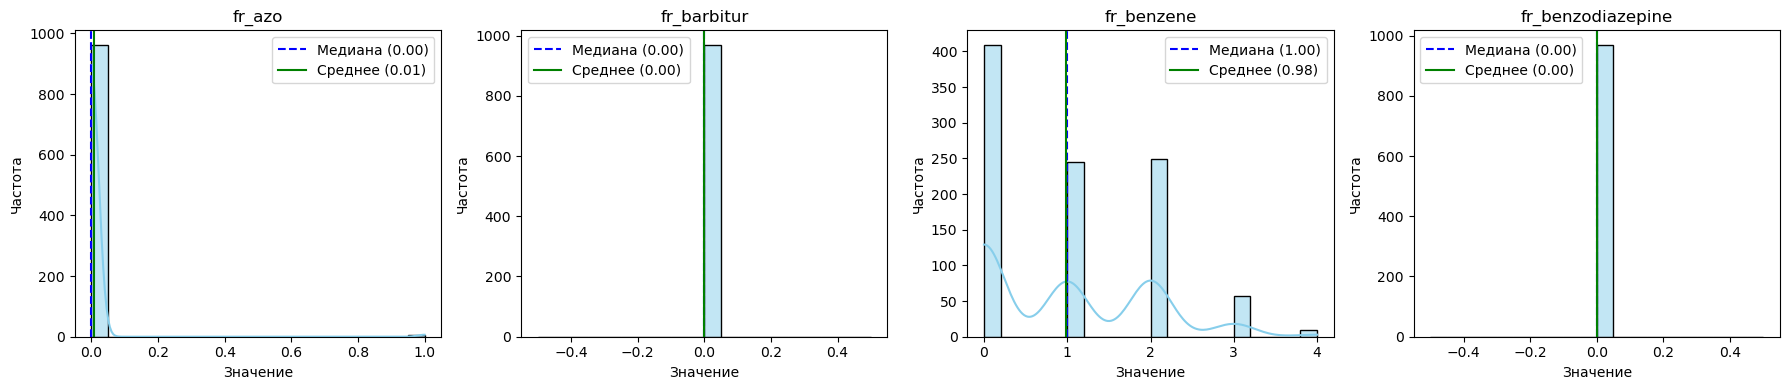

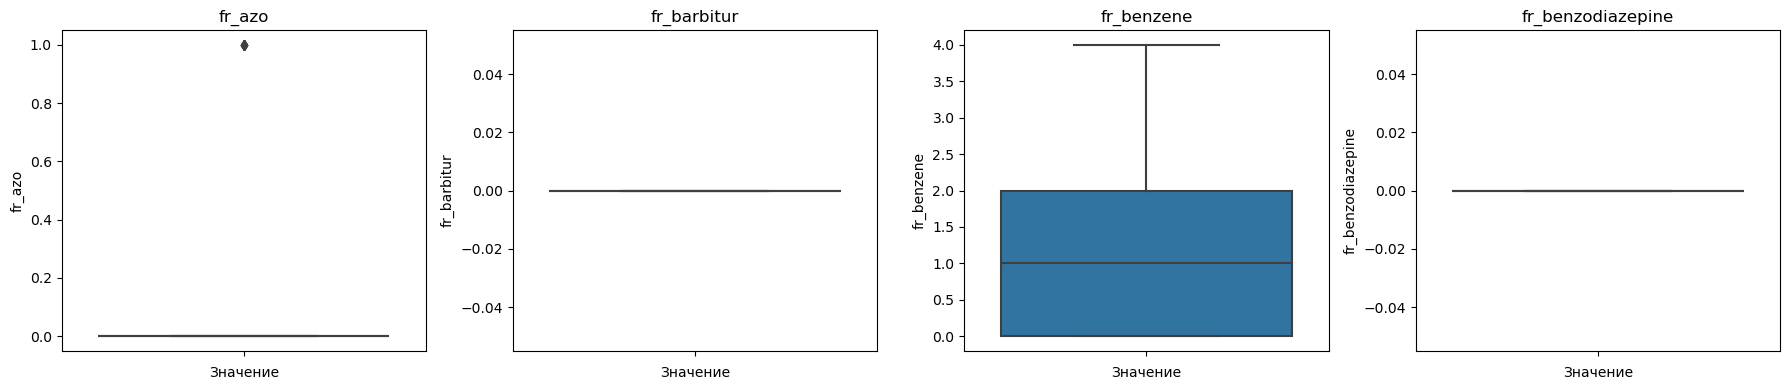

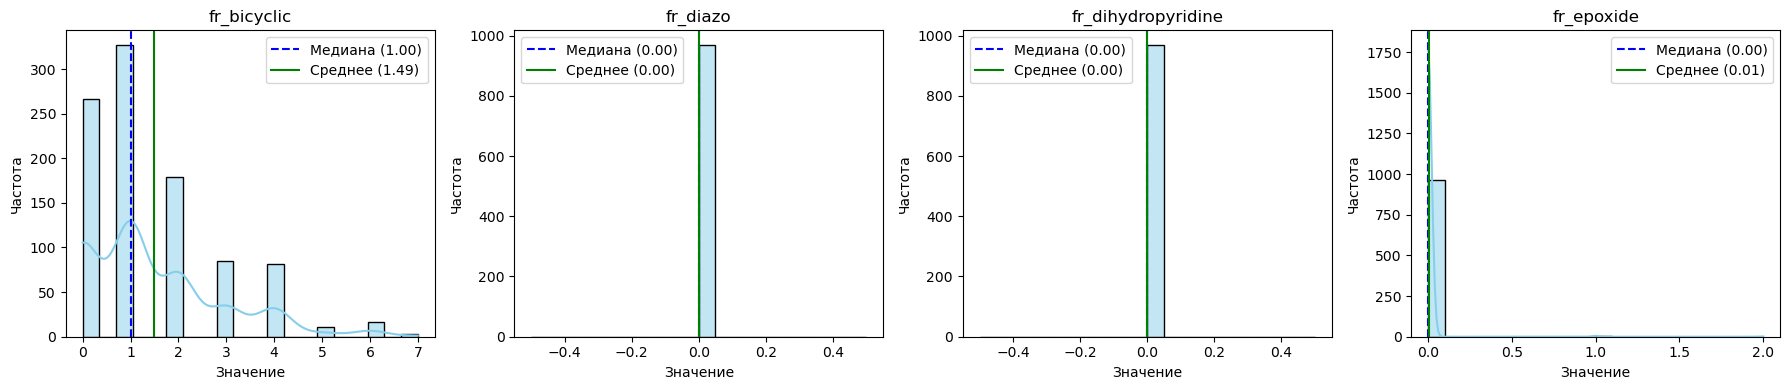

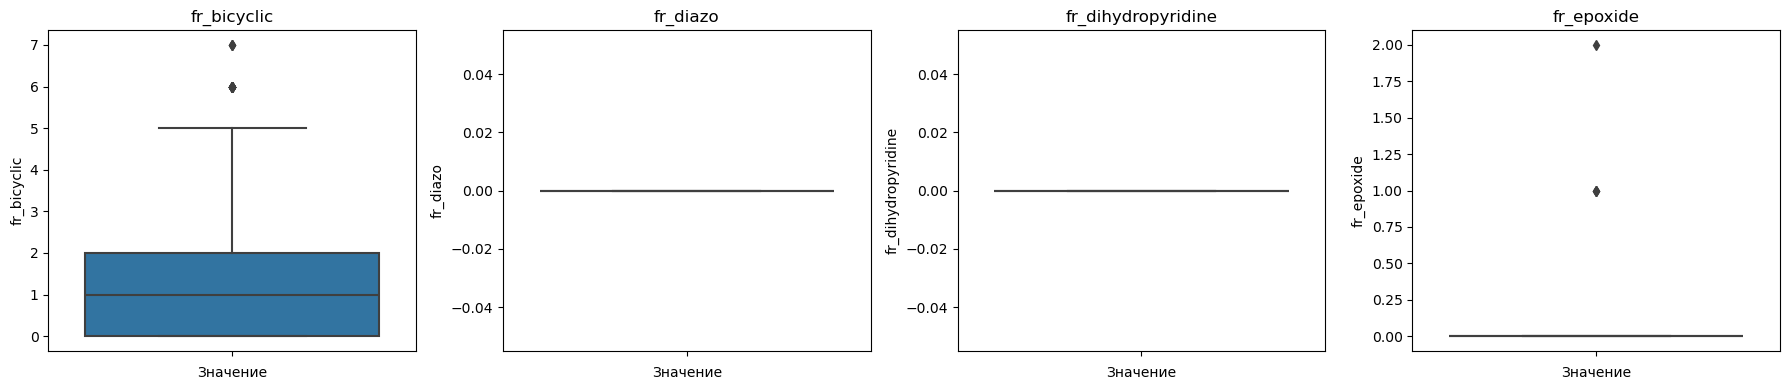

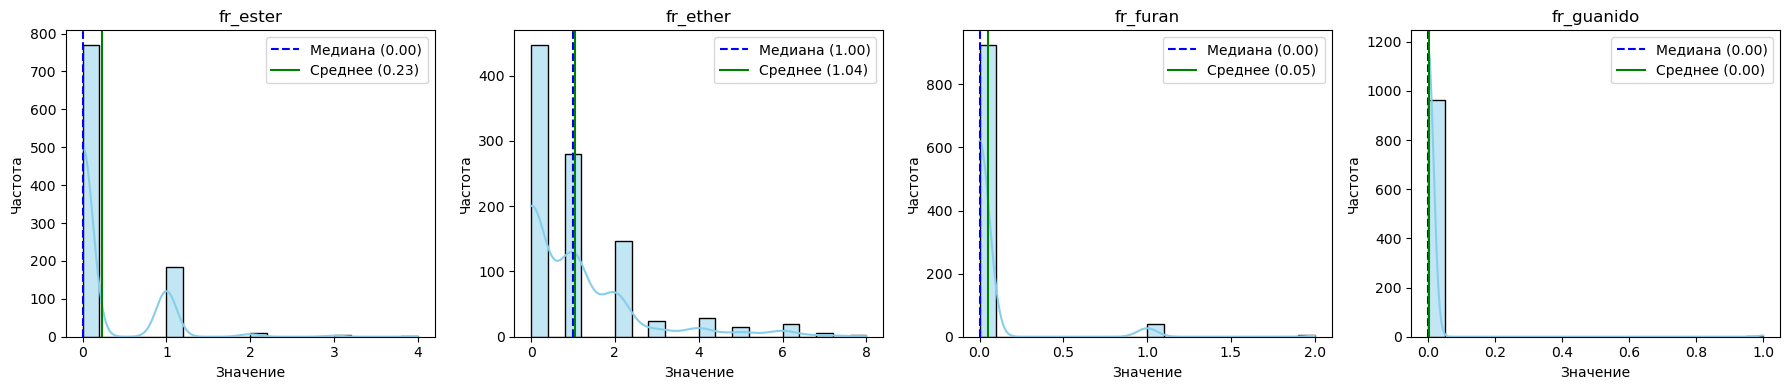

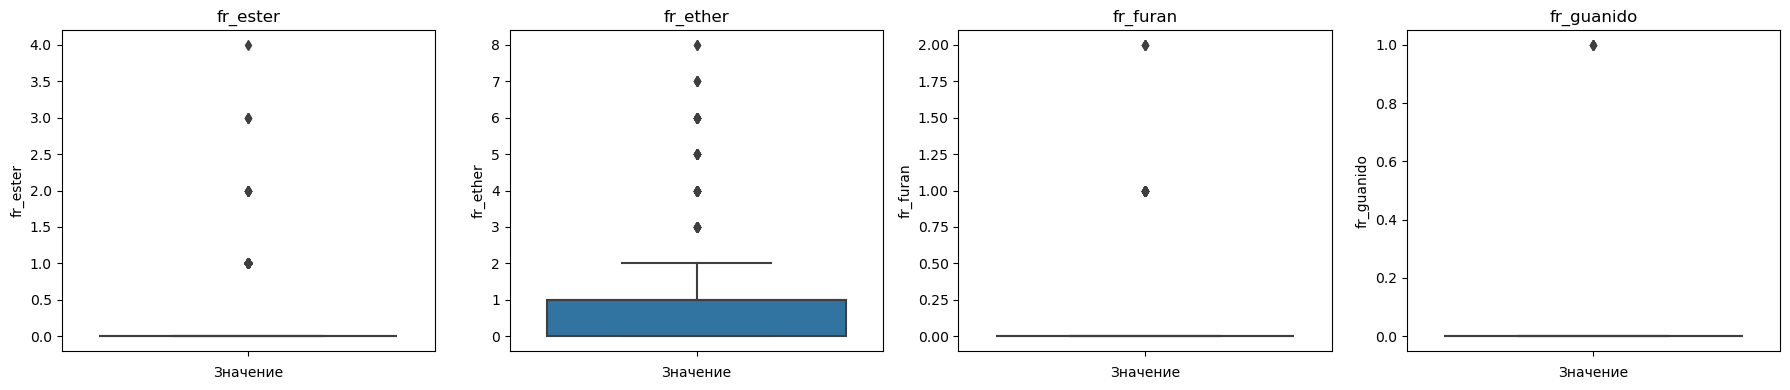

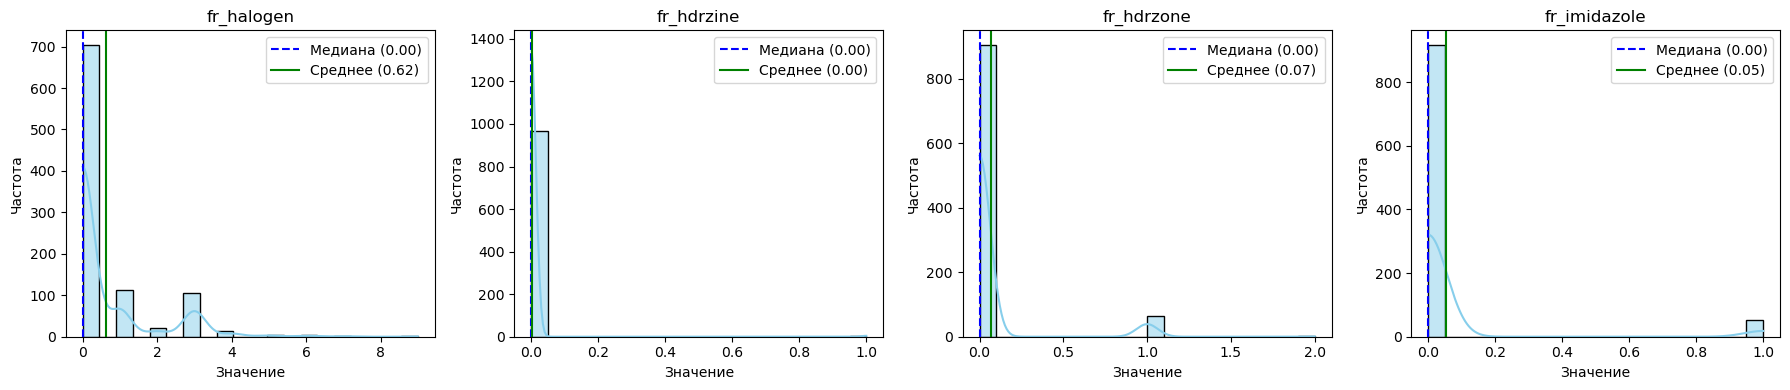

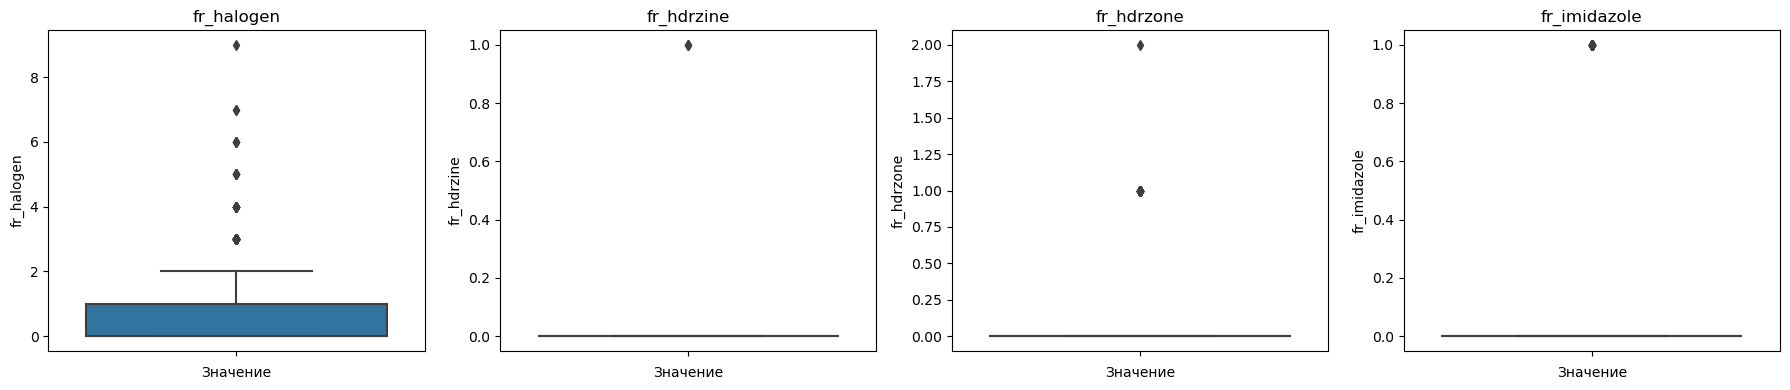

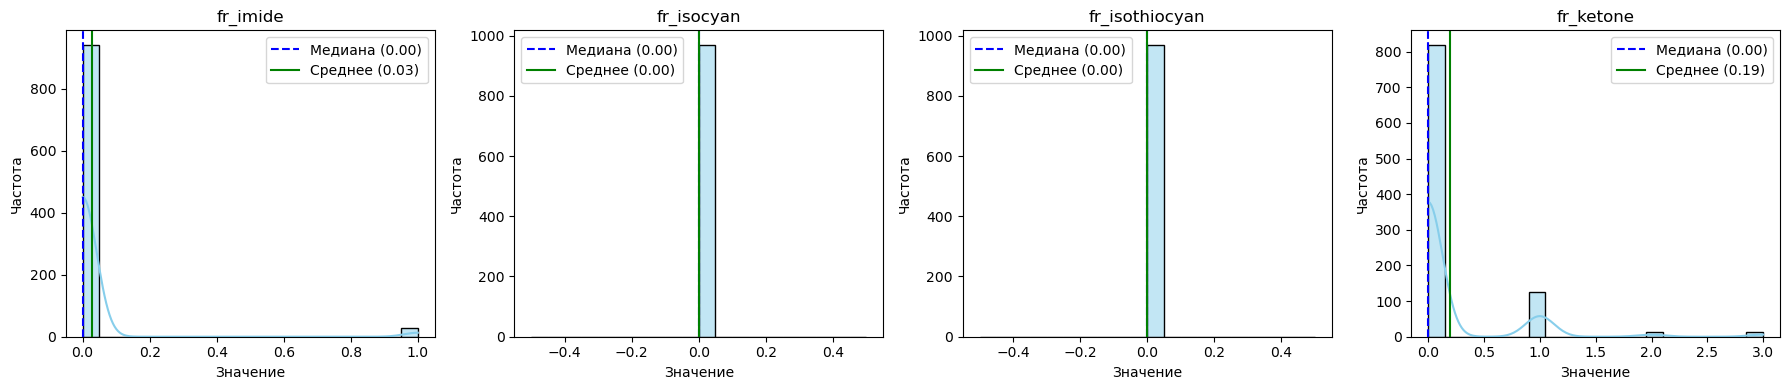

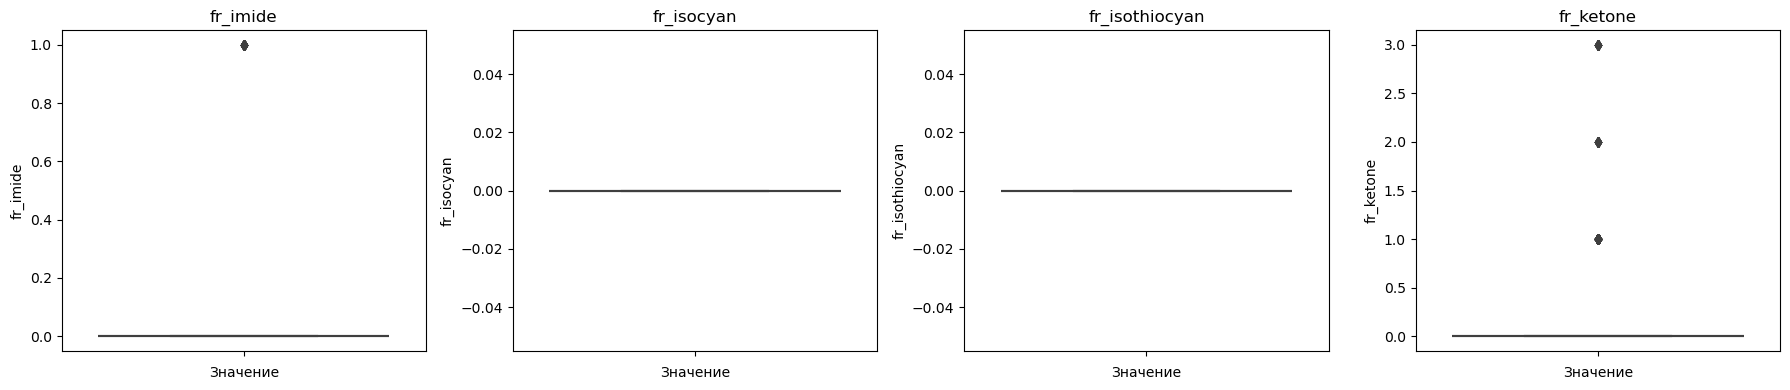

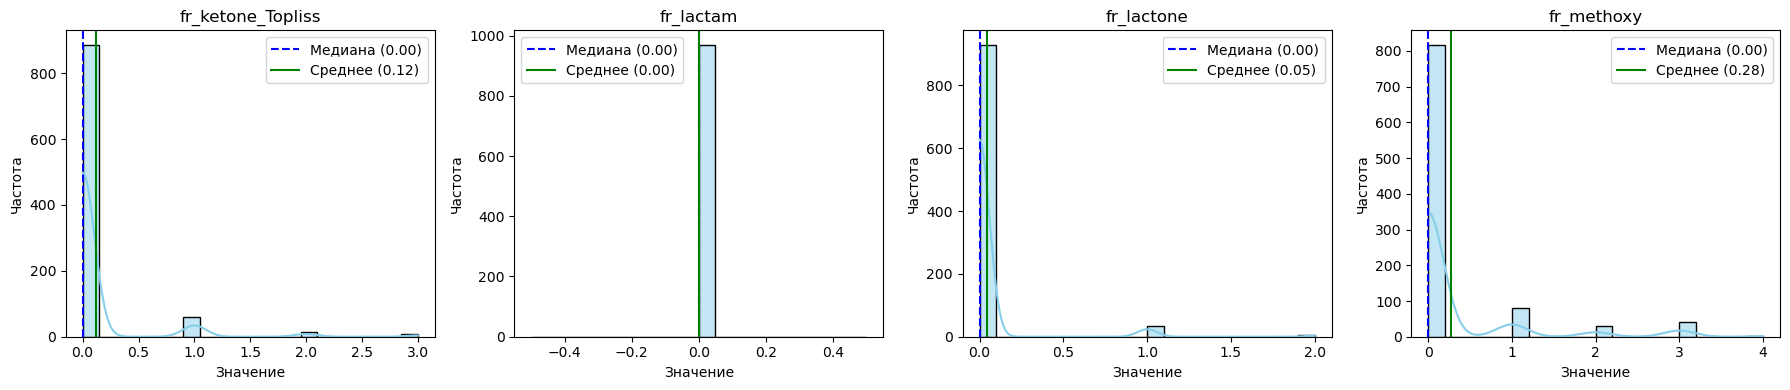

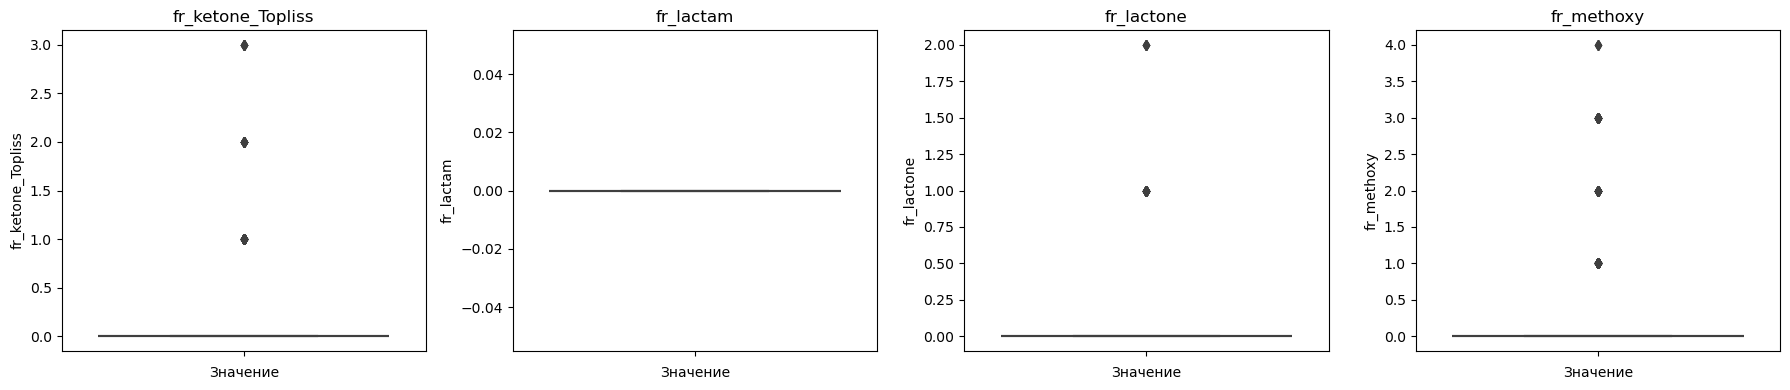

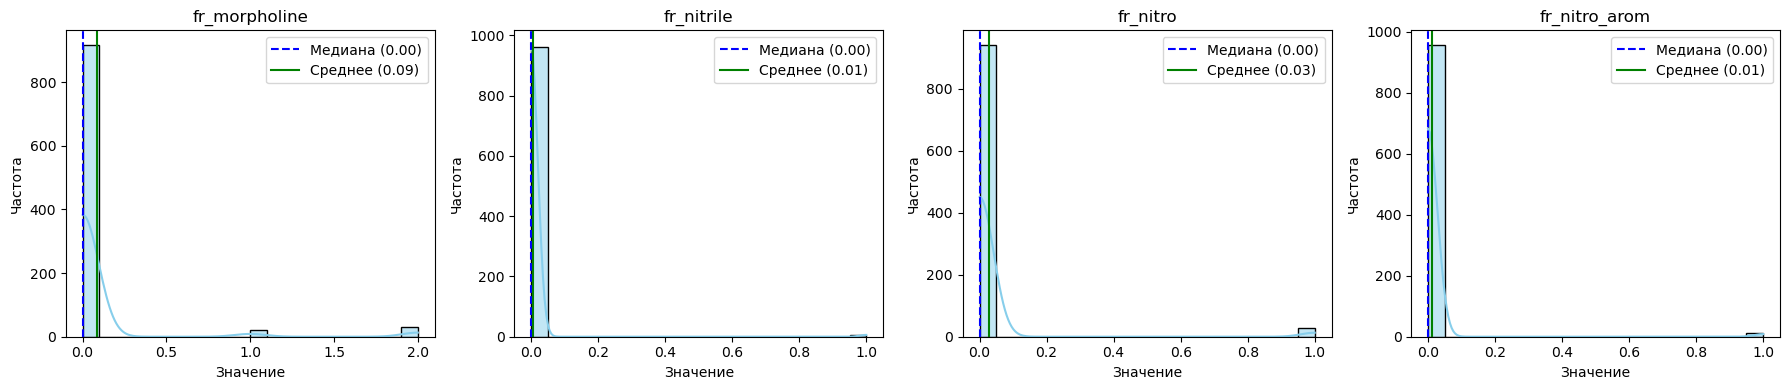

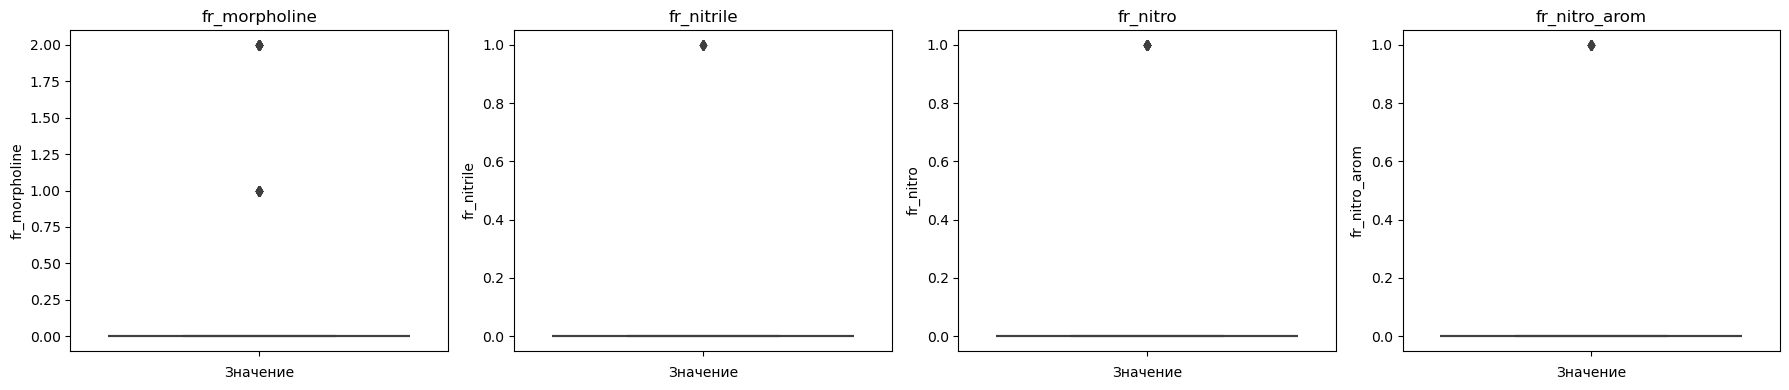

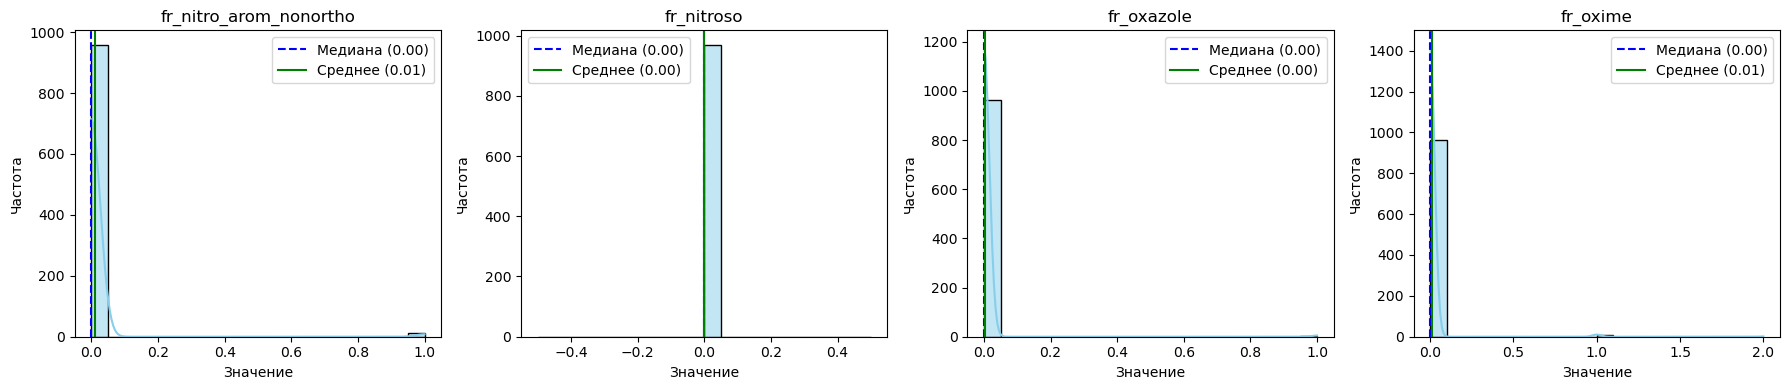

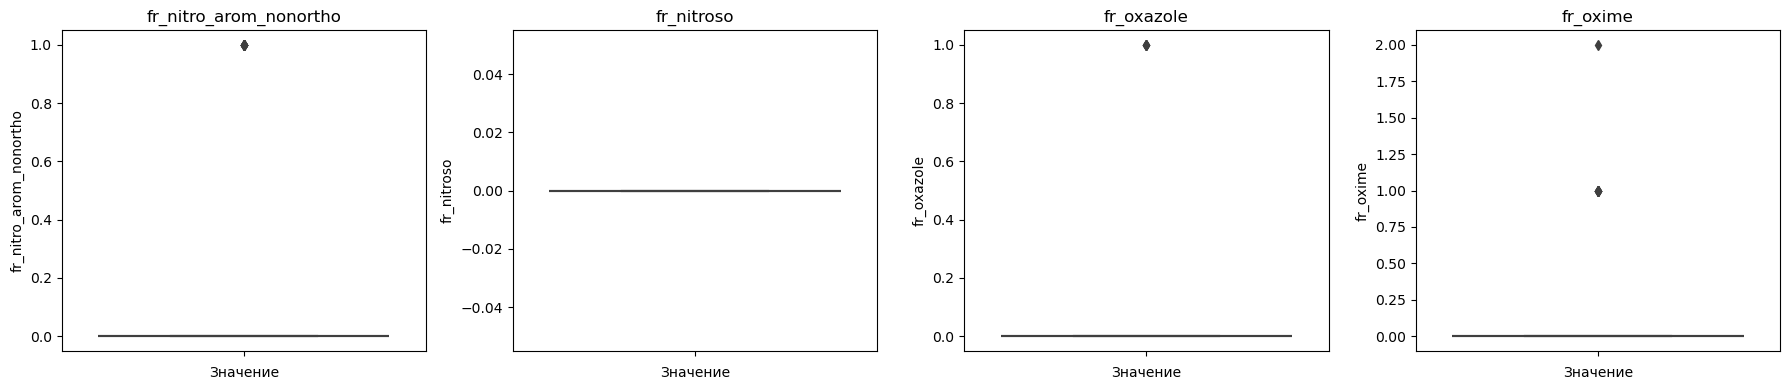

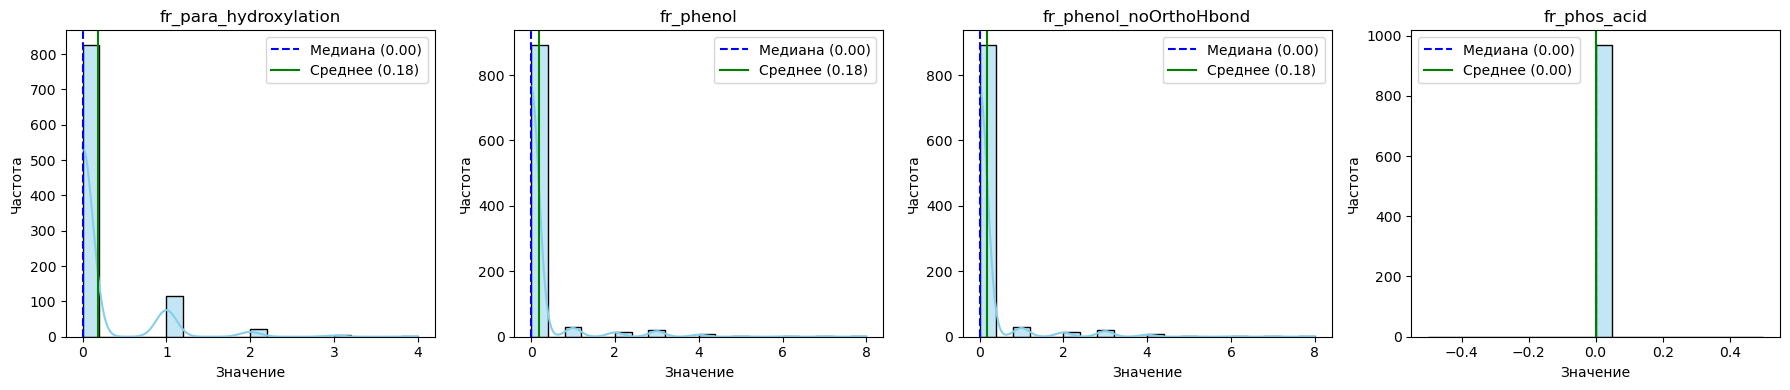

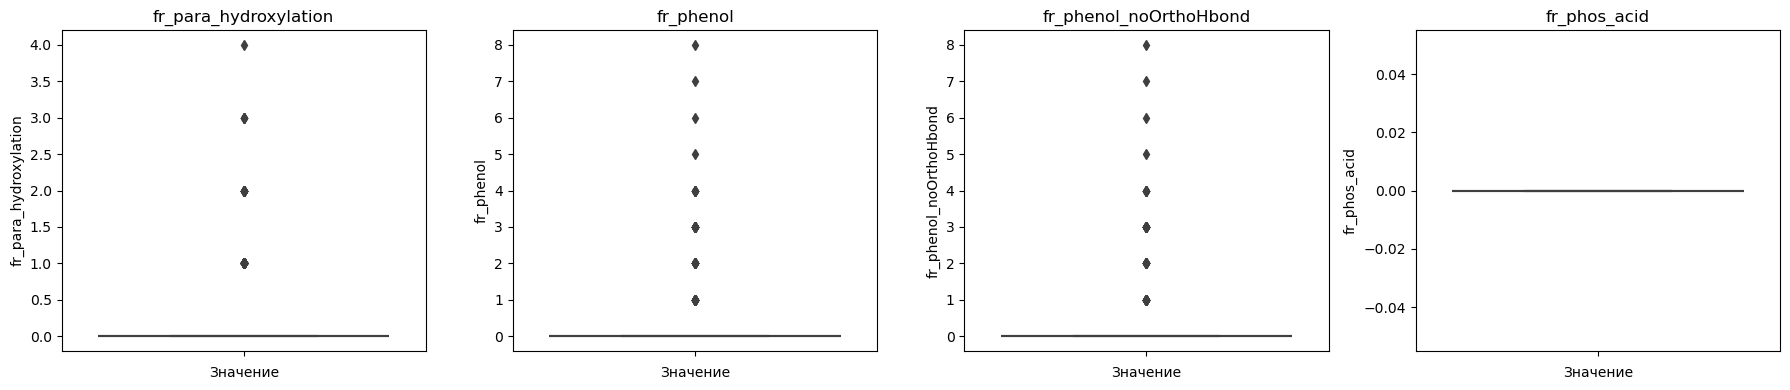

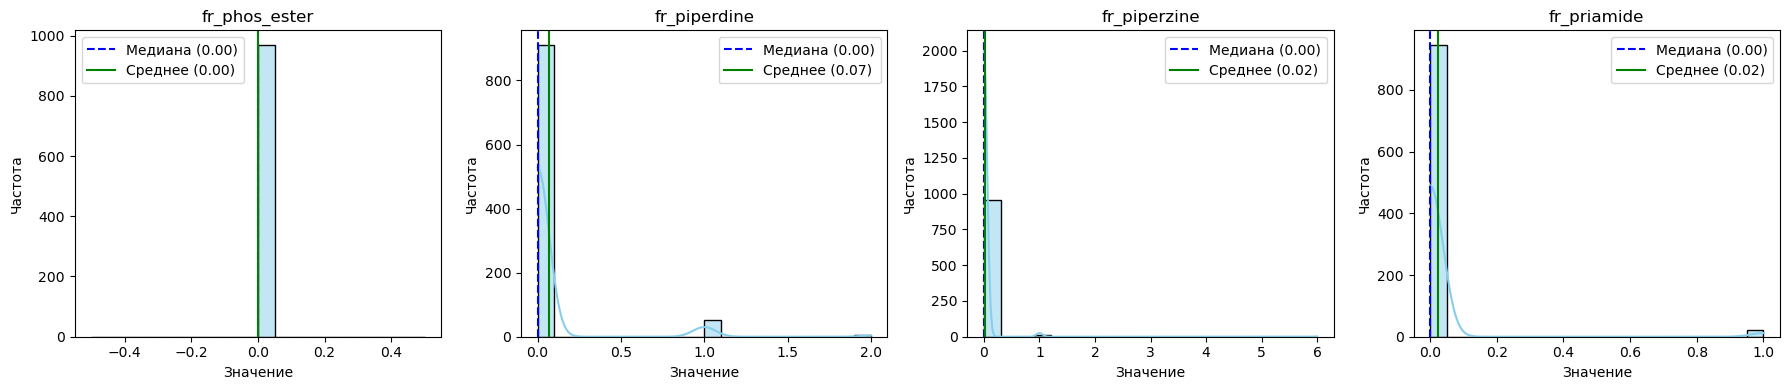

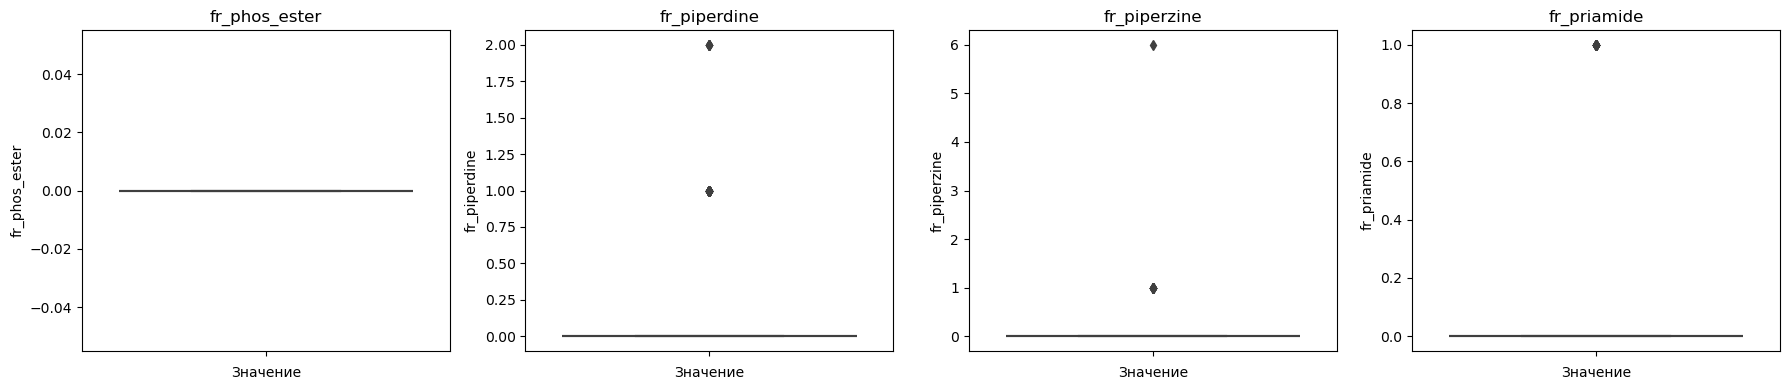

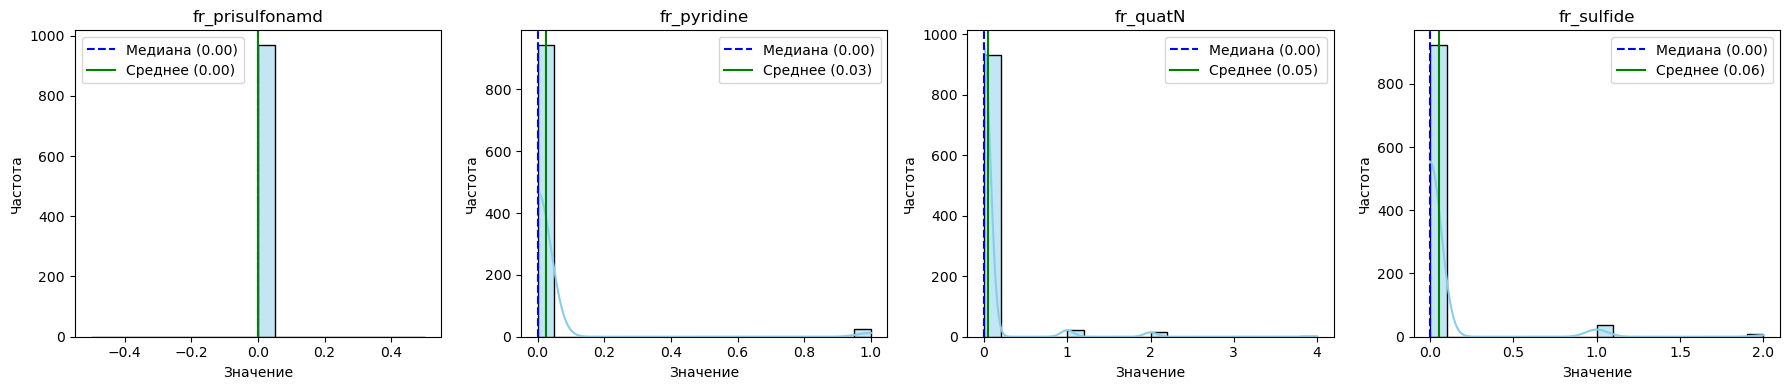

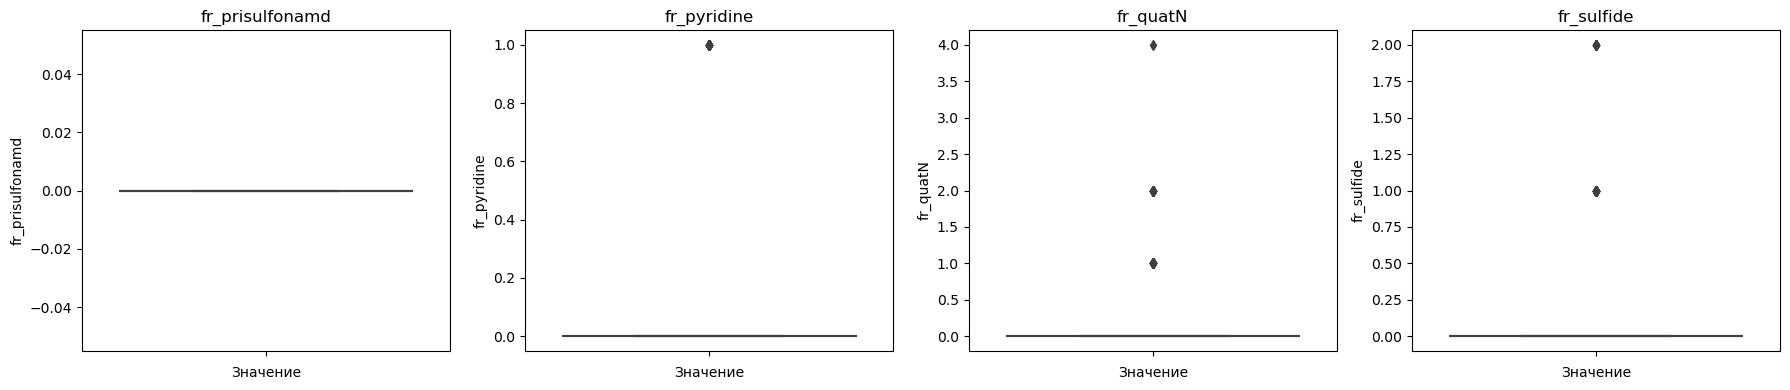

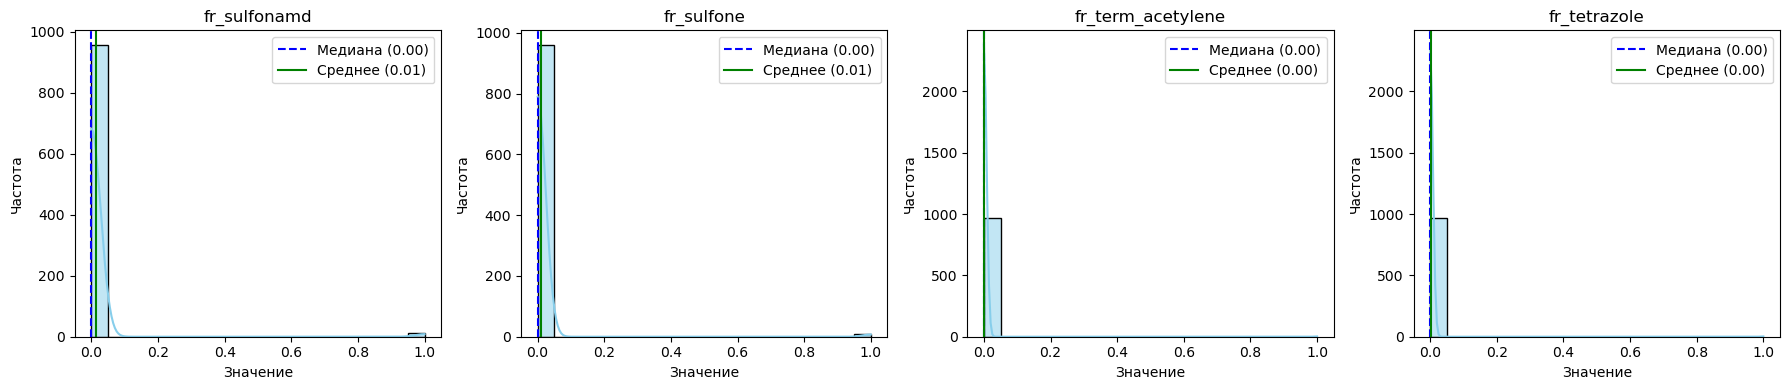

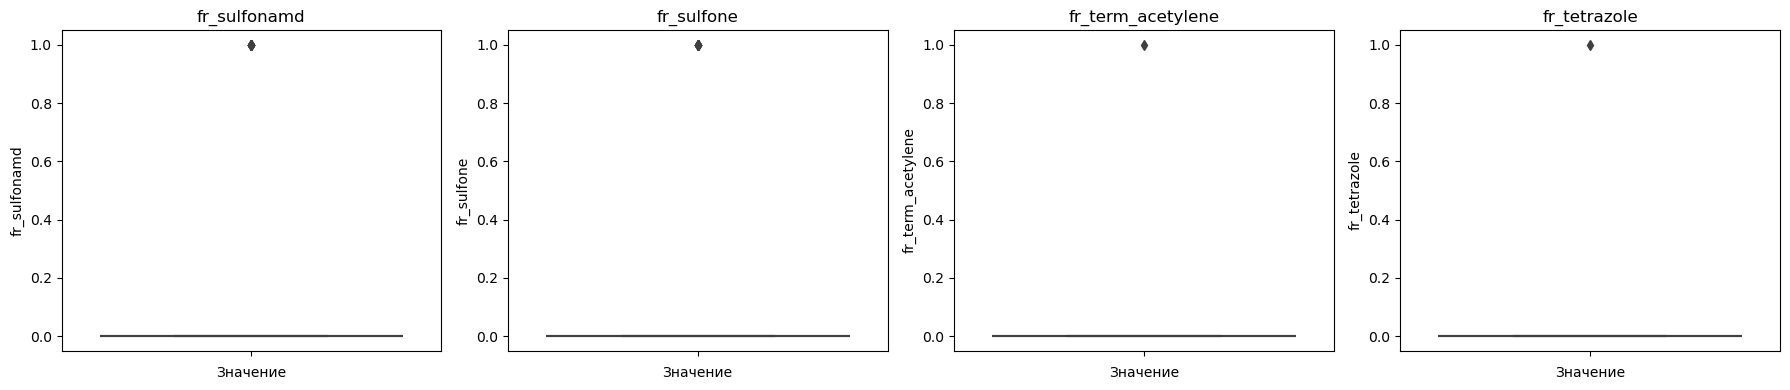

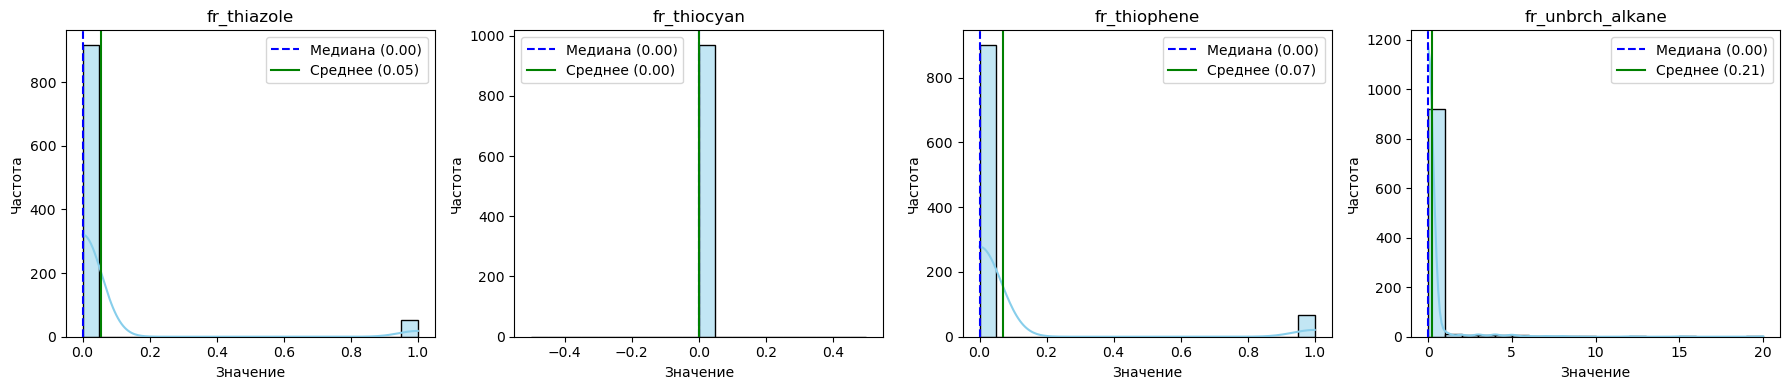

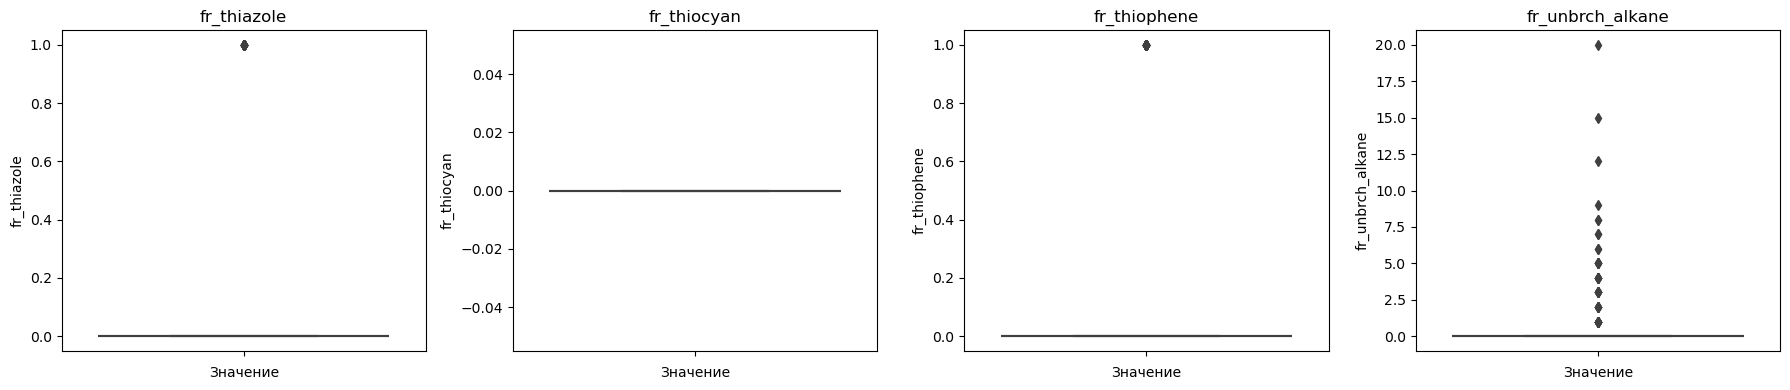

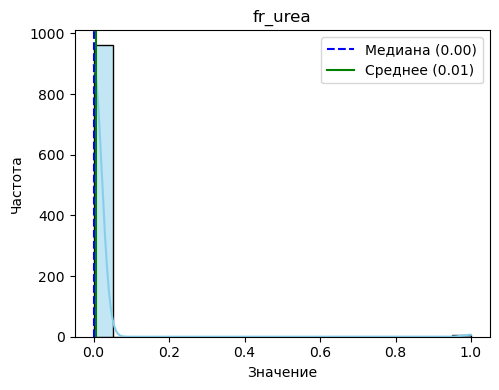

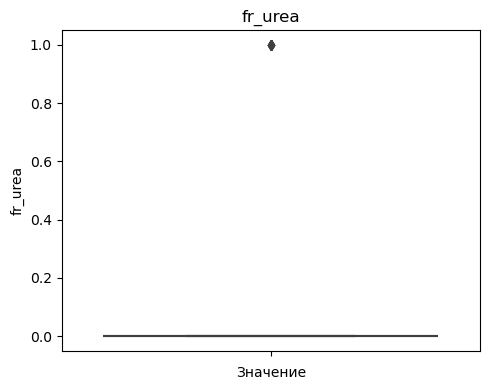

In [440]:
# Функция для построения гистограмм и боксплотов
def plot_graphics(data, cols_per_row=4, graphs_per_page=4):
    columns = data.columns
    total = len(columns)
    start = 0
    
    while start < total:
        end = min(start + graphs_per_page, total)
        current_columns = columns[start:end]
        
        # Число колонок для каждого типа графика
        n_subplots = len(current_columns)
        n_rows = (n_subplots + cols_per_row - 1) // cols_per_row
        
        # Создание сетки для гистограмм
        fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(18, 4*n_rows))
        axes = axes.flatten()
        
        # Рисование гистограмм 
        for i, col in enumerate(current_columns):
            # Гистограмма с KDE
            sns.histplot(data[col], bins=20, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
            
            # Отключаем сетку вручную
            axes[i].grid(False)
            
            # Медиана
            median_val = data[col].median()
            axes[i].axvline(x=median_val, color='blue', linestyle='--', label=f'Медиана ({median_val:.2f})')
            
            # Среднее значение
            mean_val = data[col].mean()
            axes[i].axvline(x=mean_val, color='green', linestyle='-', label=f'Среднее ({mean_val:.2f})')
            
            # Легенда
            axes[i].legend()
            
            # Подписи
            axes[i].set_title(col)
            axes[i].set_xlabel('Значение')
            axes[i].set_ylabel('Частота')
        
        # Убираем лишнюю область
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
        
        # Боксплот-графики
        fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(18, 4*n_rows))
        axes = axes.flatten()
        
        for i, col in enumerate(current_columns):
            # Боксплот
            sns.boxplot(y=data[col], palette=["C0"], ax=axes[i])
            axes[i].set_title(col)
            axes[i].set_xlabel('Значение')
        
        # Убираем лишнюю область
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
        
        start += graphs_per_page

# Строим гистограммы и боксплоты с KDE
plot_graphics(df)

In [441]:
def reduce_multicollinearity(df, target_columns, threshold=0.8):
    '''Функция устранения мультиколлиниарности'''
    # Выберем только числовые признаки, исключая целевые столбцы и столбцы с нулевой дисперсией
    non_target_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=target_columns)
    non_constant_cols = [col for col in non_target_df.columns if non_target_df[col].std() > 1e-5]
    non_target_df = non_target_df[non_constant_cols]

    # Определение матрицы корреляции для нецелевых столбцов
    correlation_matrix = non_target_df.corr(method='pearson')
    
    # Нахождение дублированных столбцов с высоким уровнем корреляции
    high_corr_pairs = []
    for column in correlation_matrix.columns:
        correlated_columns = correlation_matrix[column][(correlation_matrix[column].abs() > threshold) & (correlation_matrix[column].abs() != 1)]
        high_corr_pairs.extend(list(zip([column]*len(correlated_columns), correlated_columns.index)))
    
    # Создание словаря для группировки коррелирующих признаков
    correlated_groups = {}
    for pair in high_corr_pairs:
        first_col, second_col = sorted(pair)
        if first_col not in correlated_groups:
            correlated_groups[first_col] = []
        correlated_groups[first_col].append(second_col)

    # Формирование списка столбцов для удаления (оставляем только один из каждого набора коррелирующих признаков)
    cols_to_remove = set()
    for group in correlated_groups.values():
        if len(group) > 1:
            for col in group[1:]:
                cols_to_remove.add(col)

    # Удаление столбцов с высокой мультиколлинеарностью
    reduced_non_target_df = non_target_df.drop(columns=list(cols_to_remove))

    # Извлечение целевых столбцов и их объединение с обработанными признаками
    target_df = df[target_columns]
    
    final_df = pd.concat([target_df, reduced_non_target_df], axis=1)

    return final_df, list(cols_to_remove)

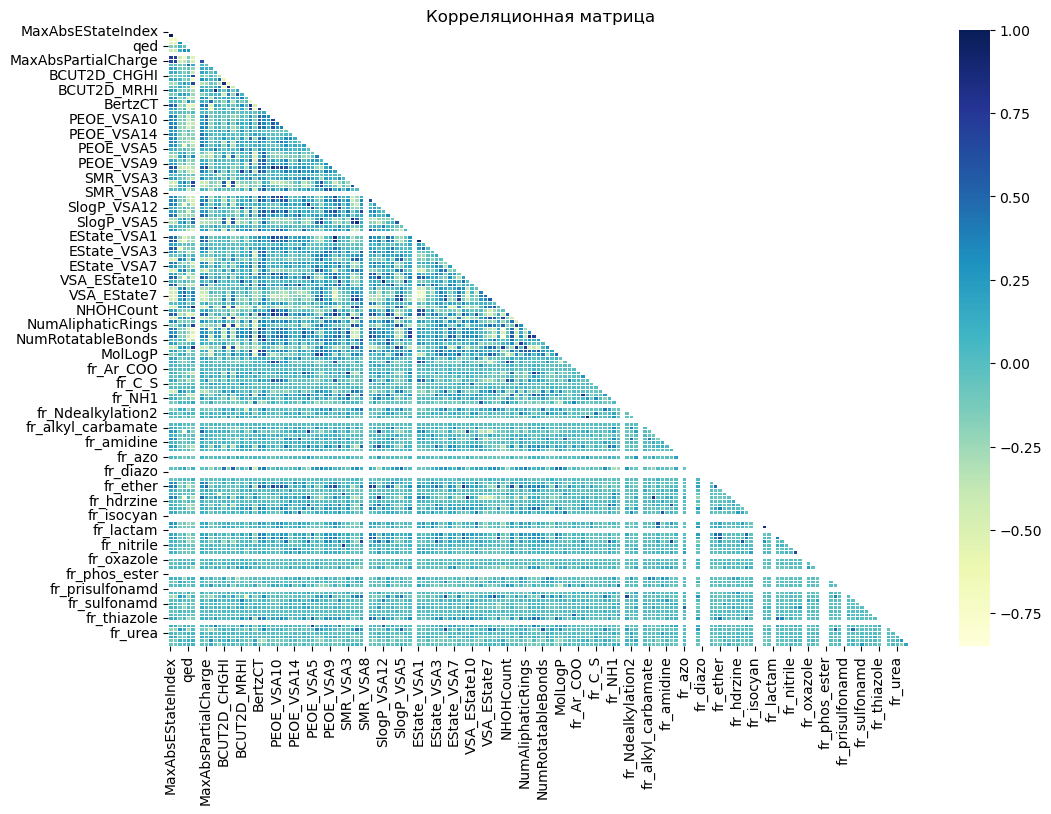

In [442]:
target_columns = ['IC50', 'CC50', 'SI']
reduced_df, removed_cols = reduce_multicollinearity(df, target_columns)

# Визуализация корреляционной матрицы
corr_matrix = final_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=False,
            cmap="YlGnBu",
            linewidths=0.5,
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Корреляционная матрица")
plt.show()

In [443]:
print(f'''Оставшиеся столбцы''')
display(pd.DataFrame({'dtype': reduced_df.dtypes}))

Оставшиеся столбцы


dtype
IC50                      float64
CC50                      float64
SI                        float64
MaxAbsEStateIndex         float64
MaxEStateIndex            float64
MinAbsEStateIndex         float64
MinEStateIndex            float64
qed                       float64
MaxPartialCharge          float64
MaxAbsPartialCharge       float64
FpDensityMorgan1          float64
BCUT2D_MWLOW              float64
BCUT2D_CHGHI              float64
BCUT2D_CHGLO              float64
BCUT2D_MRHI               float64
BCUT2D_MRLOW              float64
AvgIpc                    float64
BalabanJ                  float64
BertzCT                   float64
Ipc                       float64
PEOE_VSA1                 float64
PEOE_VSA10                float64
PEOE_VSA11                float64
PEOE_VSA12                float64
PEOE_VSA13                float64
PEOE_VSA14                float64
PEOE_VSA2                 float64
PEOE_VSA3                 float64
PEOE_VSA4                 float64
PEOE_VSA5                 float64
PEOE_VSA6                 float64
PEOE_VSA7                 float64
PEOE_VSA8                 float64
PEOE_VSA9                 float64
SMR_VSA10                 float64
SMR_VSA2                  float64
SMR_VSA3                  float64
SMR_VSA5                  float64
SMR_VSA6                  float64
SMR_VSA9                  float64
SlogP_VSA1                float64
SlogP_VSA12               float64
SlogP_VSA2                float64
SlogP_VSA3                float64
SlogP_VSA7                float64
SlogP_VSA8                float64
EState_VSA1               float64
EState_VSA11              float64
EState_VSA2               float64
EState_VSA3               float64
EState_VSA4               float64
EState_VSA5               float64
EState_VSA6               float64
EState_VSA7               float64
EState_VSA8               float64
EState_VSA9               float64
VSA_EState1               float64
VSA_EState2               float64
VSA_EState4               float64
VSA_EState5               float64
VSA_EState7               float64
VSA_EState8               float64
VSA_EState9               float64
FractionCSP3              float64
NHOHCount                   int64
NOCount                     int64
NumAliphaticCarbocycles     int64
NumAliphaticHeterocycles    int64
NumAliphaticRings           int64
NumAromaticHeterocycles     int64
NumSaturatedHeterocycles    int64
RingCount                   int64
MolLogP                   float64
fr_Al_COO                   int64
fr_ArN                      int64
fr_Ar_COO                   int64
fr_Ar_NH                    int64
fr_Ar_OH                    int64
fr_C_S                      int64
fr_HOCCN                    int64
fr_Imine                    int64
fr_NH1                      int64
fr_NH2                      int64
fr_Ndealkylation1           int64
fr_Ndealkylation2           int64
fr_Nhpyrrole                int64
fr_aldehyde                 int64
fr_alkyl_carbamate          int64
fr_allylic_oxid             int64
fr_amide                    int64
fr_amidine                  int64
fr_aniline                  int64
fr_aryl_methyl              int64
fr_azo                      int64
fr_bicyclic                 int64
fr_epoxide                  int64
fr_ester                    int64
fr_furan                    int64
fr_guanido                  int64
fr_hdrzine                  int64
fr_hdrzone                  int64
fr_imidazole                int64
fr_imide                    int64
fr_ketone                   int64
fr_lactone                  int64
fr_methoxy                  int64
fr_morpholine               int64
fr_nitrile                  int64
fr_nitro                    int64
fr_nitro_arom               int64
fr_oxazole                  int64
fr_oxime                    int64
fr_para_hydroxylation       int64
fr_piperdine                int64
fr_piperzine                int64
fr_priamide                 int64
fr_pyridine                 int64
fr_quatN        

In [444]:
print(f'''
Удаленные столбцы: {len(removed_cols)}
''')
display(removed_cols)


Удаленные столбцы: 68



['fr_nitro_arom_nonortho',
 'HeavyAtomMolWt',
 'Chi4n',
 'MolWt',
 'fr_C_O',
 'NumHDonors',
 'fr_NH0',
 'fr_ether',
 'fr_phenol_noOrthoHbond',
 'Chi1v',
 'Chi1',
 'Chi0n',
 'BCUT2D_LOGPLOW',
 'fr_Al_OH',
 'Chi0v',
 'MinAbsPartialCharge',
 'fr_COO2',
 'Kappa3',
 'BCUT2D_LOGPHI',
 'fr_C_O_noCOO',
 'Chi0',
 'SlogP_VSA4',
 'Kappa1',
 'MinPartialCharge',
 'VSA_EState10',
 'fr_alkyl_halide',
 'NumHAcceptors',
 'SlogP_VSA6',
 'Chi4v',
 'NumHeteroatoms',
 'ExactMolWt',
 'fr_COO',
 'BCUT2D_MWHI',
 'SlogP_VSA11',
 'NumAromaticRings',
 'Kappa2',
 'SMR_VSA4',
 'fr_halogen',
 'Chi3n',
 'NumAromaticCarbocycles',
 'SPS',
 'fr_benzene',
 'SMR_VSA7',
 'MolMR',
 'EState_VSA10',
 'Chi1n',
 'NumSaturatedCarbocycles',
 'fr_Al_OH_noTert',
 'fr_phenol',
 'NumSaturatedRings',
 'VSA_EState3',
 'FpDensityMorgan3',
 'HallKierAlpha',
 'SlogP_VSA5',
 'fr_Ar_N',
 'HeavyAtomCount',
 'Chi2n',
 'NumValenceElectrons',
 'FpDensityMorgan2',
 'TPSA',
 'SlogP_VSA10',
 'fr_ketone_Topliss',
 'Chi2v',
 'VSA_EState6',
 'Labute

In [445]:
def outliers_free_df(df, col_name):
    '''Функция удаления выбросов и формирования нового датасета'''
    # Определение нижней и верхней границ выбросов
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    # формирование датасета без выбросов
    return df[(df[col_name] >= low) & (df[col_name] <= up)]

def normalize(df, target_col):
    '''Нормализует все признаки с помощью StandardScaler'''
    # Проверка на наличие целевого столбца
    if target_col not in df.columns:
        return None
    features = df.drop(columns=[target_col])
    # Проверка на наличие числовых признаков
    numerical_features = features.select_dtypes(include=['float64', 'int64'])
    if numerical_features.shape[1] == 0:
        return None
    # Нормализация признаков
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(numerical_features)
    # Создание DataFrame из масштабированных данных
    scaled_features = pd.DataFrame(features_scaled, columns=numerical_features.columns, index=df.index)
    # Добавление целевого столбца в начало DataFrame
    scaled_df = pd.concat([df[[target_col]], scaled_features], axis=1)
    return scaled_df


In [446]:
# сформируем нормальизованные датасеты для задач регрессии с отвильтрованными выбросами по целевым колонкам
IC50_df = normalize(outliers_free_df(reduced_df.drop(columns=['CC50', 'SI']), 'IC50'), 'IC50')
CC50_df = normalize(outliers_free_df(reduced_df.drop(columns=['IC50', 'SI']), 'CC50'), 'CC50')
SI_df = normalize(outliers_free_df(reduced_df.drop(columns=['IC50', 'CC50']), 'SI'), 'SI')

display(IC50_df.info())
display(IC50_df.describe(include='all'))

display(CC50_df.info())
display(CC50_df.describe(include='all'))

display(SI_df.info())
display(SI_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 1000
Columns: 125 entries, IC50 to fr_urea
dtypes: float64(125)
memory usage: 818.0 KB


None

IC50  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
count  831.000000       8.310000e+02    8.310000e+02       8.310000e+02   
mean    86.866244       2.394127e-16    2.394127e-16       6.840363e-17   
std    120.939343       1.000602e+00    1.000602e+00       1.000602e+00   
min      0.003517      -2.478460e+00   -2.478460e+00      -1.071683e+00   
25%      9.850098      -5.713316e-01   -5.713316e-01      -7.771689e-01   
50%     31.999934       4.232339e-01    4.232339e-01      -3.521527e-01   
75%    100.228920       7.253109e-01    7.253109e-01       6.629676e-01   
max    555.169536       1.526437e+00    1.526437e+00       6.868189e+00   

       MinEStateIndex           qed  MaxPartialCharge  MaxAbsPartialCharge  \
count      831.000000  8.310000e+02      8.310000e+02         8.310000e+02   
mean         0.000000 -1.132935e-16     -3.420182e-16        -5.814309e-16   
std          1.000602  1.000602e+00      1.000602e+00         1.000602e+00   
min         -4.223210 -2.364576e+00     -1.941911e+00        -4.515627e+00   
25%         -0.296439 -6.002205e-01     -9.565484e-01        -7.312058e-01   
50%          0.291548  2.727153e-01      1.566872e-01         5.404001e-02   
75%          0.699231  7.642254e-01      8.160431e-01         8.675724e-01   
max          1.517105  1.669894e+00      2.701377e+00         4.508278e+00   

       FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  \
count      8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean      -8.550454e-17  1.342421e-15 -2.017907e-15  1.265467e-15   
std        1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min       -3.802704e+00 -1.814852e+01 -3.479724e+00 -2.260143e+00   
25%       -6.987475e-01 -1.744519e-01 -4.949137e-01 -7.487362e-01   
50%        4.582600e-02 -1.311711e-01  1.853793e-01 -3.457556e-02   
75%        7.592967e-01  3.950622e-01  7.322862e-01  6.540880e-01   
max        2.522704e+00  1.547667e+00  2.217178e+00  3.366700e+00   

        BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ       BertzCT  \
count  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean  -4.018713e-16  8.550454e-18 -1.179963e-15  1.026054e-16  1.368073e-16   
std    1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min   -1.484811e+00 -4.022769e+00 -2.401021e+00 -4.099878e+00 -1.482139e+00   
25%   -4.787819e-01 -3.536441e-01 -7.745400e-01 -6.817493e-01 -7.954779e-01   
50%   -3.322478e-01 -1.292351e-01  3.377667e-02  1.586286e-02 -2.300406e-01   
75%    2.036750e-01  5.365301e-01  5.959188e-01  5.073867e-01  5.631990e-01   
max    6.951120e+00  4.893087e+00  2.536727e+00  3.252509e+00  3.311974e+00   

                Ipc     PEOE_VSA1    PEOE_VSA10    PEOE_VSA11    PEOE_VSA12  \
count  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean  -8.550454e-18 -1.368073e-16 -8.550454e-18 -1.197064e-16  6.840363e-17   
std    1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min   -4.145416e-02 -1.134208e+00 -6.620746e-01 -5.620814e-01 -6.188720e-01   
25%   -4.145415e-02 -6.616663e-01 -6.620746e-01 -5.620814e-01 -6.188720e-01   
50%   -4.145407e-02 -2.557550e-01 -2.045538e-01 -5.620814e-01 -6.188720e-01   
75%   -4.144801e-02  2.318746e-01  2.754306e-01  6.231589e-02  4.634243e-01   
max    2.864824e+01  9.434183e+00  8.009863e+00  4.557038e+00  4.787474e+00   

         PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3     PEOE_VSA4  \
count  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean   1.368073e-16 -1.368073e-16 -3.420182e-17 -6.840363e-17  3.420182e-17   
std    1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min   -4.473224e-01 -5.503821e-01 -1.040508e+00 -6.172814e-01 -4.030483e-01   
25%   -4.473224e-01 -5.503821e-01 -1.040508e+00 -6.172814e-01 -4.030483e-01   
50%   -4.473224e-01 -5.503821e-01 -2.189391e-01 -6.172814e-01 -4.030483e-01   
75%   -4.473224e-01  5.024060e-01  

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 1000
Columns: 125 entries, CC50 to fr_urea
dtypes: float64(125)
memory usage: 919.4 KB


None

CC50  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
count   934.000000       9.340000e+02    9.340000e+02       9.340000e+02   
mean    507.054950       2.434408e-16    2.434408e-16      -4.564514e-17   
std     474.104404       1.000536e+00    1.000536e+00       1.000536e+00   
min       0.700808      -2.637475e+00   -2.637475e+00      -1.060245e+00   
25%      99.998889      -2.480436e-01   -2.480436e-01      -7.578161e-01   
50%     365.523350       3.985571e-01    3.985571e-01      -3.319815e-01   
75%     836.936506       6.876204e-01    6.876204e-01       6.624981e-01   
max    2062.987123       1.515532e+00    1.515532e+00       7.216326e+00   

       MinEStateIndex           qed  MaxPartialCharge  MaxAbsPartialCharge  \
count    9.340000e+02  9.340000e+02      9.340000e+02         9.340000e+02   
mean     6.086019e-17 -1.521505e-16      1.217204e-16         1.825806e-16   
std      1.000536e+00  1.000536e+00      1.000536e+00         1.000536e+00   
min     -3.794438e+00 -2.403065e+00     -2.032652e+00        -4.690950e+00   
25%     -2.626044e-01 -6.265828e-01     -8.824884e-01        -7.653500e-01   
50%      3.538257e-01  2.628687e-01      1.239401e-01         2.224496e-01   
75%      6.149499e-01  7.718082e-01      7.536004e-01         8.700241e-01   
max      1.496447e+00  1.711418e+00      2.623126e+00         4.569464e+00   

       FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  \
count      9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean      -2.282257e-16 -8.368276e-16  2.662633e-16  4.716665e-16   
std        1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min       -3.814535e+00 -1.889676e+01 -3.194760e+00 -2.270386e+00   
25%       -6.757696e-01 -2.156741e-01 -5.396854e-01 -7.711675e-01   
50%        3.189184e-02 -1.544711e-01  2.067576e-01 -6.253635e-02   
75%        7.644010e-01  3.805750e-01  7.417651e-01  6.923559e-01   
max        2.498910e+00  1.962508e+00  2.185343e+00  2.927248e+00   

        BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ       BertzCT  \
count  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean  -4.488439e-16 -6.086019e-17  4.450402e-16  4.260213e-16 -1.521505e-17   
std    1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min   -1.511254e+00 -4.124314e+00 -2.440370e+00 -4.069812e+00 -1.527186e+00   
25%   -4.993528e-01 -3.586641e-01 -7.739032e-01 -7.036184e-01 -8.196434e-01   
50%   -3.436703e-01 -1.560475e-01  1.910770e-02 -1.129484e-02 -2.189057e-01   
75%    6.726819e-01  5.299307e-01  6.058957e-01  4.899016e-01  5.490966e-01   
max    7.033644e+00  2.844489e+00  2.581354e+00  4.380275e+00  3.398839e+00   

                Ipc     PEOE_VSA1    PEOE_VSA10    PEOE_VSA11    PEOE_VSA12  \
count  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean  -3.803762e-18  9.129029e-17 -8.368276e-17 -7.607524e-18 -6.846772e-17   
std    1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min   -3.984782e-02 -1.101385e+00 -6.488930e-01 -5.725991e-01 -6.333412e-01   
25%   -3.984780e-02 -6.405366e-01 -6.488930e-01 -5.725991e-01 -6.333412e-01   
50%   -3.984772e-02 -2.507223e-01 -2.055349e-01 -5.725991e-01 -6.333412e-01   
75%   -3.984262e-02  1.874050e-01  2.567554e-01  6.263513e-02  4.236754e-01   
max    3.036973e+01  9.007331e+00  7.754600e+00  4.635366e+00  4.646726e+00   

         PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3     PEOE_VSA4  \
count  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean   3.043010e-17 -8.368276e-17 -1.217204e-16 -9.129029e-17 -9.129029e-17   
std    1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min   -4.514426e-01 -4.692186e-01 -1.023651e+00 -6.076888e-01 -4.455975e-01   
25%   -4.514426e-01 -4.692186e-01 -1.023651e+00 -6.076888e-01 -4.455975e-01   
50%   -4.514426e-01 -4.692186e-01 -2.237446e-01 -6.076888e-01 -4.455975e-01   
75%   -4.514426e-01  3.3293

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 1000
Columns: 125 entries, SI to fr_urea
dtypes: float64(125)
memory usage: 835.7 KB


None

SI  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
count  849.000000       8.490000e+02    8.490000e+02       8.490000e+02   
mean     7.096615       4.184586e-16    4.184586e-16      -7.532255e-17   
std      8.789019       1.000589e+00    1.000589e+00       1.000589e+00   
min      0.011489      -2.663831e+00   -2.663831e+00      -1.044474e+00   
25%      1.218182      -2.406958e-01   -2.406958e-01      -7.416274e-01   
50%      3.070681       3.948869e-01    3.948869e-01      -3.383490e-01   
75%      8.853373       6.775611e-01    6.775611e-01       6.258667e-01   
max     38.168094       1.502671e+00    1.502671e+00       6.946701e+00   

       MinEStateIndex           qed  MaxPartialCharge  MaxAbsPartialCharge  \
count      849.000000  8.490000e+02      8.490000e+02         8.490000e+02   
mean         0.000000 -2.929210e-16      1.673834e-16         4.351970e-16   
std          1.000589  1.000589e+00      1.000589e+00         1.000589e+00   
min         -3.769397 -2.399962e+00     -2.024637e+00        -4.638485e+00   
25%         -0.225807 -6.065361e-01     -8.739129e-01        -7.592681e-01   
50%          0.318519  2.705482e-01      1.232603e-01         2.459629e-01   
75%          0.611730  7.755914e-01      7.695025e-01         8.567986e-01   
max          1.490304  1.753765e+00      2.601501e+00         4.512513e+00   

       FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  \
count      8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean      -2.510752e-17 -1.322329e-15  9.038706e-16 -1.958386e-15   
std        1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min       -3.823440e+00 -2.160751e+00 -3.825370e+00 -2.213838e+00   
25%       -7.198007e-01 -5.481614e-01 -5.591295e-01 -7.844714e-01   
50%        2.706442e-02 -2.506672e-01  2.208852e-01 -5.434206e-02   
75%        8.237205e-01  7.561758e-01  7.377539e-01  6.712415e-01   
max        2.566406e+00  3.745387e+00  2.133485e+00  3.668355e+00   

        BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ       BertzCT  \
count  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean   5.021503e-17  4.184586e-18 -6.946413e-16 -8.369172e-17 -2.510752e-17   
std    1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min   -1.495294e+00 -4.060053e+00 -2.444395e+00 -4.167356e+00 -1.524887e+00   
25%   -4.978046e-01 -3.847369e-01 -7.538425e-01 -7.008805e-01 -8.126567e-01   
50%   -3.456623e-01 -1.803185e-01  2.842184e-02 -4.872951e-03 -2.008428e-01   
75%    6.790718e-01  5.161974e-01  5.850981e-01  5.136450e-01  5.652247e-01   
max    6.917941e+00  4.971176e+00  2.546988e+00  4.518064e+00  3.333123e+00   

                Ipc   PEOE_VSA1  PEOE_VSA10    PEOE_VSA11    PEOE_VSA12  \
count  8.490000e+02  849.000000  849.000000  8.490000e+02  8.490000e+02   
mean   6.276879e-18    0.000000    0.000000 -3.347669e-17  1.087992e-16   
std    1.000589e+00    1.000589    1.000589  1.000589e+00  1.000589e+00   
min   -4.138119e-02   -1.081809   -0.662635 -5.923961e-01 -6.248212e-01   
25%   -4.138117e-02   -0.634517   -0.662635 -5.923961e-01 -6.248212e-01   
50%   -4.138106e-02   -0.239986   -0.226371 -5.923961e-01 -6.248212e-01   
75%   -4.137518e-02    0.176207    0.230661  5.469511e-02  4.178348e-01   
max    2.895409e+01    8.921867    7.526457  4.712779e+00  4.583511e+00   

         PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3     PEOE_VSA4  \
count  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean   3.347669e-17 -1.171684e-16  8.369172e-17 -2.510752e-17  1.673834e-17   
std    1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min   -4.646918e-01 -5.084235e-01 -1.029258e+00 -5.927109e-01 -4.555702e-01   
25%   -4.646918e-01 -5.084235e-01 -1.029258e+00 -5.927109e-01 -4.555702e-01   
50%   -4.646918e-01 -5.084235e-01 -2.402164e-01 -5.927109e-01 -4.555702e-01   
75%   -4.646918e-01  3.763767e-01  5.488249e-01  3.469951e-01 -4.555702e-

In [447]:
# Формирование датасетов для задач классификации

IC50_median = IC50_df.IC50.median()
CC50_median = CC50_df.CC50.median()
SI_median = SI_df.SI.median()
SI_8 = 8
print(f'''
Медианное значение IC50: {IC50_median:.2f}
Медианное значение CC50: {CC50_median:.2f}
Медианное значение SI: {SI_median:.2f}
SI_8: {SI_8}
''')

def create_df_for_classification(base_df, field_name, threshold):
    '''Функция создает датасет на базе уже подготовленного датасета и добавляет бинарный признак превышения порога'''
    # клонируем базовый датафрейм
    result_df = base_df.copy()
    # слоздаем новый признок и выносим его в начало
    result_df['threshold_exceeded'] = (result_df[field_name] > threshold).astype(int)    
    result_df = result_df[['threshold_exceeded'] + [col for col in result_df.columns if col != 'threshold_exceeded']]
    # удаляем предыдущий неисполльзуемый таргет
    result_df = result_df.drop([field_name], axis=1)
    display(result_df.info())
    display(result_df.describe(include='all'))
    return result_df

print(f'''
------------------------------------------------------ IC50 > median ------------------------------------------------------
''')
IC50_median_df = create_df_for_classification(IC50_df, 'IC50', IC50_median)
print(f'''
------------------------------------------------------ CC50 > median ------------------------------------------------------
''')
CC50_median_df = create_df_for_classification(CC50_df, 'CC50', CC50_median)
print(f'''
------------------------------------------------------ SI > median ------------------------------------------------------
''')
SI_median_df = create_df_for_classification(SI_df, 'SI', SI_median)
print(f'''
------------------------------------------------------ SI > 8 ------------------------------------------------------
''')
SI_8_df = create_df_for_classification(SI_df, 'SI', SI_8)



Медианное значение IC50: 32.00
Медианное значение CC50: 365.52
Медианное значение SI: 3.07
SI_8: 8


------------------------------------------------------ IC50 > median ------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 1000
Columns: 125 entries, threshold_exceeded to fr_urea
dtypes: float64(124), int64(1)
memory usage: 818.0 KB


None

threshold_exceeded  MaxAbsEStateIndex  MaxEStateIndex  \
count          831.000000       8.310000e+02    8.310000e+02   
mean             0.499398       2.394127e-16    2.394127e-16   
std              0.500301       1.000602e+00    1.000602e+00   
min              0.000000      -2.478460e+00   -2.478460e+00   
25%              0.000000      -5.713316e-01   -5.713316e-01   
50%              0.000000       4.232339e-01    4.232339e-01   
75%              1.000000       7.253109e-01    7.253109e-01   
max              1.000000       1.526437e+00    1.526437e+00   

       MinAbsEStateIndex  MinEStateIndex           qed  MaxPartialCharge  \
count       8.310000e+02      831.000000  8.310000e+02      8.310000e+02   
mean        6.840363e-17        0.000000 -1.132935e-16     -3.420182e-16   
std         1.000602e+00        1.000602  1.000602e+00      1.000602e+00   
min        -1.071683e+00       -4.223210 -2.364576e+00     -1.941911e+00   
25%        -7.771689e-01       -0.296439 -6.002205e-01     -9.565484e-01   
50%        -3.521527e-01        0.291548  2.727153e-01      1.566872e-01   
75%         6.629676e-01        0.699231  7.642254e-01      8.160431e-01   
max         6.868189e+00        1.517105  1.669894e+00      2.701377e+00   

       MaxAbsPartialCharge  FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  \
count         8.310000e+02      8.310000e+02  8.310000e+02  8.310000e+02   
mean         -5.814309e-16     -8.550454e-17  1.342421e-15 -2.017907e-15   
std           1.000602e+00      1.000602e+00  1.000602e+00  1.000602e+00   
min          -4.515627e+00     -3.802704e+00 -1.814852e+01 -3.479724e+00   
25%          -7.312058e-01     -6.987475e-01 -1.744519e-01 -4.949137e-01   
50%           5.404001e-02      4.582600e-02 -1.311711e-01  1.853793e-01   
75%           8.675724e-01      7.592967e-01  3.950622e-01  7.322862e-01   
max           4.508278e+00      2.522704e+00  1.547667e+00  2.217178e+00   

       BCUT2D_CHGLO   BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ  \
count  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean   1.265467e-15 -4.018713e-16  8.550454e-18 -1.179963e-15  1.026054e-16   
std    1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min   -2.260143e+00 -1.484811e+00 -4.022769e+00 -2.401021e+00 -4.099878e+00   
25%   -7.487362e-01 -4.787819e-01 -3.536441e-01 -7.745400e-01 -6.817493e-01   
50%   -3.457556e-02 -3.322478e-01 -1.292351e-01  3.377667e-02  1.586286e-02   
75%    6.540880e-01  2.036750e-01  5.365301e-01  5.959188e-01  5.073867e-01   
max    3.366700e+00  6.951120e+00  4.893087e+00  2.536727e+00  3.252509e+00   

            BertzCT           Ipc     PEOE_VSA1    PEOE_VSA10    PEOE_VSA11  \
count  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean   1.368073e-16 -8.550454e-18 -1.368073e-16 -8.550454e-18 -1.197064e-16   
std    1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min   -1.482139e+00 -4.145416e-02 -1.134208e+00 -6.620746e-01 -5.620814e-01   
25%   -7.954779e-01 -4.145415e-02 -6.616663e-01 -6.620746e-01 -5.620814e-01   
50%   -2.300406e-01 -4.145407e-02 -2.557550e-01 -2.045538e-01 -5.620814e-01   
75%    5.631990e-01 -4.144801e-02  2.318746e-01  2.754306e-01  6.231589e-02   
max    3.311974e+00  2.864824e+01  9.434183e+00  8.009863e+00  4.557038e+00   

         PEOE_VSA12    PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3  \
count  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02  8.310000e+02   
mean   6.840363e-17  1.368073e-16 -1.368073e-16 -3.420182e-17 -6.840363e-17   
std    1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00  1.000602e+00   
min   -6.188720e-01 -4.473224e-01 -5.503821e-01 -1.040508e+00 -6.172814e-01   
25%   -6.188720e-01 -4.473224e-01 -5.503821e-01 -1.040508e+00 -6.172814e-01   
50%   -6.188720e-01 -4.473224e-01 -5.503821e-01 -2.189391e-01 -6.172814e-01   
75%    4.634243e-01 -4.473224e-01  5.024060e-01  6.026297e-01  3.411987e-01   
max 


------------------------------------------------------ CC50 > median ------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 1000
Columns: 125 entries, threshold_exceeded to fr_urea
dtypes: float64(124), int64(1)
memory usage: 919.4 KB


None

threshold_exceeded  MaxAbsEStateIndex  MaxEStateIndex  \
count          934.000000       9.340000e+02    9.340000e+02   
mean             0.500000       2.434408e-16    2.434408e-16   
std              0.500268       1.000536e+00    1.000536e+00   
min              0.000000      -2.637475e+00   -2.637475e+00   
25%              0.000000      -2.480436e-01   -2.480436e-01   
50%              0.500000       3.985571e-01    3.985571e-01   
75%              1.000000       6.876204e-01    6.876204e-01   
max              1.000000       1.515532e+00    1.515532e+00   

       MinAbsEStateIndex  MinEStateIndex           qed  MaxPartialCharge  \
count       9.340000e+02    9.340000e+02  9.340000e+02      9.340000e+02   
mean       -4.564514e-17    6.086019e-17 -1.521505e-16      1.217204e-16   
std         1.000536e+00    1.000536e+00  1.000536e+00      1.000536e+00   
min        -1.060245e+00   -3.794438e+00 -2.403065e+00     -2.032652e+00   
25%        -7.578161e-01   -2.626044e-01 -6.265828e-01     -8.824884e-01   
50%        -3.319815e-01    3.538257e-01  2.628687e-01      1.239401e-01   
75%         6.624981e-01    6.149499e-01  7.718082e-01      7.536004e-01   
max         7.216326e+00    1.496447e+00  1.711418e+00      2.623126e+00   

       MaxAbsPartialCharge  FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  \
count         9.340000e+02      9.340000e+02  9.340000e+02  9.340000e+02   
mean          1.825806e-16     -2.282257e-16 -8.368276e-16  2.662633e-16   
std           1.000536e+00      1.000536e+00  1.000536e+00  1.000536e+00   
min          -4.690950e+00     -3.814535e+00 -1.889676e+01 -3.194760e+00   
25%          -7.653500e-01     -6.757696e-01 -2.156741e-01 -5.396854e-01   
50%           2.224496e-01      3.189184e-02 -1.544711e-01  2.067576e-01   
75%           8.700241e-01      7.644010e-01  3.805750e-01  7.417651e-01   
max           4.569464e+00      2.498910e+00  1.962508e+00  2.185343e+00   

       BCUT2D_CHGLO   BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ  \
count  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean   4.716665e-16 -4.488439e-16 -6.086019e-17  4.450402e-16  4.260213e-16   
std    1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min   -2.270386e+00 -1.511254e+00 -4.124314e+00 -2.440370e+00 -4.069812e+00   
25%   -7.711675e-01 -4.993528e-01 -3.586641e-01 -7.739032e-01 -7.036184e-01   
50%   -6.253635e-02 -3.436703e-01 -1.560475e-01  1.910770e-02 -1.129484e-02   
75%    6.923559e-01  6.726819e-01  5.299307e-01  6.058957e-01  4.899016e-01   
max    2.927248e+00  7.033644e+00  2.844489e+00  2.581354e+00  4.380275e+00   

            BertzCT           Ipc     PEOE_VSA1    PEOE_VSA10    PEOE_VSA11  \
count  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean  -1.521505e-17 -3.803762e-18  9.129029e-17 -8.368276e-17 -7.607524e-18   
std    1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min   -1.527186e+00 -3.984782e-02 -1.101385e+00 -6.488930e-01 -5.725991e-01   
25%   -8.196434e-01 -3.984780e-02 -6.405366e-01 -6.488930e-01 -5.725991e-01   
50%   -2.189057e-01 -3.984772e-02 -2.507223e-01 -2.055349e-01 -5.725991e-01   
75%    5.490966e-01 -3.984262e-02  1.874050e-01  2.567554e-01  6.263513e-02   
max    3.398839e+00  3.036973e+01  9.007331e+00  7.754600e+00  4.635366e+00   

         PEOE_VSA12    PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3  \
count  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02  9.340000e+02   
mean  -6.846772e-17  3.043010e-17 -8.368276e-17 -1.217204e-16 -9.129029e-17   
std    1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00  1.000536e+00   
min   -6.333412e-01 -4.514426e-01 -4.692186e-01 -1.023651e+00 -6.076888e-01   
25%   -6.333412e-01 -4.514426e-01 -4.692186e-01 -1.023651e+00 -6.076888e-01   
50%   -6.333412e-01 -4.514426e-01 -4.692186e-01 -2.237446e-01 -6.076888e-01   
75%    4.236754e-01 -4.514426e-01  3.329369e-01  5.761620e-01  3.474446e-01   
max 


------------------------------------------------------ SI > median ------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 1000
Columns: 125 entries, threshold_exceeded to fr_urea
dtypes: float64(124), int64(1)
memory usage: 835.7 KB


None

threshold_exceeded  MaxAbsEStateIndex  MaxEStateIndex  \
count          849.000000       8.490000e+02    8.490000e+02   
mean             0.499411       4.184586e-16    4.184586e-16   
std              0.500294       1.000589e+00    1.000589e+00   
min              0.000000      -2.663831e+00   -2.663831e+00   
25%              0.000000      -2.406958e-01   -2.406958e-01   
50%              0.000000       3.948869e-01    3.948869e-01   
75%              1.000000       6.775611e-01    6.775611e-01   
max              1.000000       1.502671e+00    1.502671e+00   

       MinAbsEStateIndex  MinEStateIndex           qed  MaxPartialCharge  \
count       8.490000e+02      849.000000  8.490000e+02      8.490000e+02   
mean       -7.532255e-17        0.000000 -2.929210e-16      1.673834e-16   
std         1.000589e+00        1.000589  1.000589e+00      1.000589e+00   
min        -1.044474e+00       -3.769397 -2.399962e+00     -2.024637e+00   
25%        -7.416274e-01       -0.225807 -6.065361e-01     -8.739129e-01   
50%        -3.383490e-01        0.318519  2.705482e-01      1.232603e-01   
75%         6.258667e-01        0.611730  7.755914e-01      7.695025e-01   
max         6.946701e+00        1.490304  1.753765e+00      2.601501e+00   

       MaxAbsPartialCharge  FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  \
count         8.490000e+02      8.490000e+02  8.490000e+02  8.490000e+02   
mean          4.351970e-16     -2.510752e-17 -1.322329e-15  9.038706e-16   
std           1.000589e+00      1.000589e+00  1.000589e+00  1.000589e+00   
min          -4.638485e+00     -3.823440e+00 -2.160751e+00 -3.825370e+00   
25%          -7.592681e-01     -7.198007e-01 -5.481614e-01 -5.591295e-01   
50%           2.459629e-01      2.706442e-02 -2.506672e-01  2.208852e-01   
75%           8.567986e-01      8.237205e-01  7.561758e-01  7.377539e-01   
max           4.512513e+00      2.566406e+00  3.745387e+00  2.133485e+00   

       BCUT2D_CHGLO   BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ  \
count  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean  -1.958386e-15  5.021503e-17  4.184586e-18 -6.946413e-16 -8.369172e-17   
std    1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min   -2.213838e+00 -1.495294e+00 -4.060053e+00 -2.444395e+00 -4.167356e+00   
25%   -7.844714e-01 -4.978046e-01 -3.847369e-01 -7.538425e-01 -7.008805e-01   
50%   -5.434206e-02 -3.456623e-01 -1.803185e-01  2.842184e-02 -4.872951e-03   
75%    6.712415e-01  6.790718e-01  5.161974e-01  5.850981e-01  5.136450e-01   
max    3.668355e+00  6.917941e+00  4.971176e+00  2.546988e+00  4.518064e+00   

            BertzCT           Ipc   PEOE_VSA1  PEOE_VSA10    PEOE_VSA11  \
count  8.490000e+02  8.490000e+02  849.000000  849.000000  8.490000e+02   
mean  -2.510752e-17  6.276879e-18    0.000000    0.000000 -3.347669e-17   
std    1.000589e+00  1.000589e+00    1.000589    1.000589  1.000589e+00   
min   -1.524887e+00 -4.138119e-02   -1.081809   -0.662635 -5.923961e-01   
25%   -8.126567e-01 -4.138117e-02   -0.634517   -0.662635 -5.923961e-01   
50%   -2.008428e-01 -4.138106e-02   -0.239986   -0.226371 -5.923961e-01   
75%    5.652247e-01 -4.137518e-02    0.176207    0.230661  5.469511e-02   
max    3.333123e+00  2.895409e+01    8.921867    7.526457  4.712779e+00   

         PEOE_VSA12    PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3  \
count  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean   1.087992e-16  3.347669e-17 -1.171684e-16  8.369172e-17 -2.510752e-17   
std    1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min   -6.248212e-01 -4.646918e-01 -5.084235e-01 -1.029258e+00 -5.927109e-01   
25%   -6.248212e-01 -4.646918e-01 -5.084235e-01 -1.029258e+00 -5.927109e-01   
50%   -6.248212e-01 -4.646918e-01 -5.084235e-01 -2.402164e-01 -5.927109e-01   
75%    4.178348e-01 -4.646918e-01  3.763767e-01  5.488249e-01  3.469951e-01   
max    4.583511e+00  6.097517e+00  1.632


------------------------------------------------------ SI > 8 ------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 0 to 1000
Columns: 125 entries, threshold_exceeded to fr_urea
dtypes: float64(124), int64(1)
memory usage: 835.7 KB


None

threshold_exceeded  MaxAbsEStateIndex  MaxEStateIndex  \
count          849.000000       8.490000e+02    8.490000e+02   
mean             0.262662       4.184586e-16    4.184586e-16   
std              0.440340       1.000589e+00    1.000589e+00   
min              0.000000      -2.663831e+00   -2.663831e+00   
25%              0.000000      -2.406958e-01   -2.406958e-01   
50%              0.000000       3.948869e-01    3.948869e-01   
75%              1.000000       6.775611e-01    6.775611e-01   
max              1.000000       1.502671e+00    1.502671e+00   

       MinAbsEStateIndex  MinEStateIndex           qed  MaxPartialCharge  \
count       8.490000e+02      849.000000  8.490000e+02      8.490000e+02   
mean       -7.532255e-17        0.000000 -2.929210e-16      1.673834e-16   
std         1.000589e+00        1.000589  1.000589e+00      1.000589e+00   
min        -1.044474e+00       -3.769397 -2.399962e+00     -2.024637e+00   
25%        -7.416274e-01       -0.225807 -6.065361e-01     -8.739129e-01   
50%        -3.383490e-01        0.318519  2.705482e-01      1.232603e-01   
75%         6.258667e-01        0.611730  7.755914e-01      7.695025e-01   
max         6.946701e+00        1.490304  1.753765e+00      2.601501e+00   

       MaxAbsPartialCharge  FpDensityMorgan1  BCUT2D_MWLOW  BCUT2D_CHGHI  \
count         8.490000e+02      8.490000e+02  8.490000e+02  8.490000e+02   
mean          4.351970e-16     -2.510752e-17 -1.322329e-15  9.038706e-16   
std           1.000589e+00      1.000589e+00  1.000589e+00  1.000589e+00   
min          -4.638485e+00     -3.823440e+00 -2.160751e+00 -3.825370e+00   
25%          -7.592681e-01     -7.198007e-01 -5.481614e-01 -5.591295e-01   
50%           2.459629e-01      2.706442e-02 -2.506672e-01  2.208852e-01   
75%           8.567986e-01      8.237205e-01  7.561758e-01  7.377539e-01   
max           4.512513e+00      2.566406e+00  3.745387e+00  2.133485e+00   

       BCUT2D_CHGLO   BCUT2D_MRHI  BCUT2D_MRLOW        AvgIpc      BalabanJ  \
count  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean  -1.958386e-15  5.021503e-17  4.184586e-18 -6.946413e-16 -8.369172e-17   
std    1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min   -2.213838e+00 -1.495294e+00 -4.060053e+00 -2.444395e+00 -4.167356e+00   
25%   -7.844714e-01 -4.978046e-01 -3.847369e-01 -7.538425e-01 -7.008805e-01   
50%   -5.434206e-02 -3.456623e-01 -1.803185e-01  2.842184e-02 -4.872951e-03   
75%    6.712415e-01  6.790718e-01  5.161974e-01  5.850981e-01  5.136450e-01   
max    3.668355e+00  6.917941e+00  4.971176e+00  2.546988e+00  4.518064e+00   

            BertzCT           Ipc   PEOE_VSA1  PEOE_VSA10    PEOE_VSA11  \
count  8.490000e+02  8.490000e+02  849.000000  849.000000  8.490000e+02   
mean  -2.510752e-17  6.276879e-18    0.000000    0.000000 -3.347669e-17   
std    1.000589e+00  1.000589e+00    1.000589    1.000589  1.000589e+00   
min   -1.524887e+00 -4.138119e-02   -1.081809   -0.662635 -5.923961e-01   
25%   -8.126567e-01 -4.138117e-02   -0.634517   -0.662635 -5.923961e-01   
50%   -2.008428e-01 -4.138106e-02   -0.239986   -0.226371 -5.923961e-01   
75%    5.652247e-01 -4.137518e-02    0.176207    0.230661  5.469511e-02   
max    3.333123e+00  2.895409e+01    8.921867    7.526457  4.712779e+00   

         PEOE_VSA12    PEOE_VSA13    PEOE_VSA14     PEOE_VSA2     PEOE_VSA3  \
count  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02  8.490000e+02   
mean   1.087992e-16  3.347669e-17 -1.171684e-16  8.369172e-17 -2.510752e-17   
std    1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00  1.000589e+00   
min   -6.248212e-01 -4.646918e-01 -5.084235e-01 -1.029258e+00 -5.927109e-01   
25%   -6.248212e-01 -4.646918e-01 -5.084235e-01 -1.029258e+00 -5.927109e-01   
50%   -6.248212e-01 -4.646918e-01 -5.084235e-01 -2.402164e-01 -5.927109e-01   
75%    4.178348e-01 -4.646918e-01  3.763767e-01  5.488249e-01  3.469951e-01   
max    4.583511e+00  6.097517e+00  1.632

In [448]:
# Сохранение пдоготовленных наборов данных для последующего использования
IC50_df.to_csv(f'''./data/IC50_df.csv''', index=False)
CC50_df.to_csv(f'''./data/CC50_df.csv''', index=False)
SI_df.to_csv(f'''./data/SI_df.csv''', index=False)
IC50_median_df.to_csv(f'''./data/IC50_median_df.csv''', index=False)
CC50_median_df.to_csv(f'''./data/CC50_median_df.csv''', index=False)
SI_median_df.to_csv(f'''./data/SI_median_df.csv''', index=False)
SI_8_df.to_csv(f'''./data/SI_8_df.csv''', index=False)